In [ ]:
import yfinance as yf
import pandas as pd

gold_data = yf.download('GLD', start='2015-04-04', end='2024-04-04')

In [ ]:
!pip install yfinance pandas

In [ ]:
gold_data

In [ ]:
gold_data = gold_data.dropna()

In [ ]:
gold_data

In [ ]:
gold_data['MA_10'] = gold_data['Close'].rolling(window=10).mean()
gold_data['MA_50'] = gold_data['Close'].rolling(window=50).mean()
gold_data['Volatility'] = gold_data['Close'].rolling(window=10).std()
gold_data['Return'] = gold_data['Close'].pct_change()

In [ ]:
gold_data

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
features = ['MA_10', 'MA_50', 'Volatility', 'Return']
X = gold_data[features]
y = gold_data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


In [ ]:
gold_data2 = yf.download('GLD', start='2024-03-02', end='2024-05-24')

In [ ]:
gold_data2 = gold_data2.dropna()

In [ ]:
gold_data2['MA_10'] = gold_data2['Close'].rolling(window=10).mean()
gold_data2['MA_50'] = gold_data2['Close'].rolling(window=50).mean()
gold_data2['Volatility'] = gold_data2['Close'].rolling(window=10).std()
gold_data2['Return'] = gold_data2['Close'].pct_change()

In [ ]:
gold_data2.info()

In [ ]:
gold_data2

In [ ]:
def predict_future_gold_price():
    ma_10 = 220.225999
    ma_50 = 213.4290
    volatility = 3.162183
    return_pct =  -0.019945

    input_data = pd.DataFrame([[ma_10, ma_50, volatility, return_pct]], columns=features)
    input_data_scaled = scaler.transform(input_data)
    future_price = model.predict(input_data_scaled)
    print(future_price)
    return future_price[0]

print(predict_future_gold_price())

In [ ]:
import requests

def fetch_real_time_gold_price_alpha_vantage():
    API_KEY = 'QYHRK01Q1ORWYPSJ'
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GLD&interval=1min&apikey={API_KEY}'

    response = requests.get(url)
    data = response.json()
    print(data)
    if "Time Series (1min)" in data:
        latest_time = list(data['Time Series (1min)'].keys())[0]
        latest_data = data['Time Series (1min)'][latest_time]
        latest_price = float(latest_data['4. close'])
        return latest_price
    else:
        print(f"Error fetching data: {data}")
        return None

# Example usage
gold_price = fetch_real_time_gold_price_alpha_vantage()
if gold_price:
    print(f"Real-time gold price (via Alpha Vantage): ${gold_price:.2f}")


In [ ]:
gold_data2 = yf.download('GLD', start='2024-05-14', end='2024-05-25')

In [ ]:
gold_data2

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Fetch historical gold prices (using GLD ETF as a proxy)
gold_data = yf.download('GLD', start='2015-05-08', end='2024-05-24')
print(gold_data.head())

# Handle missing values
gold_data = gold_data.dropna()

# Create relevant features
gold_data['MA_10'] = gold_data['Close'].rolling(window=10).mean()
gold_data['MA_50'] = gold_data['Close'].rolling(window=50).mean()
gold_data['Volatility'] = gold_data['Close'].rolling(window=10).std()
gold_data['Return'] = gold_data['Close'].pct_change()

# Drop rows with NaN values created by rolling window calculations
gold_data = gold_data.dropna()
print(gold_data.head())

# Define features and target
features = ['MA_10', 'MA_50', 'Volatility', 'Return']
X = gold_data[features]
y = gold_data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

def fetch_real_time_gold_price_alpha_vantage():
    # Replace with your actual Alpha Vantage API key
    API_KEY = 'QYHRK01Q1ORWYPSJ'
    symbol = 'GLD'  # GLD is an ETF that tracks the price of gold
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=1min&apikey={API_KEY}'

    response = requests.get(url)
    data = response.json()

    if "Time Series (1min)" in data:
        latest_time = list(data['Time Series (1min)'].keys())[0]
        latest_data = data['Time Series (1min)'][latest_time]
        latest_price = float(latest_data['4. close'])
        return latest_price
    else:
        print(f"Error fetching data: {data}")
        return None

def predict_future_gold_price():
    # Fetch real-time gold data
    gold_price = fetch_real_time_gold_price_alpha_vantage()
    if gold_price is None:
        return None

    # Assume we have the recent values for MA_10, MA_50, Volatility, and Return
    recent_data = gold_data.iloc[-1]
    ma_10 = recent_data['MA_10']
    ma_50 = recent_data['MA_50']
    volatility = recent_data['Volatility']
    return_pct = recent_data['Return']

    # Prepare the input data for prediction
    input_data = pd.DataFrame([[ma_10, ma_50, volatility, return_pct]], columns=features)
    input_data_scaled = scaler.transform(input_data)

    # Predict future gold price
    future_price = model.predict(input_data_scaled)
    return future_price[0]

# Example usage
future_gold_price = predict_future_gold_price()
if future_gold_price:
    print(f"Predicted future gold price: {future_gold_price}")


In [ ]:
!pip install ccxt

In [ ]:
import ccxt
import pandas as pd

# Initialize the exchange (e.g., Binance)
exchange = ccxt.binance()

# Fetch historical data for Bitcoin
symbol = 'BTC/USDT'
timeframe = '1d'
since = exchange.parse8601('2010-01-01T00:00:00Z')

# Fetch the data
ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)
data = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
print(data.head())

In [ ]:
data.info()

In [ ]:
data.iloc[-1]

In [ ]:
import ccxt
import pandas as pd
from datetime import datetime, timedelta

# Initialize the exchange (e.g., Binance)
exchange = ccxt.binance()

# Fetch historical data for Bitcoin
symbol = 'BTC/USDT'
timeframe = '1h'
since = exchange.parse8601('2010-01-01T00:00:00Z')
limit = 100
all_ohlcv = []

while since < exchange.milliseconds():
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)
    if not ohlcv:
        break
    since = ohlcv[-1][0] + 24 * 60 * 60 * 1000  # Move to the next day in milliseconds
    all_ohlcv.extend(ohlcv)
    print(f"Fetched {len(ohlcv)} records, total: {len(all_ohlcv)}")

# Convert to DataFrame
data = pd.DataFrame(all_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
print(data.head())
print(data.tail())


In [ ]:
# Create relevant features
data['MA_10'] = data['close'].rolling(window=10).mean()
data['MA_50'] = data['close'].rolling(window=50).mean()
data['Volatility'] = data['close'].rolling(window=10).std()
data['Return'] = data['close'].pct_change()

# Drop rows with NaN values created by rolling window calculations
data = data.dropna()
print(data.head())

# Define features and target
features = ['MA_10', 'MA_50', 'Volatility', 'Return']
X = data[features]
y = data['close']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
data.info()

In [ ]:
data.tail()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the model to a .pkl file
import pickle
with open('crypto_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the scaler to a .pkl file
with open('crypto_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import json

def get_stock_advice(url):
    # Send a GET request to the website
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the section containing the news articles
        middle_section = soup.find('div', {'class': 'middle_section'})
        
        # Prepare data for JSON
        data = []
        
        if middle_section:
            # Extract individual news items from 'news_list'
            news_list = middle_section.find('ul', {'class': 'news_list'})
            if news_list:
                articles = news_list.find_all('li')
                for article in articles:
                    stock_info = article.find('div', {'class': 'rb_gd14'})
                    stock_name_link = stock_info.find('a')
                    stock_name = stock_name_link.get_text(strip=True)
                    stock_price = stock_info.find_all('strong')[1].get_text(strip=True).replace(',', '')
                    
                    try:
                        stock_price_float = float(stock_price)
                    except ValueError:
                        stock_price_float = 0.0
                    
                    article_link = article.find('div', {'class': 'MT5'}).find('a')
                    recommendation = article_link.get_text(strip=True)
                    
                    # Trim recommendation up to the first colon and parse details
                    recommendation_parts = recommendation.split(':')
                    if len(recommendation_parts) > 1:
                        recommendation_trimmed = recommendation_parts[0].split(';')[0].strip()
                        source = recommendation_parts[-1].strip()
                    else:
                        recommendation_trimmed = recommendation
                        source = ''
                    
                    # Extract target price
                    match = re.search(r'target of Rs (\d+[:,]?\d+)', recommendation)
                    if match:
                        target_value = match.group(1).replace(',', '')
                        try:
                            target_value_float = float(target_value)
                        except ValueError:
                            target_value_float = 0.0
                    else:
                        target_value = ''
                        target_value_float = 0.0
                    
                    # Calculate revenue
                    revenue = target_value_float - stock_price_float
                    
                    # Calculate profit percent
                    if stock_price_float != 0:
                        profit_percent = (revenue / stock_price_float) * 100
                    else:
                        profit_percent = 0.0
                    
                    data.append({
                        'Stock Name': stock_name,
                        'Price': f'Rs {stock_price}',
                        'Recommendation': recommendation_trimmed,
                        'Target Price': target_value,
                        'Source': source,
                        'Revenue': f'Rs {revenue:.2f}',
                        'Profit Percent': f'{profit_percent:.2f}%'
                    })
            else:
                return json.dumps({'error': 'No news list found on the page.'})
        else:
            return json.dumps({'error': 'No middle section found on the page.'})
    else:
        return json.dumps({'error': 'Failed to retrieve the webpage.'})
    
    # Sort data by profit percent in descending order and select top 3
    top_3_stocks = sorted(data, key=lambda x: float(x['Profit Percent'].replace('%', '')), reverse=True)[:3]
    
    return json.dumps(top_3_stocks, indent=4)




def get_top_cryptos(url1):
    # Send a GET request to the website
    response = requests.get(url1)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the table containing the cryptocurrency data
        table = soup.find('table', {'class': 'tableWrapper_web_tbl_indices__qR1nw'})

        if table:
            # Extract rows from the table
            rows = table.find_all('tr')[1:]  # Exclude header row
            top_3_rows = rows[:3]  # Select only the top 3 rows

            data = []
            for row in top_3_rows:
                columns = row.find_all('td')
                name = columns[0].get_text(strip=True)
                price = columns[1].get_text(strip=True).replace(',', '')
                chg_percent = columns[3].get_text(strip=True)
                high_52_week = columns[6].get_text(strip=True).replace(',', '')
                low_52_week = columns[7].get_text(strip=True).replace(',', '')
                technical_review = columns[8].get_text(strip=True)  

                data.append({
                    'Name': name,
                    'Price': f'Rs. {price}',
                    'Change Percent': chg_percent,
                    '52 Week High': f'Rs. {high_52_week}',
                    '52 Week Low': f'Rs. {low_52_week}',
                    'Technical Review': technical_review
                })

            return json.dumps(data, indent=4)
        else:
            return json.dumps({'error': 'No table found on the page.'})
    else:
        return json.dumps({'error': 'Failed to retrieve the webpage.'})


# URL of the website
url = 'https://m.moneycontrol.com/markets/stock-advice/'
top_3_stocks_json = get_stock_advice(url)
print(top_3_stocks_json)

url1 = 'https://www.moneycontrol.com/crypto-market/market-movers/top-cryptos/inr'
top_3_cryptos_json = get_top_cryptos(url1)
print(top_3_cryptos_json)

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import json


def replace_unicode_sequences(data):
    for entry in data:
        for key, value in entry.items():
            entry[key] = value.replace("\\u2013", "–")
    return data


def get_rds(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    print(response)
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        # Find the table containing the RD interest rates
        table = soup.find('table', {'border': '1'})  # Adjusted to find the correct table
        
        if table:
            # Extract rows from the table
            rows = table.find_all('tr')[1:]  # Exclude header row
            data = []
            
            for row in rows:
                columns = row.find_all('td')
                if len(columns) == 3:
                    bank_name = columns[0].text.strip()
                    general_interest_rate = columns[1].text.strip()
                    senior_citizen_interest_rate = columns[2].text.strip()
                    data.append({
                        'Bank': bank_name,
                        'General Interest Rates': general_interest_rate,
                        'Senior Citizen Interest Rates': senior_citizen_interest_rate
                    })
            fin_data = replace_unicode_sequences(data)
            return fin_data
        else:
            return json.dumps({'error': 'No table found on the page.'})
    else:
        return json.dumps({'error': 'Failed to retrieve the webpage.'})

pqr = get_rds('https://groww.in/recurring-deposit/rd-interest-rates')
print(pqr)

In [ ]:
def get_crypto_data(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    print(response)
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the table containing the cryptocurrency data
        table = soup.find('table', {'class': 'tableWrapper_web_tbl_indices__qR1nw'})

        if table:
            # Extract rows from the table
            count = 0
            rows = table.find_all('tr')[1:]  # Exclude header row
            data = []
            for row in rows:
                count =+ 1
                columns = row.find_all('td')
                name = columns[0].get_text(strip=True)
                price = columns[1].get_text(strip=True).replace(',', '')
                change = columns[2].get_text(strip=True)
                chg_percent = columns[3].get_text(strip=True)
                high_24h = columns[4].get_text(strip=True).replace(',', '')
                low_24h = columns[5].get_text(strip=True).replace(',', '')
                high_52_week = columns[6].get_text(strip=True).replace(',', '')
                low_52_week = columns[7].get_text(strip=True).replace(',', '')
                perf_3m = columns[8].get_text(strip=True)
                technical_review = columns[9].get_text(strip=True)

                data.append({
                    'Name': name,
                    'Price': f'Rs. {price}',
                    'Change': change,
                    'Change Percent': chg_percent,
                    '24H High': f'Rs. {high_24h}',
                    '24H Low': f'Rs. {low_24h}',
                    '52 Week High': f'Rs. {high_52_week}',
                    '52 Week Low': f'Rs. {low_52_week}',
                    '3M Performance': perf_3m,
                    'Technical Review': technical_review
                })

            print(count)
            return data
        else:
            return json.dumps({'error': 'No table found on the page.'})
    else:
        return json.dumps({'error': 'Failed to retrieve the webpage.'})


In [ ]:
crypto_data = get_crypto_data('https://www.moneycontrol.com/crypto-market/market-movers/top-cryptos/inr')

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import time 

def get_top_cryptos(url):
    time.sleep(3)
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    # Send a GET request to the website
    response = requests.get(url, headers=headers) 
    time.sleep(5)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        time.sleep(5)
        main_data = {}
        r1_r2_s1_data = {}
        time.sleep(5)
      
        main_table = soup.find('table', {'class': 'tableWrapper_web_tbl_indices__qR1nw'})
    
        r1_r2_s1_table = soup.find('table', {'class': 'tableWrapper_web_tbl_indices__qR1nw sortdatatable'})
        time.sleep(5)
        if main_table:
           
            rows = main_table.find_all('tr')[1:]  # Exclude header row

            for row in rows:
                columns = row.find_all('td')
                if len(columns) >= 10:  # Ensure there are enough columns
                    name = columns[0].get_text(strip=True)
                    price = columns[1].get_text(strip=True).replace(',', '')
                    change = columns[2].get_text(strip=True)
                    chg_percent = columns[3].get_text(strip=True)
                    high_24h = columns[4].get_text(strip=True).replace(',', '')
                    low_24h = columns[5].get_text(strip=True).replace(',', '')
                    high_52_week = columns[6].get_text(strip=True).replace(',', '')
                    low_52_week = columns[7].get_text(strip=True).replace(',', '')
                    perf_3m = columns[8].get_text(strip=True)
                    technical_review = columns[9].get_text(strip=True)

                    entry = {
                        'Name': name,
                        'Price': f'Rs. {price}',
                        'Change': change,
                        'Change Percent': chg_percent,
                        '24H High': f'Rs. {high_24h}',
                        '24H Low': f'Rs. {low_24h}',
                        '52 Week High': f'Rs. {high_52_week}',
                        '52 Week Low': f'Rs. {low_52_week}',
                        '3M Performance': perf_3m,
                        'Technical Review': technical_review
                    }

                    main_data[name] = entry

        if r1_r2_s1_table:
           
            rows = r1_r2_s1_table.find_all('tr')[1:]  # Exclude header row

            for row in rows:
                columns = row.find_all('td')
                if len(columns) >= 9:  # Ensure there are enough columns
                    name = columns[0].get_text(strip=True)
                    ltp = columns[1].get_text(strip=True).replace(',', '')
                    pivot_point = columns[2].get_text(strip=True).replace(',', '')
                    r1 = columns[3].get_text(strip=True).replace(',', '')
                    r2 = columns[4].get_text(strip=True).replace(',', '')
                    r3 = columns[5].get_text(strip=True).replace(',', '')
                    s1 = columns[6].get_text(strip=True).replace(',', '')
                    s2 = columns[7].get_text(strip=True).replace(',', '')
                    s3 = columns[8].get_text(strip=True).replace(',', '')

                    entry = {
                        'Name': name,
                        'LTP': f'Rs. {ltp}',
                        'Pivot Point': f'Rs. {pivot_point}',
                        'R1': f'Rs. {r1}',
                        'R2': f'Rs. {r2}',
                        'R3': f'Rs. {r3}',
                        'S1': f'Rs. {s1}',
                        'S2': f'Rs. {s2}',
                        'S3': f'Rs. {s3}'
                    }

                    r1_r2_s1_data[name] = entry

        # Combine the two dictionaries based on the 'Name'
        combined_data = []
        for name, main_entry in main_data.items():
            if name in r1_r2_s1_data:
                combined_entry = {**main_entry, **r1_r2_s1_data[name]}
                combined_data.append(combined_entry)

        return json.dumps(combined_data, indent=4)
    else:
        return json.dumps({'error': 'Failed to retrieve the webpage.'})

url = 'https://www.moneycontrol.com/crypto-market/market-movers/top-cryptos/inr'
top_cryptos_json = get_top_cryptos(url)
print(top_cryptos_json)

# For Bonds


In [ ]:
import requests
from bs4 import BeautifulSoup
import json

def get_bond_details(url1, max_price):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the bond containers
        bond_cards = soup.find_all('div', class_='container company-block')
        
        # Initialize a list to hold bond details
        bonds = []
        count =0
        # Iterate over each bond card and extract details
        for bond_card in bond_cards:
            bond_issuer = bond_card.find('span', class_='bondIssuer').text.strip() if bond_card.find('span', class_='bondIssuer') else 'N/A'
            bond_maturity = bond_card.find('span', class_='bondMaturity').text.strip() if bond_card.find('span', class_='bondMaturity') else 'N/A'
            bond_yield = bond_card.find('span', class_='bondYield').text.strip() if bond_card.find('span', class_='bondYield') else 'N/A'
            
            # Find the price element correctly
            price_block = bond_card.find('p', class_='info-title', text='Price')
            bond_price_str = price_block.find_next('p', class_='info-value').text.strip() if price_block else 'N/A'
            bond_price = float(bond_price_str.replace('₹', '').replace(',', '').strip())
            
            # Filter bonds within the specified price range
            if bond_price <= max_price:
                bond_details = {
                    'issuer': bond_issuer,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str
                }
                count=count+1
                bonds.append(bond_details)
        bonds.sort(key=lambda x: (float(x['price'].replace('₹', '').replace(',', '').strip()), 
                                  -float(x['yield'].replace('%', '').strip())))
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) 
        print(count)# ensure_ascii=False to properly display Unicode characters
        return bond_details_json
    else:
        return None

pqr = get_bond_details('https://www.indiabonds.com/search/?limit=100&switch_one=radio-grid',10000)
if pqr:
    print(pqr)


In [ ]:
import requests
from bs4 import BeautifulSoup
import json

def get_bond_details(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the bond containers
        bond_cards = soup.find_all('div', class_='container company-block')
        
        # Initialize a list to hold bond details
        bonds = []
        count =0
        # Iterate over each bond card and extract details
        for bond_card in bond_cards:
            bond_issuer = bond_card.find('span', class_='bondIssuer').text.strip() if bond_card.find('span', class_='bondIssuer') else 'N/A'
            bond_maturity = bond_card.find('span', class_='bondMaturity').text.strip() if bond_card.find('span', class_='bondMaturity') else 'N/A'
            bond_yield = bond_card.find('span', class_='bondYield').text.strip() if bond_card.find('span', class_='bondYield') else 'N/A'
            
            # Find the price element correctly
            price_block = bond_card.find('p', class_='info-title', text='Price')
            bond_price_str = price_block.find_next('p', class_='info-value').text.strip() if price_block else 'N/A'
            
            # Filter bonds within the specified price range
            if bond_price_str:
                bond_details = {
                    'issuer': bond_issuer,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str
                }
                count=count+1
                bonds.append(bond_details)
        bonds.sort(key=lambda x: float(x['yield'].replace('%', '').strip()), reverse=True)
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) 
        print(count)# ensure_ascii=False to properly display Unicode characters
        return bond_details_json
    else:
        return None

pqr = get_bond_details('https://www.indiabonds.com/search/?limit=100&switch_one=radio-grid')
if pqr:
    print(pqr)


In [ ]:
import requests
from bs4 import BeautifulSoup
import json

def get_bond_details(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successfulss
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        #print(soup)
        # Find the bond containers
        bond_cards = soup.find_all('div', class_='container company-block')
        
        # Initialize a list to hold bond details
        bonds = []
        count =0
        # Iterate over each bond card and extract details
        for bond_card in bond_cards:
            bond_issuer = bond_card.find('span', class_='bondIssuer').text.strip() if bond_card.find('span', class_='bondIssuer') else 'N/A'
            bond_maturity = bond_card.find('span', class_='bondMaturity').text.strip() if bond_card.find('span', class_='bondMaturity') else 'N/A'
            bond_yield = bond_card.find('span', class_='bondYield').text.strip() if bond_card.find('span', class_='bondYield') else 'N/A'
            
            # Find the price element correctly
            price_block = bond_card.find('p', class_='info-title', text='Price')
            bond_price_str = price_block.find_next('p', class_='info-value').text.strip() if price_block else 'N/A'
            # Filter bonds within the specified price range
            if bond_price_str:
                bond_details = {
                    'issuer': bond_issuer,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str
                }
                count=count+1
                bonds.append(bond_details)
        bonds.sort(key=lambda x: float(x['yield'].replace('%', '').strip()), reverse=True)
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) 
        print(count)# ensure_ascii=False to properly display Unicode characters
        return bond_details_json
        
        return 
    else:
        return None

pqr = get_bond_details('https://www.indiabonds.com/search/?limit=100&switch_one=radio-grid')
#print(pqr)

In [ ]:
print(pqr)

# MAINNNNNNNNNNNN


In [ ]:
import requests
from bs4 import BeautifulSoup
import json

def get_bond_details(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        #print(soup)
        # Find the bond containers
        bond_rows = soup.find_all('tr', class_='clickable-row')
        
        # Initialize a list to hold bond details
        bonds = []
        count =0
        # Iterate over each bond card and extract details
        for bond_row in bond_rows:
            bond_name = bond_row.find('p', class_='company-title-f-cata').text.strip()
            bond_coupon = bond_row.find_all('td', class_='table-data')[1].find('p').text.strip()
            bond_maturity = bond_row.find_all('td', class_='table-data')[2].find('p').text.strip()
            bond_frequency = bond_row.find_all('td', class_='table-data')[4].find('p').text.strip()
            bond_yield = bond_row.find_all('td', class_='table-data')[5].find('p').text.strip()
            bond_price_str = bond_row.find_all('td', class_='table-data')[6].find('p').text.strip()
            bond_price = float(bond_price_str.replace('₹', '').replace(',', '').strip())

            # Filter bonds within the specified price range
            if bond_price:
                bond_details = {
                    'name': bond_name,
                    'coupon': bond_coupon,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str,
                    'frequency': bond_frequency
                }
                
                bonds.append(bond_details)
        bonds.sort(key=lambda x: float(x['yield'].replace('%', '').strip()), reverse=True)
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) 
        print(count)# ensure_ascii=False to properly display Unicode characters
        return bond_details_json
        
    else:
        return None

pqr = get_bond_details('https://www.indiabonds.com/search/?limit=100&switch_one=radio-grid')
#print(pqr)

In [ ]:
print(pqr)

In [ ]:
import requests
from bs4 import BeautifulSoup
import json

def get_bond_details(url1, min_price=None, max_price=None):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the bond rows
        bond_rows = soup.find_all('tr', class_='clickable-row')
        
        # Initialize a list to hold bond details
        bonds = []
        
        # Iterate over each bond row and extract details
        for bond_row in bond_rows:
            bond_name = bond_row.find('p', class_='company-title-f-cata').text.strip()
            bond_coupon = bond_row.find_all('td', class_='table-data')[1].find('p').text.strip()
            bond_maturity = bond_row.find_all('td', class_='table-data')[2].find('p').text.strip()
            bond_frequency = bond_row.find_all('td', class_='table-data')[4].find('p').text.strip()
            bond_yield = bond_row.find_all('td', class_='table-data')[5].find('p').text.strip()
            bond_price_str = bond_row.find_all('td', class_='table-data')[6].find('p').text.strip()
            bond_price = float(bond_price_str.replace('₹', '').replace(',', '').strip())

            # Calculate the maturity in years
            maturity_year = int(bond_maturity.split()[-1])
            current_year = 2024  # You can set this to the current year
            maturity_period = maturity_year - current_year

            # Determine the number of payments per year based on the frequency
            if bond_frequency == 'MONTHLY':
                payments_per_year = 12
            elif bond_frequency == 'QUARTERLY':
                payments_per_year = 4
            elif bond_frequency == 'SEMI ANNUAL':
                payments_per_year = 2
            elif bond_frequency == 'CUMULATIVE AT MATURITY':
                payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
            else:  # Assume ANNUALLY
                payments_per_year = 1

            # Calculate the total interest earned
            annual_coupon_rate = float(bond_coupon.replace('%', '').strip()) / 100
            if bond_frequency == 'CUMULATIVE AT MATURITY':
                total_interest_payments = annual_coupon_rate * bond_price * maturity_period
            else:
                total_interest_payments = annual_coupon_rate * bond_price * maturity_period

            # Calculate the profit
            if bond_frequency == 'CUMULATIVE AT MATURITY':
                profit = total_interest_payments
            else:
                profit = total_interest_payments - bond_price

            # Calculate the Yield to Maturity (YTM) if the bond is not cumulative
            ytm = float(bond_yield.replace('%', '').strip()) / 100
            
            # Filter bonds within the specified price range
            if min_price is None or max_price is None or (min_price <= bond_price <= max_price):
                bond_details = {
                    'name': bond_name,
                    'coupon': bond_coupon,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str,
                    'frequency': bond_frequency,
                    'profit': f"₹ {profit:,.2f}",
                    'ytm': ytm
                }
                
                bonds.append(bond_details)
        
        # Sort the bonds list by price (ascending) and yield (descending)
        bonds.sort(key=lambda x: (float(x['price'].replace('₹', '').replace(',', '').strip()), 
                                  -float(x['yield'].replace('%', '').strip())))
        
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) # ensure_ascii=False to properly display Unicode characters
        return bond_details_json
    else:
        return None

# Specify the price range (if needed)
min_price = 80000
max_price = 100000

pqr = get_bond_details('https://www.indiabonds.com/search/?search=&frequency__in=6&offer_price_yield_value__gte=10&limit=100&switch_one=radio-grid', min_price, max_price)
if pqr:
    print(pqr)


In [ ]:
monthly_data = {
    "name": "SATYA MICROCAPITAL LIMITED",
    "coupon": "13.8500%",
    "maturity": "Jul 2029",
    "yield": "14.7000%",
    "price": "₹  1,00,863.01",
    "frequency": "MONTHLY"
}
quarterly_data =     {
        "name": "EARLYSALARY SERVICES PRIVATE LIMITED",
        "coupon": "11.7500%",
        "maturity": "Dec 2025",
        "yield": "13.2000%",
        "price": "₹  1,01,161.47",
        "frequency": "QUARTERLY"
    }
semi_annualy_data=     {
        "name": "JANA SMALL FINANCE BANK LIMITED",
        "coupon": "13.8000%",
        "maturity": "Jul 2027",
        "yield": "11.7500%",
        "price": "₹  2,46,363.43",
        "frequency": "SEMI ANNUALLY"
    },
annualy_data =     {
        "name": "IIFL SAMASTA FINANCE LIMITED",
        "coupon": "10.0000%",
        "maturity": "Dec 2026",
        "yield": "9.8477%",
        "price": "₹  1,045.99",
        "frequency": "ANNUALLY"
    }

In [ ]:
def calculate_bond_profit(bond_data):
    # Extract relevant details from the bond data
    name = bond_data['name']
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    maturity_year = int(bond_data['maturity'].split()[-1])
    current_year = 2024  # You can set this to the current year
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity perio=d in years
    maturity_period = maturity_year - current_year
    
    # Assuming the face value of the bond is ₹100,000
    face_value = 100000
    
    # Calculate the annual coupon payment
    annual_coupon_payment = coupon_rate * face_value
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period
    
    # Calculate the total coupon payments
    if frequency == 'CUMULATIVE AT MATURITY':
        total_coupon_payments = annual_coupon_payment * maturity_period  # Simplified for cumulative bonds
    else:
        monthly_coupon_payment = annual_coupon_payment / 12
        total_coupon_payments = monthly_coupon_payment * total_payments
    
    # Calculate the profit
    profit = total_coupon_payments - (price - face_value)
    
    return {
        "name": name,
        "coupon_rate": f"{coupon_rate * 100:.4f}%",
        "maturity": bond_data['maturity'],
        "yield": bond_data['yield'],
        "price": f"₹ {price:,.2f}",
        "frequency": frequency,
        "profit": f"₹ {profit:,.2f}"
    }

# Sample bond data
monthly_data = {
    "name": "SATYA MICROCAPITAL LIMITED",
    "coupon": "13.8500%",
    "maturity": "Jul 2029",
    "yield": "14.7000%",
    "price": "₹  1,00,863.01",
    "frequency": "MONTHLY"
}

# Calculate the profit
bond_profit = calculate_bond_profit(monthly_data)
print(bond_profit)


In [ ]:
def estimate_face_value(bond_data):
    # Extract relevant details from the bond data
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    yield_rate = float(bond_data['yield'].replace('%', '').strip()) / 100
    maturity_year = int(bond_data['maturity'].split()[-1])
    current_year = 2024  # You can set this to the current year
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity period in years
    maturity_period = maturity_year - current_year
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period
    
    # Calculate the yield per period
    yield_per_period = yield_rate / payments_per_year
    
    # Approximate the coupon payment per period
    coupon_payment_per_period = (coupon_rate / payments_per_year) * price
    
    # Calculate the face value
    face_value = coupon_payment_per_period * (1 - (1 + yield_per_period) ** -total_payments) / yield_per_period
    face_value += price / ((1 + yield_per_period) ** total_payments)
    
    return round(face_value, 2)

def calculate_bond_profit(bond_data, face_value):
    # Extract relevant details from the bond data
    name = bond_data['name']
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    maturity_year = int(bond_data['maturity'].split()[-1])
    current_year = 2024  # You can set this to the current year
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity perio=d in years
    maturity_period = maturity_year - current_year
    
    
    # Calculate the annual coupon payment
    annual_coupon_payment = coupon_rate * face_value
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period
    
    # Calculate the total coupon payments
    if frequency == 'CUMULATIVE AT MATURITY':
        total_coupon_payments = annual_coupon_payment * maturity_period  # Simplified for cumulative bonds
    else:
        monthly_coupon_payment = annual_coupon_payment / 12
        total_coupon_payments = monthly_coupon_payment * total_payments
    
    # Calculate the profit
    profit = total_coupon_payments - (price - face_value)
    
    return {
        "name": name,
        "coupon_rate": f"{coupon_rate * 100:.4f}%",
        "maturity": bond_data['maturity'],
        "yield": bond_data['yield'],
        "price": f"₹ {price:,.2f}",
        "frequency": frequency,
        "profit": f"₹ {profit:,.2f}"
    }

def get_bond_details(url1, min_price=None, max_price=None):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the bond rows
        bond_rows = soup.find_all('tr', class_='clickable-row')
        
        # Initialize a list to hold bond details
        bonds = []
        
        # Iterate over each bond row and extract details
        for bond_row in bond_rows:
            bond_name = bond_row.find('p', class_='company-title-f-cata').text.strip()
            bond_coupon = bond_row.find_all('td', class_='table-data')[1].find('p').text.strip()
            bond_maturity = bond_row.find_all('td', class_='table-data')[2].find('p').text.strip()
            bond_frequency = bond_row.find_all('td', class_='table-data')[4].find('p').text.strip()
            bond_yield = bond_row.find_all('td', class_='table-data')[5].find('p').text.strip()
            bond_price_str = bond_row.find_all('td', class_='table-data')[6].find('p').text.strip()
            bond_price = float(bond_price_str.replace('₹', '').replace(',', '').strip())

            # Calculate the maturity in years
            maturity_year = int(bond_maturity.split()[-1])
            current_year = 2024  # You can set this to the current year
            maturity_period = maturity_year - current_year

            # Determine the number of payments per year based on the frequency
            if bond_frequency == 'MONTHLY':
                payments_per_year = 12
            elif bond_frequency == 'QUARTERLY':
                payments_per_year = 4
            elif bond_frequency == 'SEMI ANNUAL':
                payments_per_year = 2
            elif bond_frequency == 'CUMULATIVE AT MATURITY':
                payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
            else:  # Assume ANNUALLY
                payments_per_year = 1

            # Calculate the total interest earned
            annual_coupon_rate = float(bond_coupon.replace('%', '').strip()) / 100
            if bond_frequency == 'CUMULATIVE AT MATURITY':
                total_interest_payments = annual_coupon_rate * bond_price * maturity_period
            else:
                total_interest_payments = annual_coupon_rate * bond_price * maturity_period

            # Calculate the profit
            if bond_frequency == 'CUMULATIVE AT MATURITY':
                profit = total_interest_payments
            else:
                profit = total_interest_payments - bond_price

            # Calculate the Yield to Maturity (YTM) if the bond is not cumulative
            ytm = float(bond_yield.replace('%', '').strip()) / 100
            
            # Filter bonds within the specified price range
            if min_price is None or max_price is None or (min_price <= bond_price <= max_price):
                bond_details = {
                    'name': bond_name,
                    'coupon': bond_coupon,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str,
                    'frequency': bond_frequency,
                    'profit': f"₹ {profit:,.2f}",
                    'ytm': ytm
                }
                
                bonds.append(bond_details)
        
        # Sort the bonds list by price (ascending) and yield (descending)
        bonds.sort(key=lambda x: (float(x['price'].replace('₹', '').replace(',', '').strip()), 
                                  -float(x['yield'].replace('%', '').strip())))
        
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) # ensure_ascii=False to properly display Unicode characters
        return bond_details_json
    else:
        return None

min_price = 80000
max_price = 100000

pqr = get_bond_details('https://www.indiabonds.com/search/?search=&frequency__in=6&offer_price_yield_value__gte=10&limit=100&switch_one=radio-grid', min_price, max_price)

# Estimate the face value
estimated_face_value = estimate_face_value(monthly_data)
# Calculate the profit
bond_profit = calculate_bond_profit(monthly_data, estimated_face_value )
print(bond_profit)

In [ ]:
from datetime import datetime

def estimate_face_value(bond_data):
    # Extract relevant details from the bond data
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    yield_rate = float(bond_data['yield'].replace('%', '').strip()) / 100
    maturity_date = datetime.strptime(bond_data['maturity'], '%b %Y')
    current_date = datetime.now()  # Use the current date
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity period in years, including months
    maturity_period_years = (maturity_date - current_date).days / 365.25
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period_years
    
    # Calculate the yield per period
    yield_per_period = yield_rate / payments_per_year
    
    # Approximate the coupon payment per period
    coupon_payment_per_period = (coupon_rate / payments_per_year) * price
    
    # Calculate the face value
    face_value = coupon_payment_per_period * (1 - (1 + yield_per_period) ** -total_payments) / yield_per_period
    face_value += price / ((1 + yield_per_period) ** total_payments)
    
    return round(face_value, 2)

def calculate_bond_profit(bond_data, face_value):
    # Extract relevant details from the bond data
    name = bond_data['name']
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    maturity_date = datetime.strptime(bond_data['maturity'], '%b %Y')
    current_date = datetime.now()  # Use the current date
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity period in years, including months
    maturity_period_years = (maturity_date - current_date).days / 365.25
    
    # Calculate the annual coupon payment
    annual_coupon_payment = coupon_rate * face_value
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period_years
    
    # Calculate the total coupon payments
    if frequency == 'CUMULATIVE AT MATURITY':
        total_coupon_payments = annual_coupon_payment * maturity_period_years  # Simplified for cumulative bonds
    else:
        monthly_coupon_payment = annual_coupon_payment / 12
        total_coupon_payments = monthly_coupon_payment * total_payments
    
    # Calculate the profit
    profit = total_coupon_payments - (price - face_value)
    
    return json.dumps({
        "name": name,
        "coupon_rate": f"{coupon_rate * 100:.4f}%",
        "maturity": bond_data['maturity'],
        "yield": bond_data['yield'],
        "price": f"₹ {price:,.2f}",
        "frequency": frequency,
        "profit": f"₹ {profit:,.2f}"
    }, indent=4, ensure_ascii=False)

# Sample bond data
monthly_data = {
    "name": "SATYA MICROCAPITAL LIMITED",
    "coupon": "13.8500%",
    "maturity": "Jul 2029",
    "yield": "14.7000%",
    "price": "₹  1,00,863.01",
    "frequency": "MONTHLY"
}

# Estimate the face value
estimated_face_value = estimate_face_value(monthly_data)
# Calculate the profit
bond_profit = calculate_bond_profit(monthly_data, estimated_face_value)
print(bond_profit)


In [ ]:
def estimate_face_value(bond_data):
    # Extract relevant details from the bond data
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    yield_rate = float(bond_data['yield'].replace('%', '').strip()) / 100
    maturity_year = int(bond_data['maturity'].split()[-1])
    current_year = 2024  # You can set this to the current year
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity period in years
    maturity_period = maturity_year - current_year
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period
    
    # Calculate the yield per period
    yield_per_period = yield_rate / payments_per_year
    
    # Approximate the coupon payment per period
    coupon_payment_per_period = (coupon_rate / payments_per_year) * price
    
    # Calculate the face value
    face_value = coupon_payment_per_period * (1 - (1 + yield_per_period) ** -total_payments) / yield_per_period
    face_value += price / ((1 + yield_per_period) ** total_payments)
    
    return round(face_value, 2)

def calculate_bond_profit(bond_data, face_value):
    # Extract relevant details from the bond data
    name = bond_data['name']
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    maturity_year = int(bond_data['maturity'].split()[-1])
    current_year = 2024  # You can set this to the current year
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity perio=d in years
    maturity_period = maturity_year - current_year
    
    
    # Calculate the annual coupon payment
    annual_coupon_payment = coupon_rate * face_value
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period
    
    # Calculate the total coupon payments
    if frequency == 'CUMULATIVE AT MATURITY':
        total_coupon_payments = annual_coupon_payment * maturity_period  # Simplified for cumulative bonds
    else:
        monthly_coupon_payment = annual_coupon_payment / 12
        total_coupon_payments = monthly_coupon_payment * total_payments
    
    # Calculate the profit
    profit = total_coupon_payments - (price - face_value)
    
    return {
        "name": name,
        "coupon_rate": f"{coupon_rate * 100:.4f}%",
        "maturity": bond_data['maturity'],
        "yield": bond_data['yield'],
        "price": f"₹ {price:,.2f}",
        "frequency": frequency,
        "profit": f"₹ {profit:,.2f}"
    }

def get_bond_details(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the bond rows
        bond_rows = soup.find_all('tr', class_='clickable-row')
        
        # Initialize a list to hold bond details
        bonds = []
        
        # Iterate over each bond row and extract details
        for bond_row in bond_rows:
            bond_name = bond_row.find('p', class_='company-title-f-cata').text.strip()
            bond_coupon = bond_row.find_all('td', class_='table-data')[1].find('p').text.strip()
            bond_maturity = bond_row.find_all('td', class_='table-data')[2].find('p').text.strip()
            bond_frequency = bond_row.find_all('td', class_='table-data')[4].find('p').text.strip()
            bond_yield = bond_row.find_all('td', class_='table-data')[5].find('p').text.strip()
            bond_price_str = bond_row.find_all('td', class_='table-data')[6].find('p').text.strip()
            bond_price = float(bond_price_str.replace('₹', '').replace(',', '').strip())
            """
            # Calculate the maturity in years
            maturity_year = int(bond_maturity.split()[-1])
            current_year = 2024  # You can set this to the current year
            maturity_period = maturity_year - current_year

            # Determine the number of payments per year based on the frequency
            if bond_frequency == 'MONTHLY':
                payments_per_year = 12
            elif bond_frequency == 'QUARTERLY':
                payments_per_year = 4
            elif bond_frequency == 'SEMI ANNUAL':
                payments_per_year = 2
            elif bond_frequency == 'CUMULATIVE AT MATURITY':
                payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
            else:  # Assume ANNUALLY
                payments_per_year = 1

            # Calculate the total interest earned
            annual_coupon_rate = float(bond_coupon.replace('%', '').strip()) / 100
            if bond_frequency == 'CUMULATIVE AT MATURITY':
                total_interest_payments = annual_coupon_rate * bond_price * maturity_period
            else:
                total_interest_payments = annual_coupon_rate * bond_price * maturity_period

            # Calculate the profit
            if bond_frequency == 'CUMULATIVE AT MATURITY':
                profit = total_interest_payments
            else:
                profit = total_interest_payments - bond_price

            # Calculate the Yield to Maturity (YTM) if the bond is not cumulative
            ytm = float(bond_yield.replace('%', '').strip()) / 100         
            # Filter bonds within the specified price range
            """
            if bond_price:
                bond_details = {
                    'name': bond_name,
                    'coupon': bond_coupon,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str,
                    'frequency': bond_frequency
                }
                
                bonds.append(bond_details)
        
        # Sort the bonds list by price (ascending) and yield (descending)
        bonds.sort(key=lambda x: (float(x['price'].replace('₹', '').replace(',', '').strip()), 
                                  -float(x['yield'].replace('%', '').strip())))
        
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) # ensure_ascii=False to properly display Unicode characters
        return bond_details_json
    else:
        return None

def bonds_answer():
    all_bond_details = get_bond_details('https://www.indiabonds.com/search/?search=&frequency__in=6&offer_price_yield_value__gte=10&limit=100&switch_one=radio-grid')
    final_answer = []
    for bond in all_bond_details:
        estimated_face_value = estimate_face_value(bond)
        bond_profit = calculate_bond_profit(bond, estimated_face_value )
        final_answer.append(bond_profit)


# Estimate the face value
#estimated_face_value = estimate_face_value(monthly_data)
# Calculate the profit
#bond_profit = calculate_bond_profit(monthly_data, estimated_face_value )
ans = bonds_answer()
print(ans)

In [29]:
import requests
from bs4 import BeautifulSoup
import json
from datetime import datetime

def estimate_face_value(bond_data):
    # Extract relevant details from the bond data
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    yield_rate = float(bond_data['yield'].replace('%', '').strip()) / 100
    maturity_date = datetime.strptime(bond_data['maturity'], '%b %Y')
    if maturity_date.year == 9999:
        print(f"skipping bond {bond_data['name']}")
        return None
    current_date = datetime.now()  # Use the current date
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity period in years, including months
    maturity_period_years = (maturity_date - current_date).days / 365.25
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period_years
    
    # Calculate the yield per period
    yield_per_period = yield_rate / payments_per_year
    
    # Approximate the coupon payment per period
    coupon_payment_per_period = (coupon_rate / payments_per_year) * price
    
    # Calculate the face value
    face_value = coupon_payment_per_period * (1 - (1 + yield_per_period) ** -total_payments) / yield_per_period
    face_value += price / ((1 + yield_per_period) ** total_payments)
    
    return round(face_value, 2)

def calculate_bond_profit(bond_data, face_value):
    # Extract relevant details from the bond data
    name = bond_data['name']
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    maturity_date = datetime.strptime(bond_data['maturity'], '%b %Y')
    current_date = datetime.now()  # Use the current date
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity period in years, including months
    maturity_period_years = (maturity_date - current_date).days / 365.25
    
    # Calculate the annual coupon payment
    annual_coupon_payment = coupon_rate * face_value
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period_years
    
    # Calculate the total coupon payments
    if frequency == 'CUMULATIVE AT MATURITY':
        total_coupon_payments = annual_coupon_payment * maturity_period_years  # Simplified for cumulative bonds
    else:
        monthly_coupon_payment = annual_coupon_payment / 12
        total_coupon_payments = monthly_coupon_payment * total_payments
    
    # Calculate the profit
    profit = total_coupon_payments - (price - face_value)
    
    return {
        "name": name,
        "coupon_rate": f"{coupon_rate * 100:.4f}%",
        "maturity": bond_data['maturity'],
        "yield": bond_data['yield'],
        "price": f"₹ {price:,.2f}",
        "frequency": frequency,
        "profit": f"₹ {profit:,.2f}"
    }

def get_bond_details(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the bond rows
        bond_rows = soup.find_all('tr', class_='clickable-row')
        
        # Initialize a list to hold bond details
        bonds = []
        
        # Iterate over each bond row and extract details
        for bond_row in bond_rows:
            bond_name = bond_row.find('p', class_='company-title-f-cata').text.strip()
            bond_coupon = bond_row.find_all('td', class_='table-data')[1].find('p').text.strip()
            bond_maturity = bond_row.find_all('td', class_='table-data')[2].find('p').text.strip()
            bond_frequency = bond_row.find_all('td', class_='table-data')[4].find('p').text.strip()
            bond_yield = bond_row.find_all('td', class_='table-data')[5].find('p').text.strip()
            bond_price_str = bond_row.find_all('td', class_='table-data')[6].find('p').text.strip()
            bond_price = float(bond_price_str.replace('₹', '').replace(',', '').strip())
            
            try:
                float(bond_coupon.replace('%', '').strip())
            except ValueError:
                continue

            if bond_price:
                bond_details = {
                    'name': bond_name,
                    'coupon': bond_coupon,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str,
                    'frequency': bond_frequency
                }
                
                bonds.append(bond_details)
        
        # Sort the bonds list by price (ascending) and yield (descending)
        bonds.sort(key=lambda x: (float(x['price'].replace('₹', '').replace(',', '').strip()), 
                                  -float(x['yield'].replace('%', '').strip())))
        
        return bonds
    else:
        return None

def bonds_answer():
    all_bond_details = get_bond_details('https://www.indiabonds.com/search/?limit=100&switch_one=radio-grid')
    final_answer = []
    for bond in all_bond_details:
        estimated_face_value = estimate_face_value(bond)
        if estimated_face_value is None:
            continue
        bond_profit = calculate_bond_profit(bond, estimated_face_value)
        bond['estimated_face_value'] = estimated_face_value
        bond['bond_profit'] = float(bond_profit['profit'].replace('₹', '').replace(',', '').strip())
        final_answer.append(bond)
    final_answer.sort(key=lambda x: x['bond_profit'], reverse=True)
    return json.dumps(final_answer[:25], indent=4, ensure_ascii=False)

# Get the bond details with estimated face value and profit
ans = bonds_answer()
print(ans)


skipping bond PUNJAB NATIONAL BANK
skipping bond BANK OF BARODA
skipping bond UNION BANK OF INDIA
[
    {
        "name": "U.P. POWER CORPORATION LIMITED",
        "coupon": "9.9500%",
        "maturity": "Mar 2032",
        "yield": "8.7500%",
        "price": "₹  10,97,501.05",
        "frequency": "QUARTERLY",
        "estimated_face_value": 1171064.36,
        "bond_profit": 374608.88
    },
    {
        "name": "LIC HOUSING FINANCE LTD",
        "coupon": "7.8200%",
        "maturity": "Nov 2032",
        "yield": "7.6800%",
        "price": "₹  10,49,055.93",
        "frequency": "ANNUALLY",
        "estimated_face_value": 1057924.34,
        "bond_profit": 66928.3
    },
    {
        "name": "SATYA MICROCAPITAL LIMITED",
        "coupon": "13.8500%",
        "maturity": "Jul 2029",
        "yield": "14.7000%",
        "price": "₹  1,00,900.86",
        "frequency": "MONTHLY",
        "estimated_face_value": 97842.25,
        "bond_profit": 65838.0
    },
    {
        "name": 

In [32]:
import requests
import json

def fetch_and_map_crypto_data(url, exclude_fields=None):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        try:
            data = response.json()
            headers = data['body']['tableHeaders']
            table_data = data['body']['tableData']['inr']
            mapped_data = map_data_to_headers(table_data, headers, exclude_fields)
            return mapped_data
        except requests.exceptions.JSONDecodeError:
            return None
    else:
        return None

def map_data_to_headers(data, headers, exclude_fields=None):
    mapped_data = []
    for entry in data:
        mapped_entry = {}
        for index, header in enumerate(headers):
            if exclude_fields and header['name'] in exclude_fields:
                continue
            mapped_entry[header['name']] = entry[index]
        mapped_data.append(mapped_entry)
    return mapped_data

def print_crypto_details(name, details):
    print("Cryptocurrency:", name)
    for key, value in details.items():
        print(f"{key}: {value}")
    print()

def calculate_profit_details(entry):
    r2_str = entry.get('R2', '0').replace(',', '')
    last_price_str = entry.get('lastPrice', '0').replace(',', '')
    
    if r2_str and last_price_str:
        r2 = float(r2_str)
        last_price = float(last_price_str)
        profit_percentage = ((r2 - last_price) / last_price) * 100
        profit_amount = r2 - last_price
        entry['profit_percentage'] = round(profit_percentage, 3)
        entry['profit_amount'] = round(profit_amount, 3)
    else:
        entry['profit_percentage'] = 0
        entry['profit_amount'] = 0
        
    return entry

url1 = "https://priceapi.moneycontrol.com/technicalCompanyData/cryptoCurrency/topCrypto?section=pivot&quote=inr&deviceType=W"
mapped_data1 = fetch_and_map_crypto_data(url1)

url2 = "https://priceapi.moneycontrol.com/technicalCompanyData/cryptoCurrency/topCrypto?section=overview&quote=inr&deviceType=W"
exclude_fields = [
    "PerChange1W", "PerChange1M", "PerChange3M", "PerChange6M", 
    "PerChangeYTD", "PerChange1Y", "PerChange2Y", "PerChange3Y", "PerChange5Y"
]
mapped_data2 = fetch_and_map_crypto_data(url2, exclude_fields)

merged_data = {}
for entry in mapped_data1:
    name = entry.get('currencyName')
    if name:
        merged_data[name] = entry
for entry in mapped_data2:
    name = entry.get('currencyName')
    if name and name in merged_data:
        merged_data[name].update(entry)

for name, details in merged_data.items():
    merged_data[name] = calculate_profit_details(details)

# Filter, sort the data, and exclude negative profit percentages
filtered_data = {
    name: details for name, details in merged_data.items()
    if details.get('technicalRating') in ['Bullish', 'Very Bullish'] and details.get('profit_percentage', 0) > 0
}
sorted_data = sorted(filtered_data.items(), key=lambda x: x[1]['profit_percentage'], reverse=True)

# Print the sorted data
print(json.dumps(sorted_data, indent=4))


[
    [
        "Selfkey",
        {
            "baseAsset": "KEY",
            "currencyName": "Selfkey",
            "logoUrl": "https://media.wazirx.com/media/key/84.png",
            "lastPrice": "0.70002",
            "pivotPoint": "0.764",
            "R1": "0.918",
            "R2": "1.05",
            "R3": "1.21",
            "S1": "0.628",
            "S2": "0.474",
            "S3": "0.338",
            "seoString": "selfkey/keyinr",
            "changePercent": "-1.41",
            "symbol": "keyinr",
            "displayName": "KEY/INR",
            "volume": "5.19M",
            "changePrice": "-0.00998",
            "highPrice": "0.90000",
            "lowPrice": "0.69991",
            "52wkHigh": "1.40000",
            "52wkLow": "0.41000",
            "technicalRating": "Bullish",
            "profit_percentage": 49.996,
            "profit_amount": 0.35
        }
    ],
    [
        "Contentos",
        {
            "baseAsset": "COS",
            "currencyName": "

In [36]:
import requests
import json

def fetch_and_map_crypto_data(url, exclude_fields=None):
    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
        }
        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            try:
                data = response.json()
                headers = data['body']['tableHeaders']
                table_data = data['body']['tableData']['inr']
                mapped_data = map_data_to_headers(table_data, headers, exclude_fields)
                return mapped_data
            except requests.exceptions.JSONDecodeError:
                print("Error decoding JSON")
                return None
        else:
            print(f"Failed to retrieve data: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def map_data_to_headers(data, headers, exclude_fields=None):
    try:
        mapped_data = []
        for entry in data:
            mapped_entry = {}
            for index, header in enumerate(headers):
                if exclude_fields and header['name'] in exclude_fields:
                    continue
                mapped_entry[header['name']] = entry[index]
            mapped_data.append(mapped_entry)
        return mapped_data
    except Exception as e:
        print(f"An error occurred while mapping data to headers: {e}")
        return []

def calculate_profit_details(entry):
    try:
        r2_str = entry.get('R2', '0').replace(',', '')
        last_price_str = entry.get('lastPrice', '0').replace(',', '')

        if r2_str and last_price_str:
            r2 = float(r2_str)
            last_price = float(last_price_str)
            profit_percentage = ((r2 - last_price) / last_price) * 100
            profit_amount = r2 - last_price
            entry['profit_percentage'] = round(profit_percentage, 3)
            entry['profit_amount'] = round(profit_amount, 3)
        else:
            entry['profit_percentage'] = 0
            entry['profit_amount'] = 0

        return entry
    except Exception as e:
        print(f"An error occurred while calculating profit details: {e}")
        entry['profit_percentage'] = 0
        entry['profit_amount'] = 0
        return entry

def get_filtered_sorted_crypto_data():
    try:
        url1 = "https://priceapi.moneycontrol.com/technicalCompanyData/cryptoCurrency/topCrypto?section=pivot&quote=inr&deviceType=W"
        mapped_data1 = fetch_and_map_crypto_data(url1)

        url2 = "https://priceapi.moneycontrol.com/technicalCompanyData/cryptoCurrency/topCrypto?section=overview&quote=inr&deviceType=W"
        exclude_fields = [
            "PerChange1W", "PerChange1M", "PerChange3M", "PerChange6M", 
            "PerChangeYTD", "PerChange1Y", "PerChange2Y", "PerChange3Y", "PerChange5Y"
        ]
        mapped_data2 = fetch_and_map_crypto_data(url2, exclude_fields)

        merged_data = {}
        for entry in mapped_data1:
            name = entry.get('currencyName')
            if name:
                merged_data[name] = entry
        for entry in mapped_data2:
            name = entry.get('currencyName')
            if name and name in merged_data:
                merged_data[name].update(entry)

        for name, details in merged_data.items():
            merged_data[name] = calculate_profit_details(details)

        # Filter, sort the data, and exclude negative profit percentages
        filtered_data = {
            name: details for name, details in merged_data.items()
            if details.get('technicalRating') in ['Bullish', 'Very Bullish'] and details.get('profit_percentage', 0) > 0
        }
        sorted_data = sorted(filtered_data.items(), key=lambda x: x[1]['profit_amount'], reverse=True)

        # Return only currencyName and lastPrice
        result = [{'currencyName': details['currencyName'], 'lastPrice': details['lastPrice'], 'expectedprice': details['R2']} for tag, details in sorted_data]
        
        return json.dumps(result[:25], indent=4)
    except Exception as e:
        print(f"An error occurred while getting filtered and sorted crypto data: {e}")
        return json.dumps([], indent=4)

# Call the function and print the result
print(get_filtered_sorted_crypto_data())

[
    {
        "currencyName": "Bitcoin",
        "lastPrice": "5,851,261",
        "expectedprice": "6,117,426"
    },
    {
        "currencyName": "Ethereum",
        "lastPrice": "326,002.0",
        "expectedprice": "342,840"
    },
    {
        "currencyName": "Binance Coin",
        "lastPrice": "51,870.87",
        "expectedprice": "52,956.32"
    },
    {
        "currencyName": "Cream Finance",
        "lastPrice": "6,749.54",
        "expectedprice": "7,515.3"
    },
    {
        "currencyName": "Aave",
        "lastPrice": "9,000.00",
        "expectedprice": "9,573.93"
    },
    {
        "currencyName": "Ethereum Name Service",
        "lastPrice": "2,160.1",
        "expectedprice": "2,592.43"
    },
    {
        "currencyName": "Omni Network",
        "lastPrice": "1,638.10",
        "expectedprice": "1,884.47"
    },
    {
        "currencyName": "Livepeer",
        "lastPrice": "1,855.0",
        "expectedprice": "2,059.23"
    },
    {
        "currencyName": "S

# MODELLL


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
file_path = '../mihiresh/commerce_logic.csv'
data = pd.read_csv(file_path)

# Features and target columns
features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
            'other_expenses', 'number_of_dependents', 'current_invested_amount', 'house_ownership']

# Targets for percentage allocations and ROI
targets_percentage = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low',
                      's1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid',
                      's1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']

# Preprocessing
X = data[features]
y = data[targets_percentage]

# Handle categorical variables
categorical_features = ['house_ownership']
numerical_features = [col for col in features if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Transform the data
X_processed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the model
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

# Output layers for percentages (assuming 18 outputs for 6 investment types * 3 risk levels)
percentage_output = Dense(18, activation='softmax', name='percentage_output')(x)

# Define the model
model = Model(inputs=input_layer, outputs=percentage_output)

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}, Test Loss: {loss}")

# Predict using the model
percentages = model.predict(X_test)
print("Predicted Percentages:", percentages)

# Function to display results
def display_results(employee_data, percentages):
    investment_types = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low',
                        's1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid',
                        's1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']
    for i, investment in enumerate(investment_types):
        print(f"{investment}: {percentages[i]*100:.2f}%")

# Example new employee data
new_employee = np.array([[30, 45000, 12000, 35000, 2000, 3000, 1, 1, 'Own House']])
new_employee_processed = preprocessor.transform(new_employee)
predicted_percentages = model.predict(new_employee_processed)

display_results(new_employee, predicted_percentages[0])


Epoch 1/100


5000/5000 [==============================] - 7s 1ms/step - loss: 2583745.2500 - accuracy: 3.0000e-04 - val_loss: 7149610.5000 - val_accuracy: 0.0000e+00
Epoch 2/100
5000/5000 [==============================] - 6s 1ms/step - loss: 15413558.0000 - accuracy: 0.0000e+00 - val_loss: 25387946.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
5000/5000 [==============================] - 6s 1ms/step - loss: 39404308.0000 - accuracy: 0.0000e+00 - val_loss: 54929020.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
5000/5000 [==============================] - 6s 1ms/step - loss: 75927448.0000 - accuracy: 0.0000e+00 - val_loss: 99278296.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
5000/5000 [==============================] - 6s 1ms/step - loss: 127274752.0000 - accuracy: 0.0000e+00 - val_loss: 157905440.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
5000/5000 [==============================] - 6s 1ms/step - loss: 195714016.0000 - accuracy: 0.0000e+00 - val_loss: 235680688.0000 - val_accuracy: 0.00

ValueError: Specifying the columns using strings is only supported for dataframes.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
file_path = '../mihiresh/commerce_logic.csv'
data = pd.read_csv(file_path)

# Features and target columns
features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
            'other_expenses', 'number_of_dependents', 'current_invested_amount', 'house_ownership']

# Targets for percentage allocations
targets_low = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']
targets_mid = ['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']
targets_high = ['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']

# Preprocessing
X = data[features]
y_low = data[targets_low]
y_mid = data[targets_mid]
y_high = data[targets_high]

# Handle categorical variables
categorical_features = ['house_ownership']
numerical_features = [col for col in features if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Transform the data
X_processed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train_low, y_test_low = train_test_split(X_processed, y_low, test_size=0.2, random_state=42)
_, _, y_train_mid, y_test_mid = train_test_split(X_processed, y_mid, test_size=0.2, random_state=42)
_, _, y_train_high, y_test_high = train_test_split(X_processed, y_high, test_size=0.2, random_state=42)

# Define the model
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

# Output layers for low, mid, and high risk levels
low_output = Dense(6, activation='softmax', name='low_output')(x)
mid_output = Dense(6, activation='softmax', name='mid_output')(x)
high_output = Dense(6, activation='softmax', name='high_output')(x)

# Define the model
model = Model(inputs=input_layer, outputs=[low_output, mid_output, high_output])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, [y_train_low, y_train_mid, y_train_high],
                    epochs=100, batch_size=8, validation_data=(X_test, [y_test_low, y_test_mid, y_test_high]))

# Evaluate the model
loss, low_loss, mid_loss, high_loss, low_acc, mid_acc, high_acc = model.evaluate(X_test, [y_test_low, y_test_mid, y_test_high])
print(f"Test Low Accuracy: {low_acc}, Test Mid Accuracy: {mid_acc}, Test High Accuracy: {high_acc}")

# Predict using the model
low_pred, mid_pred, high_pred = model.predict(X_test)

# Function to display results
def display_results(employee_data, low_pred, mid_pred, high_pred):
    print("Low Risk:")
    print(f"s1: {low_pred[0]*100:.2f}%, s2: {low_pred[1]*100:.2f}%, s3: {low_pred[2]*100:.2f}%, s4: {low_pred[3]*100:.2f}%, s5: {low_pred[4]*100:.2f}%, s6: {low_pred[5]*100:.2f}%")
    print("Medium Risk:")
    print(f"s1: {mid_pred[0]*100:.2f}%, s2: {mid_pred[1]*100:.2f}%, s3: {mid_pred[2]*100:.2f}%, s4: {mid_pred[3]*100:.2f}%, s5: {mid_pred[4]*100:.2f}%, s6: {mid_pred[5]*100:.2f}%")
    print("High Risk:")
    print(f"s1: {high_pred[0]*100:.2f}%, s2: {high_pred[1]*100:.2f}%, s3: {high_pred[2]*100:.2f}%, s4: {high_pred[3]*100:.2f}%, s5: {high_pred[4]*100:.2f}%, s6: {high_pred[5]*100:.2f}%")

# Example new employee data
new_employee = pd.DataFrame([[30, 45000, 12000, 35000, 2000, 3000, 1, 1, 'Own House']], columns=features)
new_employee_processed = preprocessor.transform(new_employee)
predicted_low, predicted_mid, predicted_high = model.predict(new_employee_processed)

display_results(new_employee, predicted_low[0], predicted_mid[0], predicted_high[0])


Epoch 1/100
5000/5000 [==============================] - 9s 2ms/step - loss: 1425817.3750 - low_output_loss: 297475.5312 - mid_output_loss: 336218.7188 - high_output_loss: 792123.3125 - low_output_accuracy: 0.0377 - mid_output_accuracy: 0.6459 - high_output_accuracy: 0.0022 - val_loss: 4037041.2500 - val_low_output_loss: 968614.3125 - val_mid_output_loss: 976003.3750 - val_high_output_loss: 2092424.0000 - val_low_output_accuracy: 0.0000e+00 - val_mid_output_accuracy: 0.8489 - val_high_output_accuracy: 0.0000e+00
Epoch 2/100
5000/5000 [==============================] - 8s 2ms/step - loss: 9060249.0000 - low_output_loss: 2621962.7500 - mid_output_loss: 2455927.5000 - high_output_loss: 3982348.2500 - low_output_accuracy: 0.0000e+00 - mid_output_accuracy: 0.6895 - high_output_accuracy: 0.0000e+00 - val_loss: 15462215.0000 - val_low_output_loss: 4811356.0000 - val_mid_output_loss: 4277357.5000 - val_high_output_loss: 6373507.5000 - val_low_output_accuracy: 0.0000e+00 - val_mid_output_accura

In [5]:
new_employee = pd.DataFrame([[20, 45000, 18000, 40000, 3000, 4000, 2, 1, 'Own House']], columns=features)
new_employee_processed = preprocessor.transform(new_employee)
predicted_low, predicted_mid, predicted_high = model.predict(new_employee_processed)

display_results(new_employee, predicted_low[0], predicted_mid[0], predicted_high[0])

1/1 [==============================] - 0s 26ms/step
Low Risk:
s1: 0.00%, s2: 0.00%, s3: 0.00%, s4: 0.00%, s5: 100.00%, s6: 0.00%
Medium Risk:
s1: 0.00%, s2: 0.00%, s3: 0.00%, s4: 0.00%, s5: 0.00%, s6: 100.00%
High Risk:
s1: 0.00%, s2: 100.00%, s3: 0.00%, s4: 0.00%, s5: 0.00%, s6: 0.00%


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
file_path = '../mihiresh/commerce_logic.csv'
data = pd.read_csv(file_path)

# Features and target columns
features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
            'other_expenses', 'number_of_dependents', 'current_invested_amount', 'house_ownership']

# Targets for percentage allocations
targets_low = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']
targets_mid = ['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']
targets_high = ['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']

# Preprocessing
X = data[features]
y_low = data[targets_low]
y_mid = data[targets_mid]
y_high = data[targets_high]

# Normalize target values to sum to 1
y_low = y_low.div(y_low.sum(axis=1), axis=0)
y_mid = y_mid.div(y_mid.sum(axis=1), axis=0)
y_high = y_high.div(y_high.sum(axis=1), axis=0)

# Handle categorical variables
categorical_features = ['house_ownership']
numerical_features = [col for col in features if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Transform the data
X_processed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train_low, y_test_low = train_test_split(X_processed, y_low, test_size=0.2, random_state=42)
_, _, y_train_mid, y_test_mid = train_test_split(X_processed, y_mid, test_size=0.2, random_state=42)
_, _, y_train_high, y_test_high = train_test_split(X_processed, y_high, test_size=0.2, random_state=42)

# Define the model
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

# Output layers for low, mid, and high risk levels
low_output = Dense(6, activation='sigmoid', name='low_output')(x)
mid_output = Dense(6, activation='sigmoid', name='mid_output')(x)
high_output = Dense(6, activation='sigmoid', name='high_output')(x)

# Define the model
model = Model(inputs=input_layer, outputs=[low_output, mid_output, high_output])

# Compile the model
model.compile(optimizer=Adam(),
              loss='mean_squared_error',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, [y_train_low, y_train_mid, y_train_high],
                    epochs=100, batch_size=8, validation_data=(X_test, [y_test_low, y_test_mid, y_test_high]))

# Evaluate the model
loss, low_loss, mid_loss, high_loss, low_acc, mid_acc, high_acc = model.evaluate(X_test, [y_test_low, y_test_mid, y_test_high])
print(f"Test Low Accuracy: {low_acc}, Test Mid Accuracy: {mid_acc}, Test High Accuracy: {high_acc}")

# Predict using the model
low_pred, mid_pred, high_pred = model.predict(X_test)

# Function to display results
def display_results(employee_data, low_pred, mid_pred, high_pred):
    print("Low Risk:")
    print(f"s1: {low_pred[0]*100:.2f}%, s2: {low_pred[1]*100:.2f}%, s3: {low_pred[2]*100:.2f}%, s4: {low_pred[3]*100:.2f}%, s5: {low_pred[4]*100:.2f}%, s6: {low_pred[5]*100:.2f}%")
    print("Medium Risk:")
    print(f"s1: {mid_pred[0]*100:.2f}%, s2: {mid_pred[1]*100:.2f}%, s3: {mid_pred[2]*100:.2f}%, s4: {mid_pred[3]*100:.2f}%, s5: {mid_pred[4]*100:.2f}%, s6: {mid_pred[5]*100:.2f}%")
    print("High Risk:")
    print(f"s1: {high_pred[0]*100:.2f}%, s2: {high_pred[1]*100:.2f}%, s3: {high_pred[2]*100:.2f}%, s4: {high_pred[3]*100:.2f}%, s5: {high_pred[4]*100:.2f}%, s6: {high_pred[5]*100:.2f}%")

# Example new employee data
new_employee = pd.DataFrame([[30, 45000, 12000, 35000, 2000, 3000, 1, 1, 'Own House']], columns=features)
new_employee_processed = preprocessor.transform(new_employee)
predicted_low, predicted_mid, predicted_high = model.predict(new_employee_processed)

display_results(new_employee, predicted_low[0], predicted_mid[0], predicted_high[0])

Epoch 1/100
5000/5000 [==============================] - 8s 1ms/step - loss: 0.0082 - low_output_loss: 0.0023 - mid_output_loss: 0.0028 - high_output_loss: 0.0031 - low_output_accuracy: 0.9917 - mid_output_accuracy: 0.8135 - high_output_accuracy: 0.5110 - val_loss: 0.0032 - val_low_output_loss: 8.8286e-04 - val_mid_output_loss: 9.6185e-04 - val_high_output_loss: 0.0013 - val_low_output_accuracy: 1.0000 - val_mid_output_accuracy: 0.8489 - val_high_output_accuracy: 0.5481
Epoch 2/100
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0032 - low_output_loss: 8.9656e-04 - mid_output_loss: 9.5547e-04 - high_output_loss: 0.0013 - low_output_accuracy: 1.0000 - mid_output_accuracy: 0.8496 - high_output_accuracy: 0.5226 - val_loss: 0.0031 - val_low_output_loss: 8.8257e-04 - val_mid_output_loss: 9.4015e-04 - val_high_output_loss: 0.0013 - val_low_output_accuracy: 1.0000 - val_mid_output_accuracy: 0.8489 - val_high_output_accuracy: 0.5480
Epoch 3/100
5000/5000 [===================

In [8]:
new_employee = pd.DataFrame([[20, 180000, 30000, 1200000, 0, 100000, 3, 0, 'Rent']], columns=features)
new_employee_processed = preprocessor.transform(new_employee)
predicted_low, predicted_mid, predicted_high = model.predict(new_employee_processed)

display_results(new_employee, predicted_low[0], predicted_mid[0], predicted_high[0])

1/1 [==============================] - 0s 22ms/step
Low Risk:
s1: 7.48%, s2: 2.00%, s3: 24.41%, s4: 17.06%, s5: 39.45%, s6: 9.61%
Medium Risk:
s1: 5.70%, s2: 7.05%, s3: 14.68%, s4: 24.13%, s5: 19.46%, s6: 29.13%
High Risk:
s1: 30.07%, s2: 29.68%, s3: 7.06%, s4: 6.96%, s5: 6.88%, s6: 19.71%


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import joblib

class InvestmentPredictor:
    def __init__(self):
        self.features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
                         'other_expenses', 'number_of_dependents', 'current_invested_amount', 'house_ownership']
        self.targets_low = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']
        self.targets_mid = ['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']
        self.targets_high = ['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']
        
        self.categorical_features = ['house_ownership']
        self.numerical_features = [col for col in self.features if col not in self.categorical_features]
        
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), self.numerical_features),
                ('cat', OneHotEncoder(), self.categorical_features)
            ])
        
        self.models = {
            'low': {},
            'mid': {},
            'high': {}
        }
    
    def train(self, data):
        X = data[self.features]
        y_low = data[self.targets_low]
        y_mid = data[self.targets_mid]
        y_high = data[self.targets_high]

        # Normalize target values to sum to 1
        y_low = y_low.div(y_low.sum(axis=1), axis=0)
        y_mid = y_mid.div(y_mid.sum(axis=1), axis=0)
        y_high = y_high.div(y_high.sum(axis=1), axis=0)

        X_processed = self.preprocessor.fit_transform(X)

        X_train, X_test, y_train_low, y_test_low = train_test_split(X_processed, y_low, test_size=0.2, random_state=42)
        _, _, y_train_mid, y_test_mid = train_test_split(X_processed, y_mid, test_size=0.2, random_state=42)
        _, _, y_train_high, y_test_high = train_test_split(X_processed, y_high, test_size=0.2, random_state=42)

        self.models['low'] = self._train_models(X_train, y_train_low, 'Low')
        self.models['mid'] = self._train_models(X_train, y_train_mid, 'Mid')
        self.models['high'] = self._train_models(X_train, y_train_high, 'High')
        
        self._evaluate_models(X_test, y_test_low, self.models['low'], 'Low')
        self._evaluate_models(X_test, y_test_mid, self.models['mid'], 'Mid')
        self._evaluate_models(X_test, y_test_high, self.models['high'], 'High')

    def _train_models(self, X_train, y_train, risk_level):
        models = {}
        for target in y_train.columns:
            model = GradientBoostingRegressor(random_state=42)
            model.fit(X_train, y_train[target])
            models[target] = model
        return models

    def _evaluate_models(self, X_test, y_test, models, risk_level):
        for target, model in models.items():
            y_pred = model.predict(X_test)
            mae = mean_absolute_error(y_test[target], y_pred)
            print(f'{risk_level} - MAE for {target}: {mae}')
    
    def predict(self, employee_data):
        employee_df = pd.DataFrame([employee_data], columns=self.features)
        employee_processed = self.preprocessor.transform(employee_df)
        
        low_pred = self._predict(self.models['low'], employee_processed)
        mid_pred = self._predict(self.models['mid'], employee_processed)
        high_pred = self._predict(self.models['high'], employee_processed)
        
        self.display_results(low_pred, mid_pred, high_pred)
    
    def _predict(self, models, X):
        predictions = {}
        for target, model in models.items():
            predictions[target] = model.predict(X)
        return predictions
    
    def display_results(self, low_pred, mid_pred, high_pred):
        print("Low Risk:")
        for investment, value in low_pred.items():
            print(f"{investment}: {value[0]*100:.2f}%")
        print("Medium Risk:")
        for investment, value in mid_pred.items():
            print(f"{investment}: {value[0]*100:.2f}%")
        print("High Risk:")
        for investment, value in high_pred.items():
            print(f"{investment}: {value[0]*100:.2f}%")
    
    def save(self, model_path, preprocessor_path):
        joblib.dump(self.models, model_path)
        joblib.dump(self.preprocessor, preprocessor_path)
    
    def load(self, model_path, preprocessor_path):
        self.models = joblib.load(model_path)
        self.preprocessor = joblib.load(preprocessor_path)

# Usage
file_path = '../mihiresh/commerce_logic.csv'
data = pd.read_csv(file_path)

predictor = InvestmentPredictor()
predictor.train(data)
predictor.save('investment_models.pkl', 'preprocessor.pkl')

# To load and use the model
predictor = InvestmentPredictor()
predictor.load('investment_models.pkl', 'preprocessor.pkl')
new_employee = [30, 45000, 12000, 35000, 2000, 3000, 1, 1, 'Own House']
predictor.predict(new_employee)

KeyboardInterrupt: 

In [11]:
model

In [12]:
model.save("investment_recommendation.h5")

c:\Users\Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
from tensorflow.keras.models import load_model
loaded_model = load_model("investment_recommendation.h5")

In [14]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['years_to_retire', 'salary',
                                  'investment_amount', 'current_savings',
                                  'debt', 'other_expenses',
                                  'number_of_dependents',
                                  'current_invested_amount']),
                                ('cat', OneHotEncoder(), ['house_ownership'])])

In [15]:
import joblib
joblib.dump(preprocessor,'preprocessor_pipeline.pkl')

['preprocessor_pipeline.pkl']

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load the dataset
file_path = '../mihiresh/commerce_logic.csv'
data = pd.read_csv(file_path)

# Features and target columns
features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
            'other_expenses', 'number_of_dependents', 'current_invested_amount', 'house_ownership']

# Targets for percentage allocations
targets_low = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']
targets_mid = ['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']
targets_high = ['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']

# Preprocessing
X = data[features]
y_low = data[targets_low]
y_mid = data[targets_mid]
y_high = data[targets_high]

# Normalize target values to sum to 1
y_low = y_low.div(y_low.sum(axis=1), axis=0)
y_mid = y_mid.div(y_mid.sum(axis=1), axis=0)
y_high = y_high.div(y_high.sum(axis=1), axis=0)

# Handle categorical variables
categorical_features = ['house_ownership']
numerical_features = [col for col in features if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Transform the data
X_processed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train_low, y_test_low = train_test_split(X_processed, y_low, test_size=0.2, random_state=42)
_, _, y_train_mid, y_test_mid = train_test_split(X_processed, y_mid, test_size=0.2, random_state=42)
_, _, y_train_high, y_test_high = train_test_split(X_processed, y_high, test_size=0.2, random_state=42)

# Define the model
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

# Output layers for low, mid, and high risk levels
low_output = Dense(6, activation='sigmoid', name='low_output')(x)
mid_output = Dense(6, activation='sigmoid', name='mid_output')(x)
high_output = Dense(6, activation='sigmoid', name='high_output')(x)

# Define the model
model = Model(inputs=input_layer, outputs=[low_output, mid_output, high_output])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
# Train the model with early stopping
history = model.fit(X_train, [y_train_low, y_train_mid, y_train_high],
                    epochs=150, batch_size=8, validation_data=(X_test, [y_test_low, y_test_mid, y_test_high]),
                    callbacks=[early_stopping, reduce_lr])
# Evaluate the model
loss, low_loss, mid_loss, high_loss, low_acc, mid_acc, high_acc = model.evaluate(X_test, [y_test_low, y_test_mid, y_test_high])
print(f"Test Low Accuracy: {low_acc}, Test Mid Accuracy: {mid_acc}, Test High Accuracy: {high_acc}")

# Predict using the model
low_pred, mid_pred, high_pred = model.predict(X_test)

# Function to display results
def display_results(employee_data, low_pred, mid_pred, high_pred):
    print("Low Risk:")
    print(f"s1: {low_pred[0]*100:.2f}%, s2: {low_pred[1]*100:.2f}%, s3: {low_pred[2]*100:.2f}%, s4: {low_pred[3]*100:.2f}%, s5: {low_pred[4]*100:.2f}%, s6: {low_pred[5]*100:.2f}%")
    print("Medium Risk:")
    print(f"s1: {mid_pred[0]*100:.2f}%, s2: {mid_pred[1]*100:.2f}%, s3: {mid_pred[2]*100:.2f}%, s4: {mid_pred[3]*100:.2f}%, s5: {mid_pred[4]*100:.2f}%, s6: {mid_pred[5]*100:.2f}%")
    print("High Risk:")
    print(f"s1: {high_pred[0]*100:.2f}%, s2: {high_pred[1]*100:.2f}%, s3: {high_pred[2]*100:.2f}%, s4: {high_pred[3]*100:.2f}%, s5: {high_pred[4]*100:.2f}%, s6: {high_pred[5]*100:.2f}%")

# Example new employee data
new_employee = pd.DataFrame([[30, 45000, 12000, 35000, 2000, 3000, 1, 1, 'Own House']], columns=features)
new_employee_processed = preprocessor.transform(new_employee)
predicted_low, predicted_mid, predicted_high = model.predict(new_employee_processed)

display_results(new_employee, predicted_low[0], predicted_mid[0], predicted_high[0])

Epoch 1/150
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0040 - low_output_loss: 0.0012 - mid_output_loss: 0.0012 - high_output_loss: 0.0016 - low_output_accuracy: 0.9984 - mid_output_accuracy: 0.8449 - high_output_accuracy: 0.5093 - val_loss: 0.0032 - val_low_output_loss: 8.8718e-04 - val_mid_output_loss: 9.5628e-04 - val_high_output_loss: 0.0013 - val_low_output_accuracy: 1.0000 - val_mid_output_accuracy: 0.8489 - val_high_output_accuracy: 0.5481 - lr: 0.0100
Epoch 2/150
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0032 - low_output_loss: 9.0486e-04 - mid_output_loss: 9.6254e-04 - high_output_loss: 0.0013 - low_output_accuracy: 1.0000 - mid_output_accuracy: 0.8496 - high_output_accuracy: 0.5227 - val_loss: 0.0032 - val_low_output_loss: 8.8468e-04 - val_mid_output_loss: 9.5555e-04 - val_high_output_loss: 0.0013 - val_low_output_accuracy: 1.0000 - val_mid_output_accuracy: 0.8489 - val_high_output_accuracy: 0.5481 - lr: 0.0100
Epoch 3/150
5000

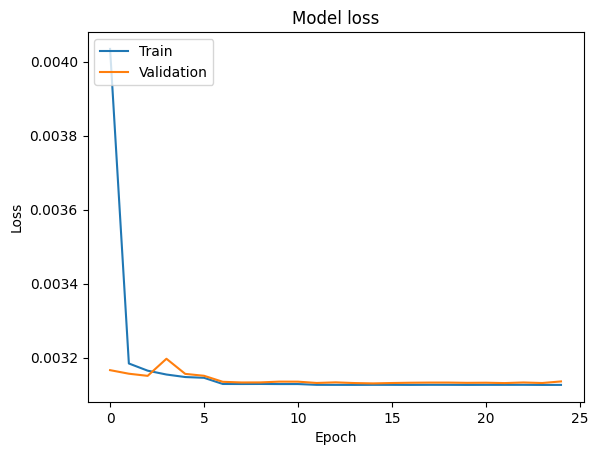

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [1]:
import joblib
from tensorflow.keras.models import load_model
import pandas as pd

loaded_model = load_model('investment_recommendation.h5')
preprocessor = joblib.load('preprocessor_pipeline.pkl')

features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
            'other_expenses', 'number_of_dependents', 'current_invested_amount']

years_to_retire = 30
salary = 75000
investment_amount = 15000
current_savings = 100000
debt = 300000
other_expenses = 30000
number_of_dependents = 3
current_invested_amount = 0

new_employee = pd.DataFrame([[years_to_retire, salary, investment_amount, current_savings, debt, other_expenses, number_of_dependents, current_invested_amount]], columns=features)


In [10]:
# Preprocess the new data
new_employee_processed = preprocessor.transform(new_employee)
predicted_low, predicted_mid, predicted_high = loaded_model.predict(new_employee_processed)

print(predicted_low)
print(predicted_high)
print(predicted_mid)


def display_results(low_pred, mid_pred, high_pred):
    answer = []
    print("Low Risk:")
    print(f"s1: {low_pred[0]*100:.2f}%, s2: {low_pred[1]*100:.2f}%, s3: {low_pred[2]*100:.2f}%, s4: {low_pred[3]*100:.2f}%, s5: {low_pred[4]*100:.2f}%, s6: {low_pred[5]*100:.2f}%")
    low_percent = {"s1":f"{low_pred[0]*100:.2f}","s2":f"{low_pred[1]*100:.2f}","s3":f"{low_pred[2]*100:.2f}","s4":f"{low_pred[3]*100:.2f}","s5":f"{low_pred[4]*100:.2f}","s6":f"{low_pred[5]*100:.2f}"}
    answer.append(low_percent)
    print("Medium Risk:")
    print(f"s1: {mid_pred[0]*100:.2f}%, s2: {mid_pred[1]*100:.2f}%, s3: {mid_pred[2]*100:.2f}%, s4: {mid_pred[3]*100:.2f}%, s5: {mid_pred[4]*100:.2f}%, s6: {mid_pred[5]*100:.2f}%")
    mid_percent = {"s1":f"{mid_pred[0]*100:.2f}","s2":f"{mid_pred[1]*100:.2f}","s3":f"{mid_pred[2]*100:.2f}","s4":f"{mid_pred[3]*100:.2f}","s5":f"{mid_pred[4]*100:.2f}","s6":f"{mid_pred[5]*100:.2f}",}
    answer.append(mid_percent)
    print("High Risk:")
    print(f"s1: {high_pred[0]*100:.2f}%, s2: {high_pred[1]*100:.2f}%, s3: {high_pred[2]*100:.2f}%, s4: {high_pred[3]*100:.2f}%, s5: {high_pred[4]*100:.2f}%, s6: {high_pred[5]*100:.2f}%")
    high_percent = {"s1":f"{high_pred[0]*100:.2f}","s2":f"{high_pred[1]*100:.2f}","s3":f"{high_pred[2]*100:.2f}","s4":f"{high_pred[3]*100:.2f}","s5":f"{high_pred[4]*100:.2f}","s6":f"{high_pred[5]*100:.2f}",}
    answer.append(high_percent)
    return answer

# Display the prediction results
ans = display_results(predicted_low[0], predicted_mid[0], predicted_high[0])

1/1 [==============================] - 0s 22ms/step
[[0.07727537 0.02005742 0.24451548 0.16958594 0.3944139  0.0940673 ]]
[[0.29935762 0.29453072 0.07026873 0.07007349 0.07042254 0.1936446 ]]
[[0.0560096  0.0695327  0.14412883 0.24361043 0.19480477 0.2927877 ]]
Low Risk:
s1: 7.73%, s2: 2.01%, s3: 24.45%, s4: 16.96%, s5: 39.44%, s6: 9.41%
Medium Risk:
s1: 5.60%, s2: 6.95%, s3: 14.41%, s4: 24.36%, s5: 19.48%, s6: 29.28%
High Risk:
s1: 29.94%, s2: 29.45%, s3: 7.03%, s4: 7.01%, s5: 7.04%, s6: 19.36%


In [11]:
ans

[{'s1': '7.73',
  's2': '2.01',
  's3': '24.45',
  's4': '16.96',
  's5': '39.44',
  's6': '9.41'},
 {'s1': '5.60',
  's2': '6.95',
  's3': '14.41',
  's4': '24.36',
  's5': '19.48',
  's6': '29.28'},
 {'s1': '29.94',
  's2': '29.45',
  's3': '7.03',
  's4': '7.01',
  's5': '7.04',
  's6': '19.36'}]

In [12]:
low_percent = ans[0]
mid_percent = ans[1]
high_percent = ans[2]

In [13]:
low_percent

{'s1': '7.73',
 's2': '2.01',
 's3': '24.45',
 's4': '16.96',
 's5': '39.44',
 's6': '9.41'}

In [14]:
low_s1 = (investment_amount*(float(low_percent["s1"])))/100

In [15]:
low_s1

1159.5

In [16]:
low_s2=(investment_amount*(float(low_percent["s2"])))/100
low_s3=(investment_amount*(float(low_percent["s3"])))/100
low_s4=(investment_amount*(float(low_percent["s4"])))/100
low_s5=(investment_amount*(float(low_percent["s5"])))/100
low_s6=(investment_amount*(float(low_percent["s6"])))/100


In [17]:
low_amounts = {
    's1': low_s1,
    's2': low_s2,
    's3': low_s3,
    's4': low_s4,
    's5': low_s5,
    's6': low_s6
}
mid_amounts = {
    's1': ((investment_amount*(float(mid_percent["s1"])))/100),
    's2': ((investment_amount*(float(mid_percent["s2"])))/100),
    's3': ((investment_amount*(float(mid_percent["s3"])))/100),
    's4': ((investment_amount*(float(mid_percent["s4"])))/100),
    's5': ((investment_amount*(float(mid_percent["s5"])))/100),
    's6': ((investment_amount*(float(mid_percent["s6"])))/100),
}
high_amounts = {
    's1': ((investment_amount*(float(high_percent["s1"])))/100),
    's2': ((investment_amount*(float(high_percent["s2"])))/100),
    's3': ((investment_amount*(float(high_percent["s3"])))/100),
    's4': ((investment_amount*(float(high_percent["s4"])))/100),
    's5': ((investment_amount*(float(high_percent["s5"])))/100),
    's6': ((investment_amount*(float(high_percent["s6"])))/100),
}

In [18]:
high_amounts

{'s1': 4491.0,
 's2': 4417.5,
 's3': 1054.5,
 's4': 1051.5,
 's5': 1056.0,
 's6': 2904.0}

#   s1 - stocks
#   s2 - crypto
#   s3 - recurrent deposit
#   s4 - property
#   s5 - gold
#   s6 - bonds

In [28]:
stocks_s1 =  [
    {
      "name": "HCL Tech",
      "price": "1324.10",
      "recommendation": "Buy HCL Technologies",
      "target_price": "1880",
      "source": "Motilal Oswal",
      "revenue": 555.9000000000001,
      "profit_percent": 41.983233894720954
    },
    {
      "name": "HCL Tech",
      "price": "1324.10",
      "recommendation": "Buy HCL Technologies",
      "target_price": "1880",
      "source": "Motilal Oswal",
      "revenue": 555.9000000000001,
      "profit_percent": 41.983233894720954
    },
    {
      "name": "HDFC Life",
      "price": "549.85",
      "recommendation": "Buy HDFC Life Insurance Company",
      "target_price": "750",
      "source": "Sharekhan",
      "revenue": 200.14999999999998,
      "profit_percent": 36.400836591797756
    },
    {
      "name": "Guj State Petro",
      "price": "290.00",
      "recommendation": "Buy Gujarat State Petronet",
      "target_price": "392",
      "source": "Prabhudas Lilladher",
      "revenue": 102,
      "profit_percent": 35.172413793103445
    },
    {
      "name": "Metro Brands",
      "price": "1135.55",
      "recommendation": "Buy Metro Brands",
      "target_price": "1530",
      "source": "Motilal Oswal",
      "revenue": 394.45000000000005,
      "profit_percent": 34.73647131346044
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1870",
      "source": "YES Securities",
      "revenue": 463.0999999999999,
      "profit_percent": 32.91634089132134
    },
    {
      "name": "HDFC Life",
      "price": "549.85",
      "recommendation": "Buy HDFC Life Insurance",
      "target_price": "725",
      "source": "Emkay Global Financial",
      "revenue": 175.14999999999998,
      "profit_percent": 31.85414203873783
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1850",
      "source": "Sharekhan",
      "revenue": 443.0999999999999,
      "profit_percent": 31.494775748098647
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1850",
      "source": "Sharekhan",
      "revenue": 443.0999999999999,
      "profit_percent": 31.494775748098647
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1850",
      "source": "Emkay Global Financial",
      "revenue": 443.0999999999999,
      "profit_percent": 31.494775748098647
    },
    {
      "name": "HDFC Bank",
      "price": "1531.55",
      "recommendation": "Buy HDFC Bank",
      "target_price": "2010",
      "source": "Religare Retail Research",
      "revenue": 478.45000000000005,
      "profit_percent": 31.23959387548562
    },
    {
      "name": "HDFC Bank",
      "price": "1531.55",
      "recommendation": "Buy HDFC Bank",
      "target_price": "2000",
      "source": "Prabhudas Lilladher",
      "revenue": 468.45000000000005,
      "profit_percent": 30.58666057262251
    },
    {
      "name": "HDFC Bank",
      "price": "1531.55",
      "recommendation": "Buy HDFC Bank",
      "target_price": "2000",
      "source": "Prabhudas Lilladher",
      "revenue": 468.45000000000005,
      "profit_percent": 30.58666057262251
    },
    {
      "name": "IndusInd Bank",
      "price": "1461.85",
      "recommendation": "Buy IndusInd Bank",
      "target_price": "1900",
      "source": "Motilal Oswal",
      "revenue": 438.1500000000001,
      "profit_percent": 29.972295379142878
    },
    {
      "name": "Shyam Metalics",
      "price": "609.75",
      "recommendation": "Buy Shyam Metalics and Energy",
      "target_price": "780",
      "source": "ICICI Securities",
      "revenue": 170.25,
      "profit_percent": 27.92127921279213
    },
    {
      "name": "HDFC Bank",
      "price": "1531.55",
      "recommendation": "Buy HDFC Bank",
      "target_price": "1950",
      "source": "Motilal Oswal",
      "revenue": 418.45000000000005,
      "profit_percent": 27.32199405830695
    },
    {
      "name": "HDFC Life",
      "price": "549.85",
      "recommendation": "Neutral HDFC Life Insurance",
      "target_price": "700",
      "source": "Motilal Oswal",
      "revenue": 150.14999999999998,
      "profit_percent": 27.307447485677905
    },
    {
      "name": "Titan Company",
      "price": "3241.90",
      "recommendation": "Buy Titan Company Ltd",
      "target_price": "4112",
      "source": "Sharekhan",
      "revenue": 870.0999999999999,
      "profit_percent": 26.839199235016498
    },
    {
      "name": "Cello World",
      "price": "845.00",
      "recommendation": "Buy Cello World",
      "target_price": "1060",
      "source": "ICICI Securities",
      "revenue": 215,
      "profit_percent": 25.443786982248522
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1750",
      "source": "Emkay Global Financial",
      "revenue": 343.0999999999999,
      "profit_percent": 24.386950031985208
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1750",
      "source": "Motilal Oswal",
      "revenue": 343.0999999999999,
      "profit_percent": 24.386950031985208
    },
    {
      "name": "HDFC Bank",
      "price": "1531.55",
      "recommendation": "Buy HDFC Bank",
      "target_price": "1900",
      "source": "Sharekhan",
      "revenue": 368.45000000000005,
      "profit_percent": 24.057327543991384
    },
    {
      "name": "HDFC Life",
      "price": "549.85",
      "recommendation": "Neutral HDFC Life Insurance",
      "target_price": "670",
      "source": "Motilal Oswal",
      "revenue": 120.14999999999998,
      "profit_percent": 21.851414022005997
    },
    {
      "name": "Infosys",
      "price": "1406.90",
      "recommendation": "Buy Infosys",
      "target_price": "1700",
      "source": "Sharekhan",
      "revenue": 293.0999999999999,
      "profit_percent": 20.83303717392849
    },
    {
      "name": "Wipro",
      "price": "440.65",
      "recommendation": "Neutral Wipro",
      "target_price": "520",
      "source": "Motilal Oswal",
      "revenue": 79.35000000000002,
      "profit_percent": 18.00748893679792
    }
  ]


crypto_s2 = [{'name': 'Bitcoin', 'last_price': '5,969,998', 'expected_price': '5,990,826', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/btc/84.png', 'changePercent': '1.68', 'profit_amount': 20828.0}, {'name': 'Ethereum', 'last_price': '333,500.0', 'expected_price': '336,560.2', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/eth/84.png', 'changePercent': '1.50', 'profit_amount': 3060.2}, {'name': 'Binance Coin', 'last_price': '52,935.00', 'expected_price': '53,690.25', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/bnb/84.png', 'changePercent': '1.45', 'profit_amount': 755.25}, {'name': 'Ethereum Name Service', 'last_price': '2,363.4', 'expected_price': '2,802.83', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/ens/84.png', 'changePercent': '2.22', 'profit_amount': 439.43}, {'name': 'Arweave', 'last_price': '3,750.00', 'expected_price': '4,085.67', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/ar/84.png', 'changePercent': '-3.85', 'profit_amount': 335.67}, {'name': 'Aave', 'last_price': '9,072.88', 'expected_price': '9,331.82', 'logourl': 'https://media.wazirx.com/media/aave/84.png', 'changePercent': '-1.26', 'profit_amount': 258.94}, {'name': 'Cream Finance', 'last_price': '6,529.33', 'expected_price': '6,769.16', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/cream/84.png', 'changePercent': '1.96', 'profit_amount': 239.83}, {'name': 'Livepeer', 'last_price': '1,951.0', 'expected_price': '2,181.4', 'logourl': 'https://media.wazirx.com/media/lpt/84.png', 'changePercent': '-4.77', 'profit_amount': 230.4}, {'name': 'Auction', 'last_price': '2,020.1', 'expected_price': '2,244.03', 'logourl': 'https://media.wazirx.com/media/auction/84.png', 'changePercent': '-2.88', 'profit_amount': 223.93}, {'name': 'Zcash', 'last_price': '2,268.14', 'expected_price': '2,405.29', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/zec/84.png', 'changePercent': '0.00', 'profit_amount': 137.15}, {'name': 'Chainlink', 'last_price': '1,610.00', 'expected_price': '1,672.76', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/link/84.png', 'changePercent': '-1.40', 'profit_amount': 62.76}, {'name': 'Pendle', 'last_price': '525.050', 'expected_price': '577.94', 'logourl': 'https://media.wazirx.com/media/pendle/84.png', 'changePercent': '-1.13', 'profit_amount': 52.89}, {'name': 'Axie infinity', 'last_price': '701.00', 'expected_price': '750.31', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/axs/84.png', 'changePercent': '4.32', 'profit_amount': 49.31}, {'name': 'Omni Network', 'last_price': '1,838.00', 'expected_price': '1,886.1', 'logourl': 'https://media.wazirx.com/media/omni/84.png', 'changePercent': '3.19', 'profit_amount': 48.1}, {'name': 'Uniswap', 'last_price': '874.97', 'expected_price': '917.97', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/uni/84.png', 'changePercent': '1.20', 'profit_amount': 43.0}, {'name': 'dogwifhat', 'last_price': '290.925', 'expected_price': '313.54', 'logourl': 'https://media.wazirx.com/media/wif/84.png', 'changePercent': '-3.36', 'profit_amount': 22.615}, {'name': 'Lido DAO', 'last_price': '208.25', 'expected_price': '230.36', 'logourl': 'https://media.wazirx.com/media/ldo/84.png', 'changePercent': '-5.77', 'profit_amount': 22.11}, {'name': 'Mask Network', 'last_price': '326.88', 'expected_price': '347.43', 'logourl': 'https://media.wazirx.com/media/mask/84.png', 'changePercent': '-0.12', 'profit_amount': 20.55}, {'name': 'MyNeighborAlice', 'last_price': '140.00', 'expected_price': '157.66', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/alice/84.png', 'changePercent': '0.00', 'profit_amount': 17.66}, {'name': 'Frontier', 'last_price': '119.041', 'expected_price': '134.9', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/front/84.png', 'changePercent': '-3.07', 'profit_amount': 15.859}, {'name': 'Ondo', 'last_price': '119.5154', 'expected_price': '135.12', 'logourl': 'https://media.wazirx.com/media/ondo/84.png', 'changePercent': '7.09', 'profit_amount': 15.605}, {'name': 'ether.fi', 'last_price': '429.50', 'expected_price': '442.72', 'logourl': 'https://media.wazirx.com/media/ethfi/84.png', 'changePercent': '2.63', 'profit_amount': 13.22}, {'name': 'Perpetual Protocol', 'last_price': '98.1000', 'expected_price': '111.32', 'logourl': 'https://media.wazirx.com/media/perp/84.png', 'changePercent': '0.10', 'profit_amount': 13.22}, {'name': 'Adventure Gold', 'last_price': '120.50', 'expected_price': '133.19', 'logourl': 'https://media.wazirx.com/media/agld/84.png', 'changePercent': '3.78', 'profit_amount': 12.69}, {'name': 'Qtum', 'last_price': '334.44', 'expected_price': '342.56', 'logourl': 'https://media.wazirx.com/media/qtum/84.png', 'changePercent': '-0.14', 'profit_amount': 8.12}, {'name': 'AVA', 'last_price': '66.995', 'expected_price': '72.78', 'logourl': 'https://media.wazirx.com/media/ava/84.png', 'changePercent': '8.05', 'profit_amount': 5.785}, {'name': 'Arbitrum', 'last_price': '102.197', 'expected_price': '107.66', 'logourl': 'https://media.wazirx.com/media/arb/84.png', 'changePercent': '-1.73', 'profit_amount': 5.463}, {'name': 'Dusk Network', 'last_price': '38.790', 'expected_price': '42.86', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/dusk/84.png', 'changePercent': '-3.03', 'profit_amount': 4.07}, {'name': '1inch', 'last_price': '42.312', 'expected_price': '45.51', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/1inch/84.png', 'changePercent': '-1.71', 'profit_amount': 3.198}, {'name': 'Combo', 'last_price': '67.000', 'expected_price': '69.32', 'logourl': 'https://media.wazirx.com/media/combo/84.png', 'changePercent': '1.58', 'profit_amount': 2.32}, {'name': 'Band Protocol', 'last_price': '157.9999', 'expected_price': '160.01', 'logourl': 'https://media.wazirx.com/media/band/84.png', 'changePercent': '1.02', 'profit_amount': 2.01}, {'name': 'Cartesi', 'last_price': '20.364', 'expected_price': '22.18', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/ctsi/84.png', 'changePercent': '1.98', 'profit_amount': 1.816}, {'name': 'Blur', 'last_price': '37.993', 'expected_price': '39.79', 'logourl': 'https://media.wazirx.com/media/blur/84.png', 'changePercent': '-0.01', 'profit_amount': 1.797}, {'name': 'Alpha Finance Labs', 'last_price': '11.24', 'expected_price': '12.68', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/alpha/84.png', 'changePercent': '2.18', 'profit_amount': 1.44}, {'name': 'Curve DAO Token', 'last_price': '41.31', 'expected_price': '42.73', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/crv/84.png', 'changePercent': '1.45', 'profit_amount': 1.42}, {'name': 'Orchid', 'last_price': '9.250', 'expected_price': '10.08', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/oxt/84.png', 'changePercent': '-3.43', 'profit_amount': 0.83}, {'name': 'Tether USD', 'last_price': '88.01', 'expected_price': '88.67', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/usdt/84.png', 'changePercent': '0.81', 'profit_amount': 0.66}, {'name': 'Iotx', 'last_price': '5.328', 'expected_price': '5.96', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/iotx/84.png', 'changePercent': '1.49', 'profit_amount': 0.632}, {'name': 'Hifi Finance', 'last_price': '74.743', 'expected_price': '75.31', 'logourl': 'https://media.wazirx.com/media/hifi/84.png', 'changePercent': '2.50', 'profit_amount': 0.567}, {'name': 'Dogecoin', 'last_price': '13.6665', 'expected_price': '14.12', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/doge/84.png', 'changePercent': '-1.68', 'profit_amount': 0.454}, {'name': 'TokenFi', 'last_price': '13.1580', 'expected_price': '13.61', 'logourl': 'https://media.wazirx.com/media/token/84.png', 'changePercent': '3.61', 'profit_amount': 0.452}, {'name': 'AdEx Network', 'last_price': '18.85', 'expected_price': '19.21', 'logourl': 'https://media.wazirx.com/media/adx/84.png', 'changePercent': '3.51', 'profit_amount': 0.36}, {'name': 'JasmyCoin', 'last_price': '3.110', 'expected_price': '3.46', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/jasmy/84.png', 'changePercent': '-0.73', 'profit_amount': 0.35}, {'name': 'Komodo', 'last_price': '35.810', 'expected_price': '36.1', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/kmd/84.png', 'changePercent': '4.71', 'profit_amount': 0.29}, {'name': 'Oasis Network', 'last_price': '8.9300', 'expected_price': '9.19', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/rose/84.png', 'changePercent': '2.86', 'profit_amount': 0.26}, {'name': 'Request Network', 'last_price': '12.0718', 'expected_price': '12.33', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/req/84.png', 'changePercent': '-1.37', 'profit_amount': 0.258}, {'name': 'Alien Worlds', 'last_price': '1.6962', 'expected_price': '1.87', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/tlm/84.png', 'changePercent': '-4.17', 'profit_amount': 0.174}, {'name': 'Gifto', 'last_price': '1.9000', 'expected_price': '2.06', 'logourl': 'https://media.wazirx.com/media/gft/84.png', 'changePercent': '-1.63', 'profit_amount': 0.16}, {'name': 'Memecoin', 'last_price': '2.63187', 'expected_price': '2.77', 'logourl': 'https://media.wazirx.com/media/meme/84.png', 'changePercent': '0.00', 'profit_amount': 0.138}, {'name': 'Reserve Rights', 'last_price': '0.70936', 'expected_price': '0.813', 'logourl': 'https://media.wazirx.com/media/rsr/84.png', 'changePercent': '-4.02', 'profit_amount': 0.104}, {'name': 'cat in a dogs world', 'last_price': '0.39632', 'expected_price': '0.464', 'logourl': 'https://media.wazirx.com/media/mew/84.png', 'changePercent': '5.40', 'profit_amount': 0.068}, {'name': 'COTI', 'last_price': '11.985', 'expected_price': '12.04', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/coti/84.png', 'changePercent': '7.01', 'profit_amount': 0.055}, {'name': 'StormX', 'last_price': '0.70849', 'expected_price': '0.743', 'logourl': 'https://media.wazirx.com/media/stmx/84.png', 'changePercent': '6.48', 'profit_amount': 0.035}, {'name': 'Spell Token', 'last_price': '0.094455', 'expected_price': '0.124', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/spell/84.png', 'changePercent': '-9.36', 'profit_amount': 0.03}, {'name': 'Verge', 'last_price': '0.5269', 'expected_price': '0.554', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/xvg/84.png', 'changePercent': '1.19', 'profit_amount': 0.027}, {'name': 'Book of meme', 'last_price': '1.21393', 'expected_price': '1.24', 'logourl': 'https://media.wazirx.com/media/bome/84.png', 'changePercent': '2.10', 'profit_amount': 0.026}, {'name': 'Selfkey', 'last_price': '0.70101', 'expected_price': '0.726', 'logourl': 'https://media.wazirx.com/media/key/84.png', 'changePercent': '-0.06', 'profit_amount': 0.025}, {'name': 'Smooth Love Potion', 'last_price': '0.3448', 'expected_price': '0.356', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/slp/84.png', 'changePercent': '3.26', 'profit_amount': 0.011}, {'name': 'Holo', 'last_price': '0.220', 'expected_price': '0.228', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/hot/84.png', 'changePercent': '2.33', 'profit_amount': 0.008}, {'name': 'Reef', 'last_price': '0.19100', 'expected_price': '0.195', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/reef/84.png', 'changePercent': '-0.33', 'profit_amount': 0.004}, {'name': 'Floki', 'last_price': '0.02177', 'expected_price': '0.0234', 'logourl': 'https://media.wazirx.com/media/floki/84.png', 'changePercent': '-4.77', 'profit_amount': 0.002}, {'name': 'Bob', 'last_price': '0.0055600', 'expected_price': '0.00703', 'logourl': 'https://media.wazirx.com/media/bob/84.png', 'changePercent': '-12.58', 'profit_amount': 0.001}, {'name': 'SHIBA INU', 'last_price': '0.002208', 'expected_price': '0.00228', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/shib/84.png', 'changePercent': '-0.63', 'profit_amount': 0.0}, {'name': 'Pepe', 'last_price': '0.0013050', 'expected_price': '0.00139', 'logourl': 'https://media.wazirx.com/media/pepe/84.png', 'changePercent': '-2.63', 'profit_amount': 0.0}, {'name': 'Bonk', 'last_price': '0.0029200', 'expected_price': '0.00321', 'logourl': 'https://media.wazirx.com/media/bonk/84.png', 'changePercent': '-5.80', 'profit_amount': 0.0}]



recurrent_deposits_s3 = [{'sbi_bank': '6.5 - 7', 'icici_bank': '4.75 - 7.20', 'hdfc_bank': '4.50 - 7.25', 'kotak_mahindra_bank': '6.00 - 7.40', 'axis_bank': '5.75 - 7.20', 'bank_of_baroda': '5.75 - 7.25', 'punjab_national_bank': '6.00 - 7.25', 'idbi_bank': '6.25 - 7.00', 'canara_bank': '6.15 - 7.25', 'union_bank_of_india': '5.75 - 6.50', 'yes_bank': '6.10 - 7.75', 'bandhan_bank': '4.50 - 7.85', 'bank_of_maharashtra': '5.50 - 6.25', 'indusind_bank': '7.00 - 7.75', 'jammu_and_kashmir Bank': '5.75 - 7.10', 'karnataka_bank': '5.80 - 7.40', 'saraswat_bank': '7.00 - 7.50', 'federal_bank': '5.75 - 7.50', 'dbs_bank': '6.00 - 7.50', 'rbl_bank': '5.00 - 8.00', 'indian_bank': '4.50 - 7.25', 'indian_overseas_bank': '5.75 - 7.30', 'tmb_bank': '6.75 - 7.75'}]



property_s4 = [{'title': 'Meerut Wale', 'price': 21000000, 'rate': '11667', 'address': 'Independent House, meerut wala sweets', 'area': 1800, 'estimated_emi': 12000, 'bhk': 4.0, 'location': 'Meerut Wale', 'goal_price': 33062417.87, 'profit': 12062417.870000001}, {'title': 'Meerut Wale', 'price': 21000000, 'rate': '11667', 'address': 'Independent House, meerut wala sweets', 'area': 1800, 'estimated_emi': 12000, 'bhk': 4.0, 'location': 'Meerut Wale', 'goal_price': 33062417.87, 'profit': 12062417.870000001}, {'title': 'Adarsh Nagar', 'price': 19000000, 'rate': '11728', 'address': 'Independent House, , Shankaracharya Marg, Near Meerut Wala Sweets Shop', 'area': 1620, 'estimated_emi': 109000, 'bhk': 3.0, 'location': 'Adarsh Nagar', 'goal_price': 29913616.17, 'profit': 10913616.170000002}, {'title': 'Adarsh Nagar', 'price': 19000000, 'rate': '11728', 'address': 'Independent House, , Shankaracharya Marg, Near Meerut Wala Sweets Shop', 'area': 1620, 'estimated_emi': 109000, 'bhk': 3.0, 'location': 'Adarsh Nagar', 'goal_price': 29913616.17, 'profit': 10913616.170000002}, {'title': 'Chawla  Azadpur', 'price': 15000000, 'rate': '10714', 'address': 'B342, Gali Number 6, Block B, Majlis Park, Azadpur, Delhi, 110033, India', 'area': 1400, 'estimated_emi': 85971, 'bhk': 3.0, 'location': 'Azadpur', 'goal_price': 23616012.76, 'profit': 8616012.760000002}, {'title': 'Mahendru Enclave   Azadpur', 'price': 11000000, 'rate': '11000', 'address': 'GT Karnal Rd near Hans-Cinema', 'area': 1000, 'estimated_emi': 63045, 'bhk': 3.0, 'location': 'Azadpur', 'goal_price': 17318409.36, 'profit': 6318409.359999999}, {'title': 'Azadpur', 'price': 10000000, 'rate': '10000', 'address': 'Independent House, Near Gaushala', 'area': 1000, 'estimated_emi': 57314, 'bhk': 3.0, 'location': 'Azadpur', 'goal_price': 15744008.51, 'profit': 5744008.51}, {'title': 'Majlis Park  Majlis Park, Azadpur', 'price': 9000000, 'rate': '9091', 'address': 'Majlis Park\xa0 Gali No 8', 'area': 990, 'estimated_emi': 51583, 'bhk': 3.0, 'location': 'Majlis Park, Azadpur', 'goal_price': 14169607.66, 'profit': 5169607.66}, {'title': 'Satkamal  Azadpur', 'price': 8500000, 'rate': '8509', 'address': 'Gali Number 8, Majlis Park,  near SHREE RAM MANDIR', 'area': 999, 'estimated_emi': 48717, 'bhk': 2.0, 'location': 'Azadpur', 'goal_price': 13382407.23, 'profit': 4882407.23}, {'title': 'Satkamal  Azadpur', 'price': 8500000, 'rate': '8509', 'address': 'Gali Number 8, Majlis Park,  near SHREE RAM MANDIR', 'area': 999, 'estimated_emi': 48717, 'bhk': 2.0, 'location': 'Azadpur', 'goal_price': 13382407.23, 'profit': 4882407.23}, {'title': 'Metro Apartment, Jhangirpuri  Metro Apartment', 'price': 7500000, 'rate': '8333', 'address': 'Metro Apartment', 'area': 900, 'estimated_emi': 42985, 'bhk': 3.0, 'location': 'Metro Apartment', 'goal_price': 11808006.38, 'profit': 4308006.380000001}, {'title': 'Mahendra Park', 'price': 7500000, 'rate': '8333', 'address': 'Standalone Building, AAP MLA office, street no 28', 'area': 900, 'estimated_emi': 42985, 'bhk': 3.0, 'location': 'Mahendra Park', 'goal_price': 11808006.38, 'profit': 4308006.380000001}, {'title': 'Mahendra Park', 'price': 7500000, 'rate': '8333', 'address': 'Standalone Building, AAP MLA office, street no 28', 'area': 900, 'estimated_emi': 42985, 'bhk': 3.0, 'location': 'Mahendra Park', 'goal_price': 11808006.38, 'profit': 4308006.380000001}, {'title': 'Metro Apartment  Jahangir Puri', 'price': 7000000, 'rate': '11272', 'address': 'DDA MIG Flats  Near  258 Metro Apartment', 'area': 621, 'estimated_emi': 40120, 'bhk': 2.0, 'location': 'Jahangir Puri', 'goal_price': 11020805.96, 'profit': 4020805.960000001}, {'title': 'Metro Apartment  Jahangir Puri', 'price': 7000000, 'rate': '11272', 'address': 'DDA MIG Flats  Near  258 Metro Apartment', 'area': 621, 'estimated_emi': 40120, 'bhk': 2.0, 'location': 'Jahangir Puri', 'goal_price': 11020805.96, 'profit': 4020805.960000001}, {'title': 'Standalone Building    Adarsh Nagar', 'price': 6800000, 'rate': '7640', 'address': 'Panchwati,  Near  The Mayur Group Of Hotels', 'area': 890, 'estimated_emi': 38973, 'bhk': 3.0, 'location': 'Adarsh Nagar', 'goal_price': 10705925.79, 'profit': 3905925.789999999}, {'title': 'Standalone Building    Adarsh Nagar', 'price': 6800000, 'rate': '7640', 'address': 'Panchwati,  Near  The Mayur Group Of Hotels', 'area': 890, 'estimated_emi': 38973, 'bhk': 3.0, 'location': 'Adarsh Nagar', 'goal_price': 10705925.79, 'profit': 3905925.789999999}, {'title': 'Dda  Jahangirpuri', 'price': 6500000, 'rate': '11649', 'address': 'D Block Near Babu Jagjivan Ram Memorial Hospital', 'area': 558, 'estimated_emi': 37254, 'bhk': 2.0, 'location': 'Jahangirpuri', 'goal_price': 10233605.53, 'profit': 3733605.5299999993}, {'title': 'Dda  Jahangirpuri', 'price': 6500000, 'rate': '11649', 'address': 'D Block Near Babu Jagjivan Ram Memorial Hospital', 'area': 558, 'estimated_emi': 37254, 'bhk': 2.0, 'location': 'Jahangirpuri', 'goal_price': 10233605.53, 'profit': 3733605.5299999993}, {'title': 'Dda Mig Flats  Jahangirpuri', 'price': 6000000, 'rate': '5000', 'address': 'I Block, Pocket B near Metro Apartment', 'area': 1200, 'estimated_emi': 34388, 'bhk': 2.0, 'location': 'Jahangirpuri', 'goal_price': 9446405.11, 'profit': 3446405.1099999994}, {'title': 'Sanjay Enclave  Jahangirpuri', 'price': 6000000, 'rate': '6000', 'address': 'Sanjay Enclave near Jahangir Pur Metro Station', 'area': 1000, 'estimated_emi': 34388, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 9446405.11, 'profit': 3446405.1099999994}, {'title': 'Adarsh Nagar', 'price': 5700000, 'rate': '9500', 'address': 'Independent House, indra nagar', 'area': 600, 'estimated_emi': 32669, 'bhk': 2.0, 'location': 'Adarsh Nagar', 'goal_price': 8974084.85, 'profit': 3274084.8499999996}, {'title': 'Adarsh Nagar', 'price': 5700000, 'rate': '9500', 'address': 'Independent House, indra nagar', 'area': 600, 'estimated_emi': 32669, 'bhk': 2.0, 'location': 'Adarsh Nagar', 'goal_price': 8974084.85, 'profit': 3274084.8499999996}, {'title': 'Jahangir Puri', 'price': 5200000, 'rate': '5778', 'address': 'Standalone Building, Bhalswa Near Metro Apartment (DDA Mig Flat)', 'area': 900, 'estimated_emi': 29803, 'bhk': 4.0, 'location': 'Jahangir Puri', 'goal_price': 8186884.42, 'profit': 2986884.42}, {'title': 'Standalone Building    Jahangirpuri', 'price': 5000000, 'rate': '3333', 'address': 'theke wala road Mahendra Park,', 'area': 1500, 'estimated_emi': 28657, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 7872004.25, 'profit': 2872004.25}, {'title': 'Standalone Building    Jahangirpuri', 'price': 5000000, 'rate': '3333', 'address': 'theke wala road Mahendra Park,', 'area': 1500, 'estimated_emi': 28657, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 7872004.25, 'profit': 2872004.25}, {'title': 'Standalone Building    Azadpur', 'price': 5000000, 'rate': '7407', 'address': 'Kewal Park near Gaushala Mandir', 'area': 675, 'estimated_emi': 28657, 'bhk': 2.0, 'location': 'Azadpur', 'goal_price': 7872004.25, 'profit': 2872004.25}, {'title': 'Standalone Building    Azadpur', 'price': 5000000, 'rate': '7407', 'address': 'Kewal Park near Gaushala Mandir', 'area': 675, 'estimated_emi': 28657, 'bhk': 2.0, 'location': 'Azadpur', 'goal_price': 7872004.25, 'profit': 2872004.25}, {'title': 'Theke Wala Road, Adarsh Nagar', 'price': 4700000, 'rate': '4663', 'address': 'Near B D Charitablehospital', 'area': 1008, 'estimated_emi': 26937, 'bhk': 3.0, 'location': 'Theke Wala Road, Adarsh Nagar', 'goal_price': 7399684.0, 'profit': 2699684.0}, {'title': 'Kewal Park', 'price': 4500000, 'rate': '6429', 'address': 'Independent House, Guru Nanak Road', 'area': 700, 'estimated_emi': 25791, 'bhk': 2.0, 'location': 'Kewal Park', 'goal_price': 7084803.83, 'profit': 2584803.83}, {'title': 'Jahangir Puri  Jahangirpuri', 'price': 4500000, 'rate': '5952', 'address': '3rd floor block A Jahangir Puri Delhi', 'area': 756, 'estimated_emi': 25791, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 7084803.83, 'profit': 2584803.83}, {'title': 'Kewal Park', 'price': 4500000, 'rate': '6429', 'address': 'Independent House, Guru Nanak Road', 'area': 700, 'estimated_emi': 25791, 'bhk': 2.0, 'location': 'Kewal Park', 'goal_price': 7084803.83, 'profit': 2584803.83}, {'title': 'Sanjay Enlave  Jahangirpuri', 'price': 4200000, 'rate': '8400', 'address': 'Grand Trunk Rd, near Jahangir metrio station', 'area': 500, 'estimated_emi': 24072, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 6612483.57, 'profit': 2412483.5700000003}, {'title': 'Adarsh Nagar', 'price': 4000000, 'rate': '2667', 'address': 'Standalone Building, kewal park extn near Kancha dairy', 'area': 1500, 'estimated_emi': 22925, 'bhk': 3.0, 'location': 'Adarsh Nagar', 'goal_price': 6297603.4, 'profit': 2297603.4000000004}, {'title': 'Apartment   Azadpur', 'price': 4000000, 'rate': '5556', 'address': 'Netaji Marg near Azadpur Mandi', 'area': 720, 'estimated_emi': 22925, 'bhk': 2.0, 'location': 'Azadpur', 'goal_price': 6297603.4, 'profit': 2297603.4000000004}, {'title': 'Azadpur', 'price': 4000000, 'rate': '6920', 'address': 'Standalone Building, Kewal Park,  near Shree Krishan Gaushala', 'area': 578, 'estimated_emi': 22925, 'bhk': 2.0, 'location': 'Azadpur', 'goal_price': 6297603.4, 'profit': 2297603.4000000004}, {'title': 'Azadpur', 'price': 4000000, 'rate': '6920', 'address': 'Standalone Building, Kewal Park,  near Shree Krishan Gaushala', 'area': 578, 'estimated_emi': 22925, 'bhk': 2.0, 'location': 'Azadpur', 'goal_price': 6297603.4, 'profit': 2297603.4000000004}, {'title': 'Adarsh Nagar', 'price': 4000000, 'rate': '2667', 'address': 'Standalone Building, kewal park extn near Kancha dairy', 'area': 1500, 'estimated_emi': 22925, 'bhk': 3.0, 'location': 'Adarsh Nagar', 'goal_price': 6297603.4, 'profit': 2297603.4000000004}, {'title': 'Lig Dda Freehold  Jahangirpuri', 'price': 3800000, 'rate': '9500', 'address': 'Jahangirpuri Industrial Area Near Jahangirpur Metro Station,', 'area': 400, 'estimated_emi': 21779, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 5982723.23, 'profit': 2182723.2300000004}, {'title': 'Jahangirpuri', 'price': 3700000, 'rate': '3426', 'address': 'Standalone Building, I Block near Yadav gift shop', 'area': 1080, 'estimated_emi': 21206, 'bhk': 4.0, 'location': 'Jahangirpuri', 'goal_price': 5825283.15, 'profit': 2125283.1500000004}, {'title': 'Jahangirpuri', 'price': 3700000, 'rate': '3426', 'address': 'Standalone Building, I Block near Yadav gift shop', 'area': 1080, 'estimated_emi': 21206, 'bhk': 4.0, 'location': 'Jahangirpuri', 'goal_price': 5825283.15, 'profit': 2125283.1500000004}, {'title': 'Jahangirpuri', 'price': 3500000, 'rate': '3889', 'address': 'standalone Building, Jahangirpuri Industrial Area, Near Jahangirpur Metro Station', 'area': 900, 'estimated_emi': 20060, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 5510402.98, 'profit': 2010402.9800000004}, {'title': 'Azadpur', 'price': 3500000, 'rate': '7778', 'address': 'Standalone Building, Kewal Park, near Shani Mandir', 'area': 450, 'estimated_emi': 20060, 'bhk': 1.0, 'location': 'Azadpur', 'goal_price': 5510402.98, 'profit': 2010402.9800000004}, {'title': 'Azadpur', 'price': 3500000, 'rate': '7778', 'address': 'Standalone Building, Kewal Park, near Shani Mandir', 'area': 450, 'estimated_emi': 20060, 'bhk': 1.0, 'location': 'Azadpur', 'goal_price': 5510402.98, 'profit': 2010402.9800000004}, {'title': 'Jahangirpuri', 'price': 3500000, 'rate': '3889', 'address': 'standalone Building, Jahangirpuri Industrial Area, Near Jahangirpur Metro Station', 'area': 900, 'estimated_emi': 20060, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 5510402.98, 'profit': 2010402.9800000004}, {'title': 'Jahangirpuri', 'price': 3100000, 'rate': '6966', 'address': 'Standalone Building,  Block K4 near BABU JAGJIVAN RAM HOSPITAL', 'area': 445, 'estimated_emi': 17767, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 4880642.64, 'profit': 1780642.6399999997}, {'title': 'Jahangirpuri', 'price': 3100000, 'rate': '6966', 'address': 'Standalone Building,  Block K4 near BABU JAGJIVAN RAM HOSPITAL', 'area': 445, 'estimated_emi': 17767, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 4880642.64, 'profit': 1780642.6399999997}, {'title': 'Jahangirpuri', 'price': 2800000, 'rate': '5185', 'address': 'Independent House, Mahendra park delhi 110033 near jahangir puri pawan sharma mla road ..near cindrela school and rasila paints ....bhot acha flat he urgent sale karna he ..price 32 tha ab 28 fix kar diya he ..moke ka flate he 60 gaj ki pakki rajistry ke sath je loan bhi  h', 'area': 540, 'estimated_emi': 16048, 'bhk': 2.0, 'location': 'Jahangirpuri', 'goal_price': 4408322.38, 'profit': 1608322.38}, {'title': 'Jahangirpuri', 'price': 2800000, 'rate': '3933', 'address': 'Independent House, block A2 neat haatiwala park', 'area': 712, 'estimated_emi': 16048, 'bhk': 4.0, 'location': 'Jahangirpuri', 'goal_price': 4408322.38, 'profit': 1608322.38}, {'title': 'Dda Flats   Jahangirpuri', 'price': 2700000, 'rate': '3214', 'address': 'Block A Near Sarvodaya Kanya Vidhyalaya No. 2', 'area': 840, 'estimated_emi': 15474, 'bhk': 4.0, 'location': 'Jahangirpuri', 'goal_price': 4250882.3, 'profit': 1550882.2999999998}, {'title': 'Mahindra Park  The Adarsh Tuition Center', 'price': 2600000, 'rate': '6019', 'address': 'Grand Trunk Rd near Shanti Kumud Hospital', 'area': 432, 'estimated_emi': 14901, 'bhk': 1.0, 'location': 'The Adarsh Tuition Center', 'goal_price': 4093442.21, 'profit': 1493442.21}, {'title': 'Jahangirpuri', 'price': 2500000, 'rate': '2500', 'address': 'Standalone Building, Block A,  near Sri Sanatan Dharam Hanuman Mandir', 'area': 1000, 'estimated_emi': 14328, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 3936002.13, 'profit': 1436002.13}, {'title': 'Jahangirpuri', 'price': 2100000, 'rate': '7000', 'address': 'Independent House, Mahendra Park near Government Boys Senior Secondary School', 'area': 300, 'estimated_emi': 12036, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 3306241.79, 'profit': 1206241.79}, {'title': 'Adarsh Nagar', 'price': 2000000, 'rate': '6431', 'address': 'standalone building, Keval park near Kartar Dairy', 'area': 311, 'estimated_emi': 11462, 'bhk': 1.0, 'location': 'Adarsh Nagar', 'goal_price': 3148801.7, 'profit': 1148801.7000000002}, {'title': 'Adarsh Nagar', 'price': 2000000, 'rate': '6431', 'address': 'standalone building, Keval park near Kartar Dairy', 'area': 311, 'estimated_emi': 11462, 'bhk': 1.0, 'location': 'Adarsh Nagar', 'goal_price': 3148801.7, 'profit': 1148801.7000000002}, {'title': 'Aryavat Apartment  Jahangirpuri', 'price': 1800000, 'rate': '5455', 'address': 'ahangirpuri Industrial Area near Jahangirpuri metro station', 'area': 330, 'estimated_emi': 10316, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 2833921.53, 'profit': 1033921.5299999998}, {'title': 'Zhangirpuri Apartment   Jahangirpuri', 'price': 1800000, 'rate': '3600', 'address': 'I Block, Block I 2   near  Municipal Corporation Primary School, I Block, Jahangirpuri, Delhi-110033', 'area': 500, 'estimated_emi': 10316, 'bhk': 2.0, 'location': 'Jahangirpuri', 'goal_price': 2833921.53, 'profit': 1033921.5299999998}, {'title': 'Aryavat Apartment  Jahangirpuri', 'price': 1800000, 'rate': '5455', 'address': 'ahangirpuri Industrial Area near Jahangirpuri metro station', 'area': 330, 'estimated_emi': 10316, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 2833921.53, 'profit': 1033921.5299999998}, {'title': 'Builder Floor  Jahangirpuri', 'price': 1500000, 'rate': '3000', 'address': 'Block C near Jahangir Pur Metro Station', 'area': 500, 'estimated_emi': 8597, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 2361601.28, 'profit': 861601.2799999998}, {'title': 'Jahangirpuri', 'price': 1400000, 'rate': '2863', 'address': 'Independent House, GT Road near Jahangirpuri Metro station', 'area': 489, 'estimated_emi': 8024, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 2204161.19, 'profit': 804161.19}, {'title': 'Jahangirpuri', 'price': 1400000, 'rate': '2333', 'address': 'Standalone building, Mahendra Park, Near Police Station Mahendra Park', 'area': 600, 'estimated_emi': 8024, 'bhk': 2.0, 'location': 'Jahangirpuri', 'goal_price': 2204161.19, 'profit': 804161.19}, {'title': 'Jahangirpuri', 'price': 1400000, 'rate': '2333', 'address': 'Standalone building, Mahendra Park, Near Police Station Mahendra Park', 'area': 600, 'estimated_emi': 8024, 'bhk': 2.0, 'location': 'Jahangirpuri', 'goal_price': 2204161.19, 'profit': 804161.19}, {'title': 'Jahangirpuri', 'price': 1400000, 'rate': '2863', 'address': 'Independent House, GT Road near Jahangirpuri Metro station', 'area': 489, 'estimated_emi': 8024, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 2204161.19, 'profit': 804161.19}, {'title': 'Bhalswa Jahangir Village  P5hh+346, Block F 2, Jahangirpuri, Delhi, 110033, India', 'price': 1350000, 'rate': '3358', 'address': 'Near prayas bhawan', 'area': 402, 'estimated_emi': 7737, 'bhk': 1.0, 'location': 'P5hh+346, Block F 2, Jahangirpuri, Delhi, 110033, India', 'goal_price': 2125441.15, 'profit': 775441.1499999999}, {'title': 'D D A  Jahangirpuri', 'price': 1300000, 'rate': '2222', 'address': ',Main Road near Aggarwal Standard Sweets', 'area': 585, 'estimated_emi': 7450, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 2046721.11, 'profit': 746721.1100000001}, {'title': 'Dda  Jahangirpuri', 'price': 1250000, 'rate': '2556', 'address': 'A-1,Main Road near Aggarwal Standard Sweets', 'area': 489, 'estimated_emi': 7164, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 1968001.06, 'profit': 718001.06}, {'title': 'Dda  Jahangirpuri', 'price': 1250000, 'rate': '2556', 'address': 'A-1,Main Road near Aggarwal Standard Sweets', 'area': 489, 'estimated_emi': 7164, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 1968001.06, 'profit': 718001.06}, {'title': 'Jahangirpuri', 'price': 800000, 'rate': '3604', 'address': 'Standalone Building, Bhalswa Jahangirpuri, near Kushal Cinema', 'area': 222, 'estimated_emi': 4585, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 1259520.68, 'profit': 459520.67999999993}, {'title': 'Jahangirpuri', 'price': 800000, 'rate': '3604', 'address': 'Standalone Building, Bhalswa Jahangirpuri, near Kushal Cinema', 'area': 222, 'estimated_emi': 4585, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 1259520.68, 'profit': 459520.67999999993}, {'title': 'Jahangirpuri', 'price': 600000, 'rate': '1333', 'address': 'standalone building, Mahendra Park,    near  Police Station Mahendra Park', 'area': 450, 'estimated_emi': 3438, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 944640.51, 'profit': 344640.51}, {'title': 'Jahangirpuri', 'price': 600000, 'rate': '1333', 'address': 'standalone building, Mahendra Park,    near  Police Station Mahendra Park', 'area': 450, 'estimated_emi': 3438, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 944640.51, 'profit': 344640.51}]


gold_s5 = 17962.88807


bonds_s6 = [{'name': 'U.P. POWER CORPORATION LIMITED', 'coupon': '9.9500%', 'maturity': 'Mar 2032', 'yield': '8.7500%', 'price': '₹  10,98,510.48', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/e63dadb6-5dcd-49a9-ae6a-367b51c5d95e.png', 'estimated_face_value': 1172086.67, 'bond_profit': '₹ 374,565.27'}, {'name': 'U.P. POWER CORPORATION LIMITED', 'coupon': '9.7000%', 'maturity': 'Mar 2028', 'yield': '8.8000%', 'price': '₹  10,52,341.83', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/e63dadb6-5dcd-49a9-ae6a-367b51c5d95e.png', 'estimated_face_value': 1082265.84, 'bond_profit': '₹ 160,891.26'}, {'name': 'LIC HOUSING FINANCE LTD', 'coupon': '7.8200%', 'maturity': 'Nov 2032', 'yield': '7.6800%', 'price': '₹  10,49,906.58', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/92034e97-154d-475e-9b13-ddfad0adbcb3.jpg', 'estimated_face_value': 1058775.94, 'bond_profit': '₹ 66,919.32'}, {'name': 'SATYA MICROCAPITAL LIMITED', 'coupon': '13.8500%', 'maturity': 'Jul 2029', 'yield': '14.7000%', 'price': '₹  1,01,052.64', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/214032f9-2f89-4f69-af19-e3d903c66a64.jpg', 'estimated_face_value': 97992.77, 'bond_profit': '₹ 65,831.26'}, {'name': 'POWER FINANCE CORPORATION LIMITED', 'coupon': '7.4200%', 'maturity': 'Sep 2032', 'yield': '7.3700%', 'price': '₹  10,56,913.70', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c20754ec-9eab-4450-910e-58eba0fc5c3c.png', 'estimated_face_value': 1060095.04, 'bond_profit': '₹ 57,235.88'}, {'name': 'U.P. POWER CORPORATION LIMITED', 'coupon': '9.7500%', 'maturity': 'Oct 2025', 'yield': '9.0500%', 'price': '₹  10,21,458.10', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/e63dadb6-5dcd-49a9-ae6a-367b51c5d95e.png', 'estimated_face_value': 1030310.36, 'bond_profit': '₹ 53,315.69'}, {'name': 'MAS FINANCIAL SERVICES LIMITED', 'coupon': '10.7500%', 'maturity': 'Jul 2029', 'yield': '11.2899%', 'price': '₹  1,00,117.81', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/ab684c8a-bb06-4714-8a56-6ed4c77f0b6f.jfif', 'estimated_face_value': 98036.57, 'bond_profit': '₹ 51,414.12'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2033', 'yield': '9.2000%', 'price': '₹  1,02,083.16', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100478.75, 'bond_profit': '₹ 26,857.55'}, {'name': 'IIFL SAMASTA FINANCE LIMITED', 'coupon': '10.4800%', 'maturity': 'Feb 2027', 'yield': '10.9980%', 'price': '₹  1,00,172.27', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b8e3c88c-fe0a-4522-bc50-5fae459fe29c.png', 'estimated_face_value': 98978.76, 'bond_profit': '₹ 26,439.35'}, {'name': 'MUTHOOT CAPITAL SERVICES LIMITED', 'coupon': '10.0000%', 'maturity': 'Mar 2027', 'yield': '10.4709%', 'price': '₹  1,00,438.36', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/06dd09dc-6c79-4bb5-af92-01cc7ea2a3b7.png', 'estimated_face_value': 99315.78, 'bond_profit': '₹ 26,095.79'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2032', 'yield': '9.2000%', 'price': '₹  1,02,063.86', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100571.03, 'bond_profit': '₹ 23,996.96'}, {'name': 'JANA SMALL FINANCE BANK LIMITED', 'coupon': '13.8000%', 'maturity': 'Jul 2027', 'yield': '11.7500%', 'price': '₹  2,46,738.75', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/24de30bc-596d-4517-9e07-91c761dfad43.jpg', 'estimated_face_value': 259194.55, 'bond_profit': '₹ 21,620.39'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2031', 'yield': '9.2480%', 'price': '₹  1,01,809.56', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100182.48, 'bond_profit': '₹ 20,769.32'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2030', 'yield': '9.2472%', 'price': '₹  1,01,809.56', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100344.59, 'bond_profit': '₹ 17,976.10'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2029', 'yield': '9.2460%', 'price': '₹  1,01,809.56', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100522.63, 'bond_profit': '₹ 15,191.76'}, {'name': 'PRESTIGE PROJECTS PRIVATE LIMITED', 'coupon': '11.7500%', 'maturity': 'Mar 2027', 'yield': '10.5000%', 'price': '₹  1,01,815.02', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/27ff500b-5fc6-4c48-ae45-3c0f80e24ac4.png', 'estimated_face_value': 104812.15, 'bond_profit': '₹ 14,247.64'}, {'name': 'POWER FINANCE CORPORATION LIMITED', 'coupon': '7.8200%', 'maturity': 'Mar 2038', 'yield': '7.4500%', 'price': '₹  1,04,956.02', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c20754ec-9eab-4450-910e-58eba0fc5c3c.png', 'estimated_face_value': 108226.66, 'bond_profit': '₹ 12,962.04'}, {'name': 'SPANDANA SPHOORTY FINANCIAL LIMITED', 'coupon': '10.7500%', 'maturity': 'Sep 2025', 'yield': '11.2963%', 'price': '₹  99,941.10', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/5aeccc88-8740-415a-ba6a-0b186b5f83ef.png', 'estimated_face_value': 99309.41, 'bond_profit': '₹ 12,667.34'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2027', 'yield': '9.1500%', 'price': '₹  1,02,061.46', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 101456.94, 'bond_profit': '₹ 9,969.59'}, {'name': 'INDIAN RAILWAY FINANCE CORPORATION LIMITED', 'coupon': '7.7700%', 'maturity': 'Nov 2026', 'yield': '5.1000%', 'price': '₹  1,10,865.18', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c11462c0-6bb5-4da0-9bda-9c644f896e4e.png', 'estimated_face_value': 117427.43, 'bond_profit': '₹ 8,396.23'}, {'name': 'RURAL ELECTRIFICATION CORPORATION LIMITED', 'coupon': '7.6900%', 'maturity': 'Jan 2033', 'yield': '7.4500%', 'price': '₹  1,04,016.57', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b89ffbc6-3578-4aa9-bdbe-76b483af5413.png', 'estimated_face_value': 105558.63, 'bond_profit': '₹ 7,346.33'}, {'name': 'AUXILO FINSERVE PRIVATE LIMITED', 'coupon': '9.9000%', 'maturity': 'Nov 2026', 'yield': '10.2727%', 'price': '₹  1,00,162.74', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/a0199931-19da-4674-887e-9cbf1521ee66.jpg', 'estimated_face_value': 99374.08, 'bond_profit': '₹ 7,121.27'}, {'name': 'YES BANK LIMITED', 'coupon': '9.1500%', 'maturity': 'Jun 2025', 'yield': '9.4000%', 'price': '₹  10,82,265.00', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/84e7a79b-21f9-4cdc-996a-24d739d75d27.jpg', 'estimated_face_value': 1079806.38, 'bond_profit': '₹ 5,724.18'}, {'name': 'YES BANK LIMITED', 'coupon': '9.0000%', 'maturity': 'Mar 2026', 'yield': '9.5000%', 'price': '₹  10,06,956.25', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/84e7a79b-21f9-4cdc-996a-24d739d75d27.jpg', 'estimated_face_value': 999209.35, 'bond_profit': '₹ 5,302.32'}, {'name': 'SPANDANA SPHOORTY FINANCIAL LIMITED', 'coupon': '10.7500%', 'maturity': 'Apr 2026', 'yield': '11.7600%', 'price': '₹  1,02,087.33', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/5aeccc88-8740-415a-ba6a-0b186b5f83ef.png', 'estimated_face_value': 100414.81, 'bond_profit': '₹ 4,898.32'}, {'name': 'INDOSTAR CAPITAL FINANCE LIMITED', 'coupon': '9.9500%', 'maturity': 'Feb 2026', 'yield': '10.5000%', 'price': '₹  99,916.70', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8188bc7b-91c5-4ea4-a383-b5a8c7ef144d.png', 'estimated_face_value': 99087.33, 'bond_profit': '₹ 4,641.21'}, {'name': 'FEDBANK FINANCIAL SERVICES LIMITED', 'coupon': '9.0000%', 'maturity': 'Apr 2030', 'yield': '8.9978%', 'price': '₹  1,00,221.92', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b8c3302e-5faa-4def-b963-6e7779f37d10.jpg', 'estimated_face_value': 100231.59, 'bond_profit': '₹ 4,389.40'}, {'name': 'CHOLAMANDALAM INVESTMENT AND FINANCE COMPANY LIMITED', 'coupon': '8.7500%', 'maturity': 'May 2030', 'yield': '8.7435%', 'price': '₹  1,00,287.67', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/90cb8238-e68e-422a-965d-402610e1848e.png', 'estimated_face_value': 100316.79, 'bond_profit': '₹ 4,350.89'}, {'name': 'MUTHOOT FINANCE LIMITED', 'coupon': '9.0300%', 'maturity': 'May 2029', 'yield': '8.9000%', 'price': '₹  1,01,242.77', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/098849b3-18b3-47be-8841-407d202a1c35.png', 'estimated_face_value': 101748.52, 'bond_profit': '₹ 4,264.34'}, {'name': 'STATE BANK OF INDIA', 'coupon': '7.7400%', 'maturity': 'Sep 2025', 'yield': '8.1000%', 'price': '₹  10,52,066.89', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/bfe3a7fb-062b-48a7-92d2-cb088cb990c9.svg', 'estimated_face_value': 1047743.28, 'bond_profit': '₹ 4,094.91'}, {'name': 'ESAF SMALL FINANCE BANK LIMITED', 'coupon': '11.0000%', 'maturity': 'Apr 2030', 'yield': '11.3500%', 'price': '₹  1,02,026.51', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/830af6c7-657c-498c-b340-d5fa1e991de6.jpg', 'estimated_face_value': 100562.07, 'bond_profit': '₹ 3,906.21'}, {'name': 'EARLYSALARY SERVICES PRIVATE LIMITED', 'coupon': '11.7500%', 'maturity': 'Dec 2025', 'yield': '13.2000%', 'price': '₹  1,01,333.42', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b99373c0-9526-4a04-b7da-bc0e694b2eee.jpg', 'estimated_face_value': 99369.25, 'bond_profit': '₹ 3,853.79'}, {'name': 'INDOSTAR CAPITAL FINANCE LIMITED', 'coupon': '9.9500%', 'maturity': 'Aug 2025', 'yield': '10.4000%', 'price': '₹  1,00,675.90', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8188bc7b-91c5-4ea4-a383-b5a8c7ef144d.png', 'estimated_face_value': 100186.45, 'bond_profit': '₹ 3,367.88'}, {'name': 'HINDUSTAN PETROLEUM CORPORATION LIMITED', 'coupon': '7.7400%', 'maturity': 'Mar 2028', 'yield': '7.5000%', 'price': '₹  1,02,682.62', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/16e582ff-7e85-4b7b-99d2-1b385bbb5e88.png', 'estimated_face_value': 103461.8, 'bond_profit': '₹ 3,276.75'}, {'name': 'HINDUJA LEYLAND FINANCE LIMITED', 'coupon': '9.5000%', 'maturity': 'Nov 2029', 'yield': '9.7500%', 'price': '₹  99,170.96', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/959f83c0-8d98-4e07-b98f-b28407e34b94.png', 'estimated_face_value': 98164.93, 'bond_profit': '₹ 3,200.41'}]

# LOW

### CRYPTO

In [41]:
def crypto_values_giver(crypto_data, investment_amount):
    affordable_cryptos = []
    for crypto in crypto_data:
        last_price = float(crypto['last_price'].replace(',', ''))
        if last_price <= investment_amount:
            affordable_cryptos.append(crypto)
    categorized_cryptos = {'High':[],'Medium':[],'Low':[]}
    for crypto in affordable_cryptos:
        change_percent = abs(float(crypto['changePercent']))
        if change_percent > 2:
            categorized_cryptos['High'].append(crypto)
        elif 1<=change_percent<=2:
            categorized_cryptos['Medium'].append(crypto)
        else:
            categorized_cryptos['Low'].append(crypto)
        for category in categorized_cryptos:
            categorized_cryptos[category] = sorted(categorized_cryptos[category], key=lambda x: x['profit_amount'], reverse=True)[:3]
    return categorized_cryptos

In [42]:
low_json = {
    "crypto": crypto_values_giver(crypto_s2,low_amounts["s2"])
}

In [43]:
low_amounts["s2"]

301.49999999999994

In [44]:
low_json

{'crypto': {'High': [{'name': 'dogwifhat',
    'last_price': '290.925',
    'expected_price': '313.54',
    'logourl': 'https://media.wazirx.com/media/wif/84.png',
    'changePercent': '-3.36',
    'profit_amount': 22.615},
   {'name': 'Lido DAO',
    'last_price': '208.25',
    'expected_price': '230.36',
    'logourl': 'https://media.wazirx.com/media/ldo/84.png',
    'changePercent': '-5.77',
    'profit_amount': 22.11},
   {'name': 'Frontier',
    'last_price': '119.041',
    'expected_price': '134.9',
    'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/front/84.png',
    'changePercent': '-3.07',
    'profit_amount': 15.859}],
  'Medium': [{'name': 'Arbitrum',
    'last_price': '102.197',
    'expected_price': '107.66',
    'logourl': 'https://media.wazirx.com/media/arb/84.png',
    'changePercent': '-1.73',
    'profit_amount': 5.463},
   {'name': '1inch',
    'last_price': '42.312',
    'expected_price': '45.51',
    'logourl': 'https://stat2.moneycontrol.com/asse

### Recurrent


In [73]:
def calculate_rd_maturity(monthly_deposit, tenure_months, annual_interest_rate):
    total_principal = monthly_deposit * tenure_months
    quarterly_interest_rate = annual_interest_rate / 4 / 100
    quarters = tenure_months // 3
    maturity_amount = 0

    for i in range(1, tenure_months + 1):
        remaining_months = tenure_months - i + 1
        quarters_remaining = remaining_months // 3
        maturity_amount += monthly_deposit * (1 + quarterly_interest_rate) ** quarters_remaining

    profit = maturity_amount - total_principal
    answer=[]
    answer.append(maturity_amount)
    return maturity_amount, profit

def recurrent_deposit_give(investment_amount,years,bank):
    # Example
    if years>10:
        tenure_months = 10*12
    else:
        tenure_months = years*12
    interest_rate = recurrent_deposits_s3[0][bank]
    # Split the string to get the individual numbers
    rates = interest_rate.split(' - ')
    # Convert the split strings to float
    rate_min = float(rates[0])
    rate_max = float(rates[1])
    # Calculate the mean of the range
    annual_interest_rate = (rate_min + rate_max) / 2
    maturity_amount, profit = calculate_rd_maturity(investment_amount, tenure_months, annual_interest_rate)
    print(f"Maturity Amount: {maturity_amount:.2f}")
    print(f"Profit Amount: {profit:.2f}")
    answer = {
        "investment_amount":investment_amount,
        "maturity_amount": maturity_amount,
        "profit_amount": profit,
        "tenure_months":tenure_months,
        "interest_rate":annual_interest_rate
    }
    return answer


In [74]:
recurrent_deposits_s3[0]["sbi_bank"]

'6.5 - 7'

In [75]:
low_amounts["s3"]

3667.5

In [76]:
low_json={
    "crypto": crypto_values_giver(crypto_s2,low_amounts["s2"]),
    "recurrent_deposit": recurrent_deposit_give(low_amounts["s3"],11,"sbi_bank")
}

Maturity Amount: 624852.80
Profit Amount: 184752.80


In [77]:
low_json

{'crypto': {'High': [{'name': 'dogwifhat',
    'last_price': '290.925',
    'expected_price': '313.54',
    'logourl': 'https://media.wazirx.com/media/wif/84.png',
    'changePercent': '-3.36',
    'profit_amount': 22.615},
   {'name': 'Lido DAO',
    'last_price': '208.25',
    'expected_price': '230.36',
    'logourl': 'https://media.wazirx.com/media/ldo/84.png',
    'changePercent': '-5.77',
    'profit_amount': 22.11},
   {'name': 'Frontier',
    'last_price': '119.041',
    'expected_price': '134.9',
    'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/front/84.png',
    'changePercent': '-3.07',
    'profit_amount': 15.859}],
  'Medium': [{'name': 'Arbitrum',
    'last_price': '102.197',
    'expected_price': '107.66',
    'logourl': 'https://media.wazirx.com/media/arb/84.png',
    'changePercent': '-1.73',
    'profit_amount': 5.463},
   {'name': '1inch',
    'last_price': '42.312',
    'expected_price': '45.51',
    'logourl': 'https://stat2.moneycontrol.com/asse

## PROPERTY

In [111]:
def shortlist_properties(property_data, max_estimated_emi):
    shortlisted_properties = [property for property in property_data if property['estimated_emi'] <= max_estimated_emi]
    if not shortlisted_properties:
        return None
    return shortlisted_properties[:3]

In [116]:
low_json={
    "crypto": crypto_values_giver(crypto_s2,low_amounts["s2"]),
    "recurrent_deposit": recurrent_deposit_give(low_amounts["s3"],11,"sbi_bank"),
    "property": shortlist_properties(property_s4,8100)
}

Maturity Amount: 624852.80
Profit Amount: 184752.80


In [117]:
low_json

{'crypto': {'High': [{'name': 'dogwifhat',
    'last_price': '290.925',
    'expected_price': '313.54',
    'logourl': 'https://media.wazirx.com/media/wif/84.png',
    'changePercent': '-3.36',
    'profit_amount': 22.615},
   {'name': 'Lido DAO',
    'last_price': '208.25',
    'expected_price': '230.36',
    'logourl': 'https://media.wazirx.com/media/ldo/84.png',
    'changePercent': '-5.77',
    'profit_amount': 22.11},
   {'name': 'Frontier',
    'last_price': '119.041',
    'expected_price': '134.9',
    'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/front/84.png',
    'changePercent': '-3.07',
    'profit_amount': 15.859}],
  'Medium': [{'name': 'Arbitrum',
    'last_price': '102.197',
    'expected_price': '107.66',
    'logourl': 'https://media.wazirx.com/media/arb/84.png',
    'changePercent': '-1.73',
    'profit_amount': 5.463},
   {'name': '1inch',
    'last_price': '42.312',
    'expected_price': '45.51',
    'logourl': 'https://stat2.moneycontrol.com/asse

In [138]:
import re
def shortlist_bonds(bond_data, max_price):
    shortlisted_bonds = []
    bond_price = None
    for bond in bond_data:
        if bond['frequency'] == 'QUARTERLY':
            bond_price = float(re.sub(r'[₹,\s]', '', bond['price']))/4
        elif bond['frequency'] == "SEMI ANNUALLY":
            bond_price = float(re.sub(r'[₹,\s]', '', bond['price']))/6
        elif bond['frequency'] == "ANNUALLY":
            bond_price = float(re.sub(r'[₹,\s]', '', bond['price']))/12
        elif bond['frequency'] == "MONTHLY":
            bond_price = float(re.sub(r'[₹,\s]', '', bond['price']))
        else:
            bond_price = 10000000000
        if bond_price <= max_price:
            shortlisted_bonds.append(bond)
    if not shortlisted_bonds:
        return None
    return shortlisted_bonds[:3]

In [142]:
low_json={
    "crypto": crypto_values_giver(crypto_s2,low_amounts["s2"]),
    "recurrent_deposit": recurrent_deposit_give(low_amounts["s3"],11,"sbi_bank"),
    "property": shortlist_properties(property_s4,8100),
    "bonds": shortlist_bonds(bonds_s6,low_amounts["s6"])
}

Maturity Amount: 624852.80
Profit Amount: 184752.80


In [143]:
low_amounts["s6"]

1411.5

In [144]:
low_json

{'crypto': {'High': [{'name': 'dogwifhat',
    'last_price': '290.925',
    'expected_price': '313.54',
    'logourl': 'https://media.wazirx.com/media/wif/84.png',
    'changePercent': '-3.36',
    'profit_amount': 22.615},
   {'name': 'Lido DAO',
    'last_price': '208.25',
    'expected_price': '230.36',
    'logourl': 'https://media.wazirx.com/media/ldo/84.png',
    'changePercent': '-5.77',
    'profit_amount': 22.11},
   {'name': 'Frontier',
    'last_price': '119.041',
    'expected_price': '134.9',
    'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/front/84.png',
    'changePercent': '-3.07',
    'profit_amount': 15.859}],
  'Medium': [{'name': 'Arbitrum',
    'last_price': '102.197',
    'expected_price': '107.66',
    'logourl': 'https://media.wazirx.com/media/arb/84.png',
    'changePercent': '-1.73',
    'profit_amount': 5.463},
   {'name': '1inch',
    'last_price': '42.312',
    'expected_price': '45.51',
    'logourl': 'https://stat2.moneycontrol.com/asse

In [1]:
realtime_json={'stock': [{'name': 'Bharat Agri', 'price': '90.60', 'recommendation': 'Buy Bharat Agri Fert and Realty', 'target_price': '240', 'source': 'Profitmart', 'revenue': 149.4, 'profit_percent': 164.90066225165566}, {'name': 'Angel One', 'price': '2467.30', 'recommendation': 'Buy Angel One', 'target_price': '4200', 'source': 'Motilal Oswal', 'revenue': 1732.6999999999998, 'profit_percent': 70.22656344992501}, {'name': 'Kolte-Patil', 'price': '443.40', 'recommendation': 'Buy Kolte Patil Developers', 'target_price': '700', 'source': 'Motilal Oswal', 'revenue': 256.6, 'profit_percent': 57.87099684258007}, {'name': 'Gulf Oil Lubric', 'price': '934.20', 'recommendation': 'Buy Gulf Oil Lubricants', 'target_price': '1350', 'source': 'Emkay Global Financial', 'revenue': 415.79999999999995, 'profit_percent': 44.508670520231206}, {'name': 'Birla Corp', 'price': '1423.15', 'recommendation': 'Buy Birla Corporation', 'target_price': '2055', 'source': 'Asit C Mehta', 'revenue': 631.8499999999999, 'profit_percent': 44.3979903734673}, {'name': 'Angel One', 'price': '2467.30', 'recommendation': 'Buy Angel One', 'target_price': '3469', 'source': 'ICICI Securities', 'revenue': 1001.6999999999998, 'profit_percent': 40.59903538280711}, {'name': 'HDFC Life', 'price': '549.85', 'recommendation': 'Buy HDFC Life Insurance Company', 'target_price': '750', 'source': 'Sharekhan', 'revenue': 200.14999999999998, 'profit_percent': 36.400836591797756}, {'name': 'Guj State Petro', 'price': '290.00', 'recommendation': 'Buy Gujarat State Petronet', 'target_price': '392', 'source': 'Prabhudas Lilladher', 'revenue': 102.0, 'profit_percent': 35.172413793103445}, {'name': 'Just Dial', 'price': '932.30', 'recommendation': 'Buy Just Dial', 'target_price': '1260', 'source': 'ICICI Securities', 'revenue': 327.70000000000005, 'profit_percent': 35.14962994744182}, {'name': 'HDFC Life', 'price': '549.85', 'recommendation': 'Buy HDFC Life Insurance', 'target_price': '725', 'source': 'Emkay Global Financial', 'revenue': 175.14999999999998, 'profit_percent': 31.85414203873783}, {'name': 'HDFC Bank', 'price': '1531.55', 'recommendation': 'Buy HDFC Bank', 'target_price': '2010', 'source': 'Religare Retail Research', 'revenue': 478.45000000000005, 'profit_percent': 31.23959387548562}, {'name': 'Ambuja Cements', 'price': '634.05', 'recommendation': 'Buy Ambuja Cement', 'target_price': '831', 'source': 'ICICI Securities', 'revenue': 196.95000000000005, 'profit_percent': 31.062219067896862}, {'name': 'HDFC Bank', 'price': '1531.55', 'recommendation': 'Buy HDFC Bank', 'target_price': '2000', 'source': 'Prabhudas Lilladher', 'revenue': 468.45000000000005, 'profit_percent': 30.58666057262251}, {'name': 'HDFC Bank', 'price': '1531.55', 'recommendation': 'Buy HDFC Bank', 'target_price': '2000', 'source': 'Prabhudas Lilladher', 'revenue': 468.45000000000005, 'profit_percent': 30.58666057262251}, {'name': 'Cello World', 'price': '845.00', 'recommendation': 'Buy Cello World', 'target_price': '1100', 'source': 'Motilal Oswal', 'revenue': 255.0, 'profit_percent': 30.17751479289941}, {'name': 'TCS', 'price': '3699.25', 'recommendation': 'Buy Tata Consultancy Services', 'target_price': '4750', 'source': 'Sharekhan', 'revenue': 1050.75, 'profit_percent': 28.404406298574038}, {'name': 'HDFC Bank', 'price': '1531.55', 'recommendation': 'Buy HDFC Bank', 'target_price': '1950', 'source': 'Motilal Oswal', 'revenue': 418.45000000000005, 'profit_percent': 27.32199405830695}, {'name': 'Cello World', 'price': '845.00', 'recommendation': 'Buy Cello World', 'target_price': '1060', 'source': 'ICICI Securities', 'revenue': 215.0, 'profit_percent': 25.443786982248522}, {'name': 'Infosys', 'price': '1406.90', 'recommendation': 'Buy Infosys', 'target_price': '1750', 'source': 'Emkay Global Financial', 'revenue': 343.0999999999999, 'profit_percent': 24.386950031985208}, {'name': 'TCS', 'price': '3699.25', 'recommendation': 'Buy TCS', 'target_price': '4600', 'source': 'Motilal Oswal', 'revenue': 900.75, 'profit_percent': 24.349530310198013}, {'name': 'Senco Gold', 'price': '884.70', 'recommendation': 'Buy Senco Gold', 'target_price': '1100', 'source': 'Emkay Global Financial', 'revenue': 215.29999999999995, 'profit_percent': 24.33593308466146}, {'name': 'HDFC Bank', 'price': '1531.55', 'recommendation': 'Buy HDFC Bank', 'target_price': '1900', 'source': 'Sharekhan', 'revenue': 368.45000000000005, 'profit_percent': 24.057327543991384}, {'name': 'ICICI Lombard', 'price': '1580.75', 'recommendation': 'Buy ICICI Lombard', 'target_price': '1950', 'source': 'Sharekhan', 'revenue': 369.25, 'profit_percent': 23.359164953344933}, {'name': 'HDFC Life', 'price': '549.85', 'recommendation': 'Neutral HDFC Life Insurance', 'target_price': '670', 'source': 'Motilal Oswal', 'revenue': 120.14999999999998, 'profit_percent': 21.851414022005997}, {'name': 'Indian Hotels', 'price': '557.40', 'recommendation': 'Buy Indian Hotels Company', 'target_price': '679', 'source': 'Sharekhan', 'revenue': 121.60000000000002, 'profit_percent': 21.815572299964124}, {'name': 'Infosys', 'price': '1406.90', 'recommendation': 'Buy Infosys', 'target_price': '1700', 'source': 'Sharekhan', 'revenue': 293.0999999999999, 'profit_percent': 20.83303717392849}, {'name': 'Lupin', 'price': '1582.55', 'recommendation': 'Buy Lupin', 'target_price': '1868', 'source': 'Sharekhan', 'revenue': 285.45000000000005, 'profit_percent': 18.037344791633757}, {'name': 'TCS', 'price': '3699.25', 'recommendation': 'Accumulate Tata Consultancy Services', 'target_price': '4360', 'source': 'Prabhudas Lilladher', 'revenue': 660.75, 'profit_percent': 17.86172872879638}, {'name': 'MCX India', 'price': '3650.00', 'recommendation': 'Buy MCX', 'target_price': '4300', 'source': 'Motilal Oswal', 'revenue': 650.0, 'profit_percent': 17.80821917808219}, {'name': 'Infosys', 'price': '1406.90', 'recommendation': 'Buy Infosys', 'target_price': '1650', 'source': 'Motilal Oswal', 'revenue': 243.0999999999999, 'profit_percent': 17.279124315871766}, {'name': 'HDFC Bank', 'price': '1531.55', 'recommendation': 'Buy HDFC Bank', 'target_price': '1756', 'source': 'LKP Research', 'revenue': 224.45000000000005, 'profit_percent': 14.655087982762563}, {'name': 'Bajaj Auto', 'price': '9084.75', 'recommendation': 'Buy Bajaj Auto', 'target_price': '10363', 'source': 'Sharekhan', 'revenue': 1278.25, 'profit_percent': 14.07028261647266}, {'name': 'Wipro', 'price': '440.65', 'recommendation': 'Hold Wipro', 'target_price': '500', 'source': 'Sharekhan', 'revenue': 59.35000000000002, 'profit_percent': 13.46873936230569}, {'name': 'TCS', 'price': '3699.25', 'recommendation': 'Accumulate Tata Consultancy Services', 'target_price': '4194', 'source': 'KR Choksey', 'revenue': 494.75, 'profit_percent': 13.37433263499358}, {'name': 'Pricol', 'price': '436.70', 'recommendation': 'Buy Pricol', 'target_price': '495', 'source': 'Anand Rathi', 'revenue': 58.30000000000001, 'profit_percent': 13.350125944584384}, {'name': 'Bajaj Auto', 'price': '9084.75', 'recommendation': 'Buy Bajaj Auto', 'target_price': '10263', 'source': 'KR Choksey', 'revenue': 1178.25, 'profit_percent': 12.96953686122348}, {'name': 'Bajaj Auto', 'price': '9084.75', 'recommendation': 'Buy Bajaj Auto', 'target_price': '10263', 'source': 'KR Choksey', 'revenue': 1178.25, 'profit_percent': 12.96953686122348}, {'name': 'Bajaj Auto', 'price': '9084.75', 'recommendation': 'Buy Bajaj Auto', 'target_price': '10138', 'source': 'LKP Research', 'revenue': 1053.25, 'profit_percent': 11.593604667162003}, {'name': 'Wipro', 'price': '440.65', 'recommendation': 'Neutral Wipro', 'target_price': '490', 'source': 'Motilal Oswal', 'revenue': 49.35000000000002, 'profit_percent': 11.199364575059576}, {'name': 'Tata Comm', 'price': '1780.00', 'recommendation': 'Neutral Tata Communications', 'target_price': '1910', 'source': 'Motilal Oswal', 'revenue': 130.0, 'profit_percent': 7.303370786516854}, {'name': 'Patel Eng', 'price': '61.80', 'recommendation': 'Buy Patel Engineering', 'target_price': '66', 'source': 'Anand Rathi', 'revenue': 4.200000000000003, 'profit_percent': 6.796116504854374}, {'name': 'TCS', 'price': '3699.25', 'recommendation': 'Reduce TCS', 'target_price': '3950', 'source': 'Emkay Global Financial', 'revenue': 250.75, 'profit_percent': 6.778401027235251}, {'name': 'HDFC AMC', 'price': '3845.90', 'recommendation': 'Buy HDFC Asset Management Company', 'target_price': '4100', 'source': 'Prabhudas Lilladher', 'revenue': 254.0999999999999, 'profit_percent': 6.607036064380247}, {'name': 'Coal India', 'price': '490.15', 'recommendation': 'Buy Coal India', 'target_price': '520', 'source': 'Anand Rathi', 'revenue': 29.850000000000023, 'profit_percent': 6.089972457411002}, {'name': 'Coal India', 'price': '490.15', 'recommendation': 'Buy Coal India', 'target_price': '520', 'source': 'Anand Rathi', 'revenue': 29.850000000000023, 'profit_percent': 6.089972457411002}, {'name': 'Tata Comm', 'price': '1780.00', 'recommendation': 'Hold Tata Communications', 'target_price': '1870', 'source': 'ICICI Securities', 'revenue': 90.0, 'profit_percent': 5.056179775280898}], 'crypto': [{'name': 'Bob', 'last_price': '0.0051229', 'expected_price': '0.00703', 'logourl': 'https://media.wazirx.com/media/bob/84.png', 'changePercent': '-17.51', 'profit_amount': 0.002, 'profit_percentage': 37.227}, {'name': 'Spell Token', 'last_price': '0.091148', 'expected_price': '0.124', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/spell/84.png', 'changePercent': '-11.62', 'profit_amount': 0.033, 'profit_percentage': 36.042}, {'name': 'cat in a dogs world', 'last_price': '0.38500', 'expected_price': '0.464', 'logourl': 'https://media.wazirx.com/media/mew/84.png', 'changePercent': '-7.29', 'profit_amount': 0.079, 'profit_percentage': 20.519}, {'name': 'Ethereum Name Service', 'last_price': '2,337.0', 'expected_price': '2,802.83', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/ens/84.png', 'changePercent': '-8.34', 'profit_amount': 465.83, 'profit_percentage': 19.933}, {'name': 'AVA', 'last_price': '62.991', 'expected_price': '72.78', 'logourl': 'https://media.wazirx.com/media/ava/84.png', 'changePercent': '-5.98', 'profit_amount': 9.789, 'profit_percentage': 15.54}, {'name': 'Iotx', 'last_price': '5.200', 'expected_price': '5.96', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/iotx/84.png', 'changePercent': '-4.01', 'profit_amount': 0.76, 'profit_percentage': 14.615}, {'name': 'Reserve Rights', 'last_price': '0.71100', 'expected_price': '0.813', 'logourl': 'https://media.wazirx.com/media/rsr/84.png', 'changePercent': '-7.62', 'profit_amount': 0.102, 'profit_percentage': 14.346}, {'name': 'Dusk Network', 'last_price': '37.501', 'expected_price': '42.86', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/dusk/84.png', 'changePercent': '-4.50', 'profit_amount': 5.359, 'profit_percentage': 14.29}, {'name': 'Alien Worlds', 'last_price': '1.6501', 'expected_price': '1.87', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/tlm/84.png', 'changePercent': '-6.20', 'profit_amount': 0.22, 'profit_percentage': 13.326}, {'name': 'ether.fi', 'last_price': '391.00', 'expected_price': '442.72', 'logourl': 'https://media.wazirx.com/media/ethfi/84.png', 'changePercent': '-7.98', 'profit_amount': 51.72, 'profit_percentage': 13.228}, {'name': 'Alpha Finance Labs', 'last_price': '11.20', 'expected_price': '12.68', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/alpha/84.png', 'changePercent': '-0.89', 'profit_amount': 1.48, 'profit_percentage': 13.214}, {'name': 'MyNeighborAlice', 'last_price': '140.00', 'expected_price': '157.66', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/alice/84.png', 'changePercent': '2.93', 'profit_amount': 17.66, 'profit_percentage': 12.614}, {'name': 'Livepeer', 'last_price': '1,951.0', 'expected_price': '2,181.4', 'logourl': 'https://media.wazirx.com/media/lpt/84.png', 'changePercent': '-4.80', 'profit_amount': 230.4, 'profit_percentage': 11.809}, {'name': 'Auction', 'last_price': '2,020.0', 'expected_price': '2,244.03', 'logourl': 'https://media.wazirx.com/media/auction/84.png', 'changePercent': '-2.90', 'profit_amount': 224.03, 'profit_percentage': 11.091}, {'name': 'Orchid', 'last_price': '9.100', 'expected_price': '10.08', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/oxt/84.png', 'changePercent': '-5.70', 'profit_amount': 0.98, 'profit_percentage': 10.769}, {'name': 'Frontier', 'last_price': '122.000', 'expected_price': '134.9', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/front/84.png', 'changePercent': '-4.54', 'profit_amount': 12.9, 'profit_percentage': 10.574}, {'name': 'WOO Network', 'last_price': '30.199', 'expected_price': '33.32', 'logourl': 'https://media.wazirx.com/media/woo/84.png', 'changePercent': '-3.51', 'profit_amount': 3.121, 'profit_percentage': 10.335}, {'name': 'Floki', 'last_price': '0.02121', 'expected_price': '0.0234', 'logourl': 'https://media.wazirx.com/media/floki/84.png', 'changePercent': '-5.94', 'profit_amount': 0.002, 'profit_percentage': 10.325}, {'name': 'Axie infinity', 'last_price': '680.50', 'expected_price': '750.31', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/axs/84.png', 'changePercent': '-1.92', 'profit_amount': 69.81, 'profit_percentage': 10.259}, {'name': 'Pendle', 'last_price': '525.000', 'expected_price': '577.94', 'logourl': 'https://media.wazirx.com/media/pendle/84.png', 'changePercent': '-2.07', 'profit_amount': 52.94, 'profit_percentage': 10.084}, {'name': 'Pepe', 'last_price': '0.0012719', 'expected_price': '0.00139', 'logourl': 'https://media.wazirx.com/media/pepe/84.png', 'changePercent': '-4.76', 'profit_amount': 0.0, 'profit_percentage': 9.285}, {'name': 'Arweave', 'last_price': '3,744.00', 'expected_price': '4,085.67', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/ar/84.png', 'changePercent': '0.03', 'profit_amount': 341.67, 'profit_percentage': 9.126}, {'name': 'Lido DAO', 'last_price': '211.23', 'expected_price': '230.36', 'logourl': 'https://media.wazirx.com/media/ldo/84.png', 'changePercent': '-1.08', 'profit_amount': 19.13, 'profit_percentage': 9.056}, {'name': 'Uniswap', 'last_price': '846.88', 'expected_price': '917.97', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/uni/84.png', 'changePercent': '-3.76', 'profit_amount': 71.09, 'profit_percentage': 8.394}, {'name': '1inch', 'last_price': '42.000', 'expected_price': '45.51', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/1inch/84.png', 'changePercent': '-2.48', 'profit_amount': 3.51, 'profit_percentage': 8.357}, {'name': 'Oasis Network', 'last_price': '8.5002', 'expected_price': '9.19', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/rose/84.png', 'changePercent': '-4.60', 'profit_amount': 0.69, 'profit_percentage': 8.115}, {'name': 'Book of meme', 'last_price': '1.15123', 'expected_price': '1.24', 'logourl': 'https://media.wazirx.com/media/bome/84.png', 'changePercent': '-3.62', 'profit_amount': 0.089, 'profit_percentage': 7.711}, {'name': 'Gifto', 'last_price': '1.9150', 'expected_price': '2.06', 'logourl': 'https://media.wazirx.com/media/gft/84.png', 'changePercent': '1.23', 'profit_amount': 0.145, 'profit_percentage': 7.572}, {'name': 'Ondo', 'last_price': '125.8400', 'expected_price': '135.12', 'logourl': 'https://media.wazirx.com/media/ondo/84.png', 'changePercent': '1.48', 'profit_amount': 9.28, 'profit_percentage': 7.374}, {'name': 'Mask Network', 'last_price': '324.00', 'expected_price': '347.43', 'logourl': 'https://media.wazirx.com/media/mask/84.png', 'changePercent': '-1.00', 'profit_amount': 23.43, 'profit_percentage': 7.231}, {'name': 'Cream Finance', 'last_price': '6,324.30', 'expected_price': '6,769.16', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/cream/84.png', 'changePercent': '-2.02', 'profit_amount': 444.86, 'profit_percentage': 7.034}, {'name': 'JasmyCoin', 'last_price': '3.236', 'expected_price': '3.46', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/jasmy/84.png', 'changePercent': '4.39', 'profit_amount': 0.224, 'profit_percentage': 6.922}, {'name': 'Beta Finance', 'last_price': '6.3999', 'expected_price': '6.79', 'logourl': 'https://media.wazirx.com/media/beta/84.png', 'changePercent': '-1.38', 'profit_amount': 0.39, 'profit_percentage': 6.095}, {'name': 'Holo', 'last_price': '0.215', 'expected_price': '0.228', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/hot/84.png', 'changePercent': '0.00', 'profit_amount': 0.013, 'profit_percentage': 6.047}, {'name': 'Zcash', 'last_price': '2,268.14', 'expected_price': '2,405.29', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/zec/84.png', 'changePercent': '-3.48', 'profit_amount': 137.15, 'profit_percentage': 6.047}, {'name': 'Perpetual Protocol', 'last_price': '105.0000', 'expected_price': '111.32', 'logourl': 'https://media.wazirx.com/media/perp/84.png', 'changePercent': '2.94', 'profit_amount': 6.32, 'profit_percentage': 6.019}, {'name': 'Chainlink', 'last_price': '1,580.35', 'expected_price': '1,672.76', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/link/84.png', 'changePercent': '-3.15', 'profit_amount': 92.41, 'profit_percentage': 5.847}, {'name': 'TokenFi', 'last_price': '12.8986', 'expected_price': '13.61', 'logourl': 'https://media.wazirx.com/media/token/84.png', 'changePercent': '-0.32', 'profit_amount': 0.711, 'profit_percentage': 5.515}, {'name': 'Ethena', 'last_price': '79.044', 'expected_price': '82.82', 'logourl': 'https://media.wazirx.com/media/ena/84.png', 'changePercent': '-1.78', 'profit_amount': 3.776, 'profit_percentage': 4.777}, {'name': 'OokiDAO Token', 'last_price': '0.2091', 'expected_price': '0.218', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/ooki/84.png', 'changePercent': '-0.43', 'profit_amount': 0.009, 'profit_percentage': 4.256}, {'name': 'Combo', 'last_price': '67.000', 'expected_price': '69.32', 'logourl': 'https://media.wazirx.com/media/combo/84.png', 'changePercent': '1.58', 'profit_amount': 2.32, 'profit_percentage': 3.463}, {'name': 'Ethereum Classic', 'last_price': '2,672.998', 'expected_price': '2,763.21', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/etc/84.png', 'changePercent': '1.95', 'profit_amount': 90.212, 'profit_percentage': 3.375}, {'name': 'AdEx Network', 'last_price': '18.80', 'expected_price': '19.21', 'logourl': 'https://media.wazirx.com/media/adx/84.png', 'changePercent': '2.62', 'profit_amount': 0.41, 'profit_percentage': 2.181}, {'name': 'Reef', 'last_price': '0.19164', 'expected_price': '0.195', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/reef/84.png', 'changePercent': '1.39', 'profit_amount': 0.003, 'profit_percentage': 1.753}, {'name': 'Binance Coin', 'last_price': '52,937.19', 'expected_price': '53,690.25', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/bnb/84.png', 'changePercent': '1.84', 'profit_amount': 753.06, 'profit_percentage': 1.423}, {'name': 'Band Protocol', 'last_price': '157.9999', 'expected_price': '160.01', 'logourl': 'https://media.wazirx.com/media/band/84.png', 'changePercent': '1.02', 'profit_amount': 2.01, 'profit_percentage': 1.272}, {'name': 'Request Network', 'last_price': '12.1781', 'expected_price': '12.33', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/req/84.png', 'changePercent': '0.41', 'profit_amount': 0.152, 'profit_percentage': 1.247}, {'name': 'Ethereum', 'last_price': '333,490.0', 'expected_price': '336,560.2', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/eth/84.png', 'changePercent': '1.28', 'profit_amount': 3070.2, 'profit_percentage': 0.921}, {'name': 'Komodo', 'last_price': '35.800', 'expected_price': '36.1', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/kmd/84.png', 'changePercent': '4.34', 'profit_amount': 0.3, 'profit_percentage': 0.838}, {'name': 'Hifi Finance', 'last_price': '74.743', 'expected_price': '75.31', 'logourl': 'https://media.wazirx.com/media/hifi/84.png', 'changePercent': '2.41', 'profit_amount': 0.567, 'profit_percentage': 0.759}, {'name': 'Tether USD', 'last_price': '88.02', 'expected_price': '88.67', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/usdt/84.png', 'changePercent': '0.71', 'profit_amount': 0.65, 'profit_percentage': 0.738}, {'name': 'DODO', 'last_price': '17.26', 'expected_price': '17.38', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/dodo/84.png', 'changePercent': '5.24', 'profit_amount': 0.12, 'profit_percentage': 0.695}, {'name': 'Bitcoin', 'last_price': '5,966,000', 'expected_price': '5,990,826', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/btc/84.png', 'changePercent': '0.78', 'profit_amount': 24826.0, 'profit_percentage': 0.416}, {'name': 'Aave', 'last_price': '9,299.98', 'expected_price': '9,331.82', 'logourl': 'https://media.wazirx.com/media/aave/84.png', 'changePercent': '4.00', 'profit_amount': 31.84, 'profit_percentage': 0.342}, {'name': 'Pixels', 'last_price': '44.900', 'expected_price': '45.03', 'logourl': 'https://media.wazirx.com/media/pixel/84.png', 'changePercent': '9.51', 'profit_amount': 0.13, 'profit_percentage': 0.29}], 'recurrent_deposit': {'sbi_bank': '6.5 - 7', 'icici_bank': '4.75 - 7.20', 'hdfc_bank': '4.50 - 7.25', 'kotak_mahindra_bank': '6.00 - 7.40', 'axis_bank': '5.75 - 7.20', 'bank_of_baroda': '5.75 - 7.25', 'punjab_national_bank': '6.00 - 7.25', 'idbi_bank': '6.25 - 7.00', 'canara_bank': '6.15 - 7.25', 'union_bank_of_india': '5.75 - 6.50', 'yes_bank': '6.10 - 7.75', 'bandhan_bank': '4.50 - 7.85', 'bank_of_maharashtra': '5.50 - 6.25', 'indusind_bank': '7.00 - 7.75', 'jammu_and_kashmir Bank': '5.75 - 7.10', 'karnataka_bank': '5.80 - 7.40', 'saraswat_bank': '7.00 - 7.50', 'federal_bank': '5.75 - 7.50', 'dbs_bank': '6.00 - 7.50', 'rbl_bank': '5.00 - 8.00', 'indian_bank': '4.50 - 7.25', 'indian_overseas_bank': '5.75 - 7.30', 'tmb_bank': '6.75 - 7.75'}, 'gold': 17962.88807, 'bond': [{'name': 'U.P. POWER CORPORATION LIMITED', 'coupon': '9.9500%', 'maturity': 'Mar 2032', 'yield': '8.7500%', 'price': '₹  10,98,510.48', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/e63dadb6-5dcd-49a9-ae6a-367b51c5d95e.png', 'estimated_face_value': 1172068.4, 'bond_profit': '₹ 374,435.87'}, {'name': 'U.P. POWER CORPORATION LIMITED', 'coupon': '9.7000%', 'maturity': 'Mar 2028', 'yield': '8.8000%', 'price': '₹  10,52,341.83', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/e63dadb6-5dcd-49a9-ae6a-367b51c5d95e.png', 'estimated_face_value': 1082247.32, 'bond_profit': '₹ 160,774.70'}, {'name': 'LIC HOUSING FINANCE LTD', 'coupon': '7.8200%', 'maturity': 'Nov 2032', 'yield': '7.6800%', 'price': '₹  10,49,906.58', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/92034e97-154d-475e-9b13-ddfad0adbcb3.jpg', 'estimated_face_value': 1058773.86, 'bond_profit': '₹ 66,898.23'}, {'name': 'SATYA MICROCAPITAL LIMITED', 'coupon': '13.8500%', 'maturity': 'Jul 2029', 'yield': '14.7000%', 'price': '₹  1,01,052.64', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/214032f9-2f89-4f69-af19-e3d903c66a64.jpg', 'estimated_face_value': 97993.88, 'bond_profit': '₹ 65,795.99'}, {'name': 'POWER FINANCE CORPORATION LIMITED', 'coupon': '7.4200%', 'maturity': 'Sep 2032', 'yield': '7.3700%', 'price': '₹  10,56,913.70', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c20754ec-9eab-4450-910e-58eba0fc5c3c.png', 'estimated_face_value': 1060094.26, 'bond_profit': '₹ 57,217.12'}, {'name': 'U.P. POWER CORPORATION LIMITED', 'coupon': '9.7500%', 'maturity': 'Oct 2025', 'yield': '9.0500%', 'price': '₹  10,21,458.10', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/e63dadb6-5dcd-49a9-ae6a-367b51c5d95e.png', 'estimated_face_value': 1030293.17, 'bond_profit': '₹ 53,206.08'}, {'name': 'MAS FINANCIAL SERVICES LIMITED', 'coupon': '10.7500%', 'maturity': 'Jul 2029', 'yield': '11.2899%', 'price': '₹  1,00,117.81', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/ab684c8a-bb06-4714-8a56-6ed4c77f0b6f.jfif', 'estimated_face_value': 98037.41, 'bond_profit': '₹ 51,386.56'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2033', 'yield': '9.2000%', 'price': '₹  1,02,083.16', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100479.05, 'bond_profit': '₹ 26,849.73'}, {'name': 'IIFL SAMASTA FINANCE LIMITED', 'coupon': '10.4800%', 'maturity': 'Feb 2027', 'yield': '10.9980%', 'price': '₹  1,00,172.27', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b8e3c88c-fe0a-4522-bc50-5fae459fe29c.png', 'estimated_face_value': 98979.82, 'bond_profit': '₹ 26,412.31'}, {'name': 'MUTHOOT CAPITAL SERVICES LIMITED', 'coupon': '10.0000%', 'maturity': 'Mar 2027', 'yield': '10.4709%', 'price': '₹  1,00,438.36', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/06dd09dc-6c79-4bb5-af92-01cc7ea2a3b7.png', 'estimated_face_value': 99316.75, 'bond_profit': '₹ 26,069.83'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2032', 'yield': '9.2000%', 'price': '₹  1,02,063.86', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100571.35, 'bond_profit': '₹ 23,989.14'}, {'name': 'JANA SMALL FINANCE BANK LIMITED', 'coupon': '13.8000%', 'maturity': 'Jul 2027', 'yield': '11.7500%', 'price': '₹  2,46,738.75', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/24de30bc-596d-4517-9e07-91c761dfad43.jpg', 'estimated_face_value': 259185.25, 'bond_profit': '₹ 21,602.60'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2031', 'yield': '9.2480%', 'price': '₹  1,01,809.56', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100182.9, 'bond_profit': '₹ 20,761.65'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2030', 'yield': '9.2472%', 'price': '₹  1,01,809.56', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100345.04, 'bond_profit': '₹ 17,968.44'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2029', 'yield': '9.2460%', 'price': '₹  1,01,809.56', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100523.13, 'bond_profit': '₹ 15,184.13'}, {'name': 'PRESTIGE PROJECTS PRIVATE LIMITED', 'coupon': '11.7500%', 'maturity': 'Mar 2027', 'yield': '10.5000%', 'price': '₹  1,01,815.02', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/27ff500b-5fc6-4c48-ae45-3c0f80e24ac4.png', 'estimated_face_value': 104809.56, 'bond_profit': '₹ 14,233.53'}, {'name': 'POWER FINANCE CORPORATION LIMITED', 'coupon': '7.8200%', 'maturity': 'Mar 2038', 'yield': '7.4500%', 'price': '₹  1,04,956.02', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c20754ec-9eab-4450-910e-58eba0fc5c3c.png', 'estimated_face_value': 108226.27, 'bond_profit': '₹ 12,959.69'}, {'name': 'SPANDANA SPHOORTY FINANCIAL LIMITED', 'coupon': '10.7500%', 'maturity': 'Sep 2025', 'yield': '11.2963%', 'price': '₹  99,941.10', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/5aeccc88-8740-415a-ba6a-0b186b5f83ef.png', 'estimated_face_value': 99310.71, 'bond_profit': '₹ 12,639.59'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2027', 'yield': '9.1500%', 'price': '₹  1,02,061.46', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 101457.35, 'bond_profit': '₹ 9,961.76'}, {'name': 'INDIAN RAILWAY FINANCE CORPORATION LIMITED', 'coupon': '7.7700%', 'maturity': 'Nov 2026', 'yield': '5.1000%', 'price': '₹  1,10,865.18', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c11462c0-6bb5-4da0-9bda-9c644f896e4e.png', 'estimated_face_value': 117420.42, 'bond_profit': '₹ 8,387.03'}, {'name': 'RURAL ELECTRIFICATION CORPORATION LIMITED', 'coupon': '7.6900%', 'maturity': 'Jan 2033', 'yield': '7.4500%', 'price': '₹  1,04,016.57', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b89ffbc6-3578-4aa9-bdbe-76b483af5413.png', 'estimated_face_value': 105558.27, 'bond_profit': '₹ 7,344.10'}, {'name': 'AUXILO FINSERVE PRIVATE LIMITED', 'coupon': '9.9000%', 'maturity': 'Nov 2026', 'yield': '10.2727%', 'price': '₹  1,00,162.74', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/a0199931-19da-4674-887e-9cbf1521ee66.jpg', 'estimated_face_value': 99374.87, 'bond_profit': '₹ 7,113.15'}, {'name': 'YES BANK LIMITED', 'coupon': '9.1500%', 'maturity': 'Jun 2025', 'yield': '9.4000%', 'price': '₹  10,82,265.00', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/84e7a79b-21f9-4cdc-996a-24d739d75d27.jpg', 'estimated_face_value': 1079812.86, 'bond_profit': '₹ 5,708.17'}, {'name': 'YES BANK LIMITED', 'coupon': '9.0000%', 'maturity': 'Mar 2026', 'yield': '9.5000%', 'price': '₹  10,06,956.25', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/84e7a79b-21f9-4cdc-996a-24d739d75d27.jpg', 'estimated_face_value': 999220.6, 'bond_profit': '₹ 5,293.20'}, {'name': 'SPANDANA SPHOORTY FINANCIAL LIMITED', 'coupon': '10.7500%', 'maturity': 'Apr 2026', 'yield': '11.7600%', 'price': '₹  1,02,087.33', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/5aeccc88-8740-415a-ba6a-0b186b5f83ef.png', 'estimated_face_value': 100417.06, 'bond_profit': '₹ 4,890.86'}, {'name': 'INDOSTAR CAPITAL FINANCE LIMITED', 'coupon': '9.9500%', 'maturity': 'Feb 2026', 'yield': '10.5000%', 'price': '₹  99,916.70', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8188bc7b-91c5-4ea4-a383-b5a8c7ef144d.png', 'estimated_face_value': 99088.58, 'bond_profit': '₹ 4,633.53'}, {'name': 'FEDBANK FINANCIAL SERVICES LIMITED', 'coupon': '9.0000%', 'maturity': 'Apr 2030', 'yield': '8.9978%', 'price': '₹  1,00,221.92', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b8c3302e-5faa-4def-b963-6e7779f37d10.jpg', 'estimated_face_value': 100231.59, 'bond_profit': '₹ 4,387.34'}, {'name': 'CHOLAMANDALAM INVESTMENT AND FINANCE COMPANY LIMITED', 'coupon': '8.7500%', 'maturity': 'May 2030', 'yield': '8.7435%', 'price': '₹  1,00,287.67', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/90cb8238-e68e-422a-965d-402610e1848e.png', 'estimated_face_value': 100316.78, 'bond_profit': '₹ 4,348.88'}, {'name': 'MUTHOOT FINANCE LIMITED', 'coupon': '9.0300%', 'maturity': 'May 2029', 'yield': '8.9000%', 'price': '₹  1,01,242.77', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/098849b3-18b3-47be-8841-407d202a1c35.png', 'estimated_face_value': 101748.29, 'bond_profit': '₹ 4,262.00'}, {'name': 'STATE BANK OF INDIA', 'coupon': '7.7400%', 'maturity': 'Sep 2025', 'yield': '8.1000%', 'price': '₹  10,52,066.89', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/bfe3a7fb-062b-48a7-92d2-cb088cb990c9.svg', 'estimated_face_value': 1047752.33, 'bond_profit': '₹ 4,085.53'}, {'name': 'ESAF SMALL FINANCE BANK LIMITED', 'coupon': '11.0000%', 'maturity': 'Apr 2030', 'yield': '11.3500%', 'price': '₹  1,02,026.51', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/830af6c7-657c-498c-b340-d5fa1e991de6.jpg', 'estimated_face_value': 100562.56, 'bond_profit': '₹ 3,904.20'}, {'name': 'EARLYSALARY SERVICES PRIVATE LIMITED', 'coupon': '11.7500%', 'maturity': 'Dec 2025', 'yield': '13.2000%', 'price': '₹  1,01,333.42', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b99373c0-9526-4a04-b7da-bc0e694b2eee.jpg', 'estimated_face_value': 99372.51, 'bond_profit': '₹ 3,846.59'}, {'name': 'INDOSTAR CAPITAL FINANCE LIMITED', 'coupon': '9.9500%', 'maturity': 'Aug 2025', 'yield': '10.4000%', 'price': '₹  1,00,675.90', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8188bc7b-91c5-4ea4-a383-b5a8c7ef144d.png', 'estimated_face_value': 100187.54, 'bond_profit': '₹ 3,359.91'}, {'name': 'HINDUSTAN PETROLEUM CORPORATION LIMITED', 'coupon': '7.7400%', 'maturity': 'Mar 2028', 'yield': '7.5000%', 'price': '₹  1,02,682.62', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/16e582ff-7e85-4b7b-99d2-1b385bbb5e88.png', 'estimated_face_value': 103461.3, 'bond_profit': '₹ 3,274.41'}, {'name': 'HINDUJA LEYLAND FINANCE LIMITED', 'coupon': '9.5000%', 'maturity': 'Nov 2029', 'yield': '9.7500%', 'price': '₹  99,170.96', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/959f83c0-8d98-4e07-b98f-b28407e34b94.png', 'estimated_face_value': 98165.32, 'bond_profit': '₹ 3,198.69'}, {'name': 'BELSTAR MICROFINANCE LIMITED', 'coupon': '10.0000%', 'maturity': 'Aug 2025', 'yield': '9.5000%', 'price': '₹  63,390.79', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/a9adb1b1-26ba-4b3a-993c-b771efa61f42.png', 'estimated_face_value': 63734.54, 'bond_profit': '₹ 2,804.14'}, {'name': 'AVANSE FINANCIAL SERVICES LIMITED', 'coupon': '9.2500%', 'maturity': 'Feb 2026', 'yield': '8.3344%', 'price': '₹  1,03,383.88', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c5dd48d6-e29c-429c-b5de-8cb73a289fea.jpg', 'estimated_face_value': 104798.66, 'bond_profit': '₹ 2,757.28'}, {'name': 'AXIS FINANCE LIMITED', 'coupon': '8.2900%', 'maturity': 'Aug 2027', 'yield': '8.1500%', 'price': '₹  1,01,461.97', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/ba4a5a44-aeab-490f-bf28-052f086b450c.png', 'estimated_face_value': 101843.87, 'bond_profit': '₹ 2,602.89'}, {'name': 'ADITYA BIRLA FINANCE LIMITED', 'coupon': '8.3300%', 'maturity': 'May 2027', 'yield': '8.2000%', 'price': '₹  1,02,091.21', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/e12416c5-f31d-480f-922b-4a695635f9c9.jpg', 'estimated_face_value': 102422.39, 'bond_profit': '₹ 2,396.48'}, {'name': 'INDOSTAR CAPITAL FINANCE LIMITED', 'coupon': '9.9500%', 'maturity': 'Mar 2025', 'yield': '10.2000%', 'price': '₹  1,02,075.20', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8188bc7b-91c5-4ea4-a383-b5a8c7ef144d.png', 'estimated_face_value': 101895.69, 'bond_profit': '₹ 2,318.71'}, {'name': 'MAHINDRA AND MAHINDRA FINANCIAL SERVICES LIMITED', 'coupon': '8.2500%', 'maturity': 'Mar 2027', 'yield': '8.1700%', 'price': '₹  1,03,001.60', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/0d6ca729-e0e6-401d-9551-1303daf7dca3.png', 'estimated_face_value': 103196.73, 'bond_profit': '₹ 2,137.57'}, {'name': 'TATA CAPITAL LIMITED', 'coupon': '8.0980%', 'maturity': 'Jan 2027', 'yield': '8.1000%', 'price': '₹  1,04,120.25', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/23047041-c3bd-476b-8df4-c2d6ab9d6200.jpeg', 'estimated_face_value': 104115.58, 'bond_profit': '₹ 1,805.47'}, {'name': 'NATIONAL BANK FOR AGRICULTURE AND RURAL DEVELOPMENT', 'coupon': '7.5800%', 'maturity': 'Jul 2026', 'yield': '7.5592%', 'price': '₹  1,06,399.51', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/87baaa80-c7a2-449f-ac6b-c02af1720b84.jpeg', 'estimated_face_value': 106440.55, 'bond_profit': '₹ 1,434.52'}, {'name': 'RURAL ELECTRIFICATION CORPORATION LIMITED', 'coupon': '7.5600%', 'maturity': 'Jun 2026', 'yield': '7.5493%', 'price': '₹  1,07,022.95', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b89ffbc6-3578-4aa9-bdbe-76b483af5413.png', 'estimated_face_value': 107043.41, 'bond_profit': '₹ 1,362.74'}, {'name': 'NATIONAL BANK FOR AGRICULTURE AND RURAL DEVELOPMENT', 'coupon': '7.5700%', 'maturity': 'Mar 2026', 'yield': '7.5419%', 'price': '₹  1,01,596.96', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/87baaa80-c7a2-449f-ac6b-c02af1720b84.jpeg', 'estimated_face_value': 101641.91, 'bond_profit': '₹ 1,159.68'}, {'name': 'REC LIMITED', 'coupon': '7.6000%', 'maturity': 'Feb 2026', 'yield': '7.5500%', 'price': '₹  1,02,024.81', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b89ffbc6-3578-4aa9-bdbe-76b483af5413.png', 'estimated_face_value': 102101.79, 'bond_profit': '₹ 1,151.62'}, {'name': 'SHRIRAM FINANCE LIMITED', 'coupon': '8.7500%', 'maturity': 'May 2026', 'yield': '8.9500%', 'price': '₹  1,00,376.05', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/280a0854-2ed1-4617-a38b-2ad5bb982a6d.jpg', 'estimated_face_value': 100038.03, 'bond_profit': '₹ 1,051.97'}, {'name': 'CREDITACCESS GRAMEEN LIMITED', 'coupon': '9.7000%', 'maturity': 'Sep 2028', 'yield': '9.7458%', 'price': '₹  1,011.70', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/092ac3a8-1beb-47d5-803b-5fd28b7e6cee.png', 'estimated_face_value': 1010.09, 'bond_profit': '₹ 414.18'}, {'name': 'INDIAN RAILWAY FINANCE CORPORATION LIMITED', 'coupon': '7.6400%', 'maturity': 'Mar 2031', 'yield': '5.0800%', 'price': '₹  1,174.03', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c11462c0-6bb5-4da0-9bda-9c644f896e4e.png', 'estimated_face_value': 1341.97, 'bond_profit': '₹ 225.51'}, {'name': 'CREDITACCESS GRAMEEN LIMITED', 'coupon': '9.2500%', 'maturity': 'Jun 2026', 'yield': '9.3481%', 'price': '₹  1,004.24', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/092ac3a8-1beb-47d5-803b-5fd28b7e6cee.png', 'estimated_face_value': 1002.46, 'bond_profit': '₹ 182.79'}, {'name': 'HOUSING AND URBAN DEVELOPMENT CORPORATION LIMITED', 'coupon': '7.5100%', 'maturity': 'Feb 2028', 'yield': '5.1200%', 'price': '₹  1,100.65', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/ec96230f-12e8-491b-a501-cf2894b328a6.jpg', 'estimated_face_value': 1186.48, 'bond_profit': '₹ 113.01'}, {'name': 'POWER FINANCE CORPORATION LIMITED', 'coupon': '7.5500%', 'maturity': 'Aug 2038', 'yield': '7.4500%', 'price': '₹  1,071.34', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c20754ec-9eab-4450-910e-58eba0fc5c3c.png', 'estimated_face_value': 1080.52, 'bond_profit': '₹ 105.43'}, {'name': 'POWER FINANCE CORPORATION LIMITED', 'coupon': '7.5000%', 'maturity': 'Aug 2038', 'yield': '7.4000%', 'price': '₹  1,070.96', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/119aa18e-e80b-4801-a147-d889dab07ea4.png', 'estimated_face_value': 1080.16, 'bond_profit': '₹ 104.78'}, {'name': 'INDIAN RAILWAY FINANCE CORPORATION LIMITED', 'coupon': '8.1000%', 'maturity': 'Feb 2027', 'yield': '5.1000%', 'price': '₹  1,125.94', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c11462c0-6bb5-4da0-9bda-9c644f896e4e.png', 'estimated_face_value': 1208.06, 'bond_profit': '₹ 103.82'}, {'name': 'INDIA GRID TRUST', 'coupon': '8.2000%', 'maturity': 'May 2031', 'yield': '8.1000%', 'price': '₹  1,011.26', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b51e4ba0-0eec-4974-965c-c69ca7534aa3.png', 'estimated_face_value': 1016.45, 'bond_profit': '₹ 53.15'}, {'name': '360 ONE PRIME LIMITED', 'coupon': '9.6600%', 'maturity': 'Jan 2029', 'yield': '9.5525%', 'price': '₹  1,038.92', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c59c604b-c6c9-43f2-8b06-31ce2716944d.jpg', 'estimated_face_value': 1042.91, 'bond_profit': '₹ 42.42'}, {'name': 'CREDITACCESS GRAMEEN LIMITED', 'coupon': '9.4500%', 'maturity': 'Nov 2024', 'yield': '9.1000%', 'price': '₹  998.25', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/092ac3a8-1beb-47d5-803b-5fd28b7e6cee.png', 'estimated_face_value': 999.65, 'bond_profit': '₹ 40.20'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.4600%', 'maturity': 'Nov 2073', 'yield': '7.0900%', 'price': '₹  105.62', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 110.95, 'bond_profit': '₹ 39.41'}, {'name': 'MOTILAL OSWAL FINANCIAL SERVICES LIMITED', 'coupon': '9.3500%', 'maturity': 'May 2029', 'yield': '9.3379%', 'price': '₹  1,006.66', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/3d39562d-0278-49a8-b73e-7019a7f8355b.png', 'estimated_face_value': 1007.12, 'bond_profit': '₹ 38.96'}, {'name': 'RURAL ELECTRIFICATION CORPORATION LIMITED', 'coupon': '6.8900%', 'maturity': 'Nov 2025', 'yield': '5.1500%', 'price': '₹  1,057.88', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b89ffbc6-3578-4aa9-bdbe-76b483af5413.png', 'estimated_face_value': 1082.31, 'bond_profit': '₹ 33.19'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.3400%', 'maturity': 'Apr 2064', 'yield': '7.1000%', 'price': '₹  104.02', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 107.31, 'bond_profit': '₹ 29.43'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.2500%', 'maturity': 'Jun 2063', 'yield': '7.1000%', 'price': '₹  105.43', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 107.5, 'bond_profit': '₹ 27.39'}, {'name': 'IIFL SAMASTA FINANCE LIMITED', 'coupon': '10.0000%', 'maturity': 'Dec 2026', 'yield': '9.8468%', 'price': '₹  1,047.36', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b8e3c88c-fe0a-4522-bc50-5fae459fe29c.png', 'estimated_face_value': 1050.76, 'bond_profit': '₹ 25.22'}, {'name': 'PIRAMAL ENTERPRISES LIMITED', 'coupon': '9.0500%', 'maturity': 'Nov 2026', 'yield': '8.8808%', 'price': '₹  1,055.42', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/72f31cc6-556b-4e1c-8875-7e6dd7f97154.jpg', 'estimated_face_value': 1059.15, 'bond_profit': '₹ 22.97'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.3000%', 'maturity': 'Jun 2053', 'yield': '7.0700%', 'price': '₹  106.17', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 109.15, 'bond_profit': '₹ 22.23'}, {'name': 'CHOLAMANDALAM INVESTMENT AND FINANCE COMPANY LIMITED', 'coupon': '8.5000%', 'maturity': 'Dec 2026', 'yield': '8.3411%', 'price': '₹  1,044.30', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/90cb8238-e68e-422a-965d-402610e1848e.png', 'estimated_face_value': 1047.9, 'bond_profit': '₹ 22.09'}, {'name': 'CHOLAMANDALAM INVESTMENT AND FINANCE COMPANY LIMITED', 'coupon': '8.3000%', 'maturity': 'Sep 2026', 'yield': '8.2838%', 'price': '₹  1,068.03', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/90cb8238-e68e-422a-965d-402610e1848e.png', 'estimated_face_value': 1068.37, 'bond_profit': '₹ 16.91'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.6200%', 'maturity': 'Sep 2039', 'yield': '7.0600%', 'price': '₹  106.84', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 112.32, 'bond_profit': '₹ 16.35'}, {'name': 'IIFL SAMASTA FINANCE LIMITED', 'coupon': '9.6000%', 'maturity': 'Dec 2025', 'yield': '9.3686%', 'price': '₹  1,045.54', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b8e3c88c-fe0a-4522-bc50-5fae459fe29c.png', 'estimated_face_value': 1048.77, 'bond_profit': '₹ 15.75'}, {'name': 'POWER FINANCE CORPORATION LIMITED', 'coupon': '7.5000%', 'maturity': 'Aug 2026', 'yield': '7.4794%', 'price': '₹  1,063.11', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/119aa18e-e80b-4801-a147-d889dab07ea4.png', 'estimated_face_value': 1063.53, 'bond_profit': '₹ 14.76'}, {'name': 'CHOLAMANDALAM INVESTMENT AND FINANCE COMPANY LIMITED', 'coupon': '8.4000%', 'maturity': 'Dec 2025', 'yield': '8.1489%', 'price': '₹  1,043.81', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/90cb8238-e68e-422a-965d-402610e1848e.png', 'estimated_face_value': 1047.36, 'bond_profit': '₹ 14.49'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.2300%', 'maturity': 'Apr 2039', 'yield': '6.9700%', 'price': '₹  103.35', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 105.79, 'bond_profit': '₹ 11.89'}, {'name': '360 ONE PRIME LIMITED', 'coupon': '9.2200%', 'maturity': 'Jul 2025', 'yield': '8.9577%', 'price': '₹  1,037.26', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c59c604b-c6c9-43f2-8b06-31ce2716944d.jpg', 'estimated_face_value': 1039.93, 'bond_profit': '₹ 11.25'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.1800%', 'maturity': 'Jul 2037', 'yield': '7.0000%', 'price': '₹  104.11', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 105.68, 'bond_profit': '₹ 9.84'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.1800%', 'maturity': 'Aug 2033', 'yield': '6.9800%', 'price': '₹  103.52', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 104.89, 'bond_profit': '₹ 7.12'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.2600%', 'maturity': 'Aug 2032', 'yield': '7.0100%', 'price': '₹  103.59', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 105.16, 'bond_profit': '₹ 6.76'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '6.5400%', 'maturity': 'Jan 2032', 'yield': '7.0100%', 'price': '₹  99.74', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 97.06, 'bond_profit': '₹ 1.33'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '5.7400%', 'maturity': 'Nov 2026', 'yield': '7.0300%', 'price': '₹  97.44', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 94.74, 'bond_profit': '₹ -1.61'}, {'name': 'PIRAMAL CAPITAL & HOUSING FINANCE LIMITED', 'coupon': '6.7500%', 'maturity': 'Sep 2031', 'yield': '11.0000%', 'price': '₹  767.74', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/9fded66e-2408-467d-bef4-686d52c09fd1.png', 'estimated_face_value': 610.43, 'bond_profit': '₹ -132.44'}], 'property': [{'title': 'Jahangirpuri', 'price': 3100000, 'rate': '6966', 'address': 'Standalone Building,  Block K4 near BABU JAGJIVAN RAM HOSPITAL', 'area': 445, 'estimated_emi': 17767, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 4880642.64, 'profit': 1780642.6399999997, 'profit_percentage': 57.44008516129031}, {'title': 'Standalone Building    Adarsh Nagar', 'price': 6800000, 'rate': '7640', 'address': 'Panchwati,  Near  The Mayur Group Of Hotels', 'area': 890, 'estimated_emi': 38973, 'bhk': 3.0, 'location': 'Adarsh Nagar', 'goal_price': 10705925.79, 'profit': 3905925.789999999, 'profit_percentage': 57.44008514705881}, {'title': 'Standalone Building    Adarsh Nagar', 'price': 6800000, 'rate': '7640', 'address': 'Panchwati,  Near  The Mayur Group Of Hotels', 'area': 890, 'estimated_emi': 38973, 'bhk': 3.0, 'location': 'Adarsh Nagar', 'goal_price': 10705925.79, 'profit': 3905925.789999999, 'profit_percentage': 57.44008514705881}, {'title': 'Metro Apartment  Jahangir Puri', 'price': 7000000, 'rate': '11272', 'address': 'DDA MIG Flats  Near  258 Metro Apartment', 'area': 621, 'estimated_emi': 40120, 'bhk': 2.0, 'location': 'Jahangir Puri', 'goal_price': 11020805.96, 'profit': 4020805.960000001, 'profit_percentage': 57.44008514285716}, {'title': 'Jahangirpuri', 'price': 3500000, 'rate': '3889', 'address': 'standalone Building, Jahangirpuri Industrial Area, Near Jahangirpur Metro Station', 'area': 900, 'estimated_emi': 20060, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 5510402.98, 'profit': 2010402.9800000004, 'profit_percentage': 57.44008514285716}, {'title': 'Azadpur', 'price': 3500000, 'rate': '7778', 'address': 'Standalone Building, Kewal Park, near Shani Mandir', 'area': 450, 'estimated_emi': 20060, 'bhk': 1.0, 'location': 'Azadpur', 'goal_price': 5510402.98, 'profit': 2010402.9800000004, 'profit_percentage': 57.44008514285716}, {'title': 'Jahangirpuri', 'price': 3700000, 'rate': '3426', 'address': 'Standalone Building, I Block near Yadav gift shop', 'area': 1080, 'estimated_emi': 21206, 'bhk': 4.0, 'location': 'Jahangirpuri', 'goal_price': 5825283.15, 'profit': 2125283.1500000004, 'profit_percentage': 57.44008513513514}, {'title': 'Kewal Park', 'price': 4500000, 'rate': '6429', 'address': 'Independent House, Guru Nanak Road', 'area': 700, 'estimated_emi': 25791, 'bhk': 2.0, 'location': 'Kewal Park', 'goal_price': 7084803.83, 'profit': 2584803.83, 'profit_percentage': 57.44008511111112}, {'title': 'Adarsh Nagar', 'price': 19000000, 'rate': '11728', 'address': 'Independent House, , Shankaracharya Marg, Near Meerut Wala Sweets Shop', 'area': 1620, 'estimated_emi': 109000, 'bhk': 3.0, 'location': 'Adarsh Nagar', 'goal_price': 29913616.17, 'profit': 10913616.170000002, 'profit_percentage': 57.44008510526317}, {'title': 'Meerut Wale', 'price': 21000000, 'rate': '11667', 'address': 'Independent House, meerut wala sweets', 'area': 1800, 'estimated_emi': 12000, 'bhk': 4.0, 'location': 'Meerut Wale', 'goal_price': 33062417.87, 'profit': 12062417.870000001, 'profit_percentage': 57.4400850952381}, {'title': 'Adarsh Nagar', 'price': 5700000, 'rate': '9500', 'address': 'Independent House, indra nagar', 'area': 600, 'estimated_emi': 32669, 'bhk': 2.0, 'location': 'Adarsh Nagar', 'goal_price': 8974084.85, 'profit': 3274084.8499999996, 'profit_percentage': 57.4400850877193}, {'title': 'Dda  Jahangirpuri', 'price': 6500000, 'rate': '11649', 'address': 'D Block Near Babu Jagjivan Ram Memorial Hospital', 'area': 558, 'estimated_emi': 37254, 'bhk': 2.0, 'location': 'Jahangirpuri', 'goal_price': 10233605.53, 'profit': 3733605.5299999993, 'profit_percentage': 57.44008507692306}, {'title': 'Mahendra Park', 'price': 7500000, 'rate': '8333', 'address': 'Standalone Building, AAP MLA office, street no 28', 'area': 900, 'estimated_emi': 42985, 'bhk': 3.0, 'location': 'Mahendra Park', 'goal_price': 11808006.38, 'profit': 4308006.380000001, 'profit_percentage': 57.44008506666668}, {'title': 'Satkamal  Azadpur', 'price': 8500000, 'rate': '8509', 'address': 'Gali Number 8, Majlis Park,  near SHREE RAM MANDIR', 'area': 999, 'estimated_emi': 48717, 'bhk': 2.0, 'location': 'Azadpur', 'goal_price': 13382407.23, 'profit': 4882407.23, 'profit_percentage': 57.440085058823534}, {'title': 'Adarsh Nagar', 'price': 2000000, 'rate': '6431', 'address': 'standalone building, Keval park near Kartar Dairy', 'area': 311, 'estimated_emi': 11462, 'bhk': 1.0, 'location': 'Adarsh Nagar', 'goal_price': 3148801.7, 'profit': 1148801.7000000002, 'profit_percentage': 57.44008500000001}, {'title': 'Azadpur', 'price': 4000000, 'rate': '6920', 'address': 'Standalone Building, Kewal Park,  near Shree Krishan Gaushala', 'area': 578, 'estimated_emi': 22925, 'bhk': 2.0, 'location': 'Azadpur', 'goal_price': 6297603.4, 'profit': 2297603.4000000004, 'profit_percentage': 57.44008500000001}, {'title': 'Adarsh Nagar', 'price': 4000000, 'rate': '2667', 'address': 'Standalone Building, kewal park extn near Kancha dairy', 'area': 1500, 'estimated_emi': 22925, 'bhk': 3.0, 'location': 'Adarsh Nagar', 'goal_price': 6297603.4, 'profit': 2297603.4000000004, 'profit_percentage': 57.44008500000001}, {'title': 'Jahangirpuri', 'price': 1400000, 'rate': '2333', 'address': 'Standalone building, Mahendra Park, Near Police Station Mahendra Park', 'area': 600, 'estimated_emi': 8024, 'bhk': 2.0, 'location': 'Jahangirpuri', 'goal_price': 2204161.19, 'profit': 804161.19, 'profit_percentage': 57.440084999999996}, {'title': 'Standalone Building    Azadpur', 'price': 5000000, 'rate': '7407', 'address': 'Kewal Park near Gaushala Mandir', 'area': 675, 'estimated_emi': 28657, 'bhk': 2.0, 'location': 'Azadpur', 'goal_price': 7872004.25, 'profit': 2872004.25, 'profit_percentage': 57.440084999999996}, {'title': 'Standalone Building    Jahangirpuri', 'price': 5000000, 'rate': '3333', 'address': 'theke wala road Mahendra Park,', 'area': 1500, 'estimated_emi': 28657, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 7872004.25, 'profit': 2872004.25, 'profit_percentage': 57.440084999999996}, {'title': 'Jahangirpuri', 'price': 1400000, 'rate': '2863', 'address': 'Independent House, GT Road near Jahangirpuri Metro station', 'area': 489, 'estimated_emi': 8024, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 2204161.19, 'profit': 804161.19, 'profit_percentage': 57.440084999999996}, {'title': 'Jahangirpuri', 'price': 600000, 'rate': '1333', 'address': 'standalone building, Mahendra Park,    near  Police Station Mahendra Park', 'area': 450, 'estimated_emi': 3438, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 944640.51, 'profit': 344640.51, 'profit_percentage': 57.440084999999996}, {'title': 'Jahangirpuri', 'price': 800000, 'rate': '3604', 'address': 'Standalone Building, Bhalswa Jahangirpuri, near Kushal Cinema', 'area': 222, 'estimated_emi': 4585, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 1259520.68, 'profit': 459520.67999999993, 'profit_percentage': 57.440084999999996}, {'title': 'Aryavat Apartment  Jahangirpuri', 'price': 1800000, 'rate': '5455', 'address': 'ahangirpuri Industrial Area near Jahangirpuri metro station', 'area': 330, 'estimated_emi': 10316, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 2833921.53, 'profit': 1033921.5299999998, 'profit_percentage': 57.44008499999998}, {'title': 'Dda  Jahangirpuri', 'price': 1250000, 'rate': '2556', 'address': 'A-1,Main Road near Aggarwal Standard Sweets', 'area': 489, 'estimated_emi': 7164, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 1968001.06, 'profit': 718001.06, 'profit_percentage': 57.4400848}]}

In [2]:
json_data = {'location': 'Mumbai', 'years_to_retire': 30, 'salary': 175000, 'investment_amount': 100000, 'current_savings': 100000, 'debt': 30000, 'other_expenses': 30000, 'number_of_dependents': 3, 'current_invested_amount': 0, 'bank': 'sbi_bank'} 

In [3]:
import joblib
from tensorflow.keras.models import load_model
import pandas as pd
import re
from stock_clustering import stock_clustering
import json
#from gold import get_gold_for_main

low_percent = None
mid_percent = None
high_percent = None

def display_results(low_pred, mid_pred, high_pred):
    try:
        answer = []
        print("Low Risk:")
        print(f"s1: {low_pred[0]*100:.2f}%, s2: {low_pred[1]*100:.2f}%, s3: {low_pred[2]*100:.2f}%, s4: {low_pred[3]*100:.2f}%, s5: {low_pred[4]*100:.2f}%, s6: {low_pred[5]*100:.2f}%")
        low_percent = {"s1":f"{low_pred[0]*100}","s2":f"{low_pred[1]*100}","s3":f"{low_pred[2]*100}","s4":f"{low_pred[3]*100}","s5":f"{low_pred[4]*100}","s6":f"{low_pred[5]*100}"}
        answer.append(low_percent)
        print("Medium Risk:")
        print(f"s1: {mid_pred[0]*100:.2f}%, s2: {mid_pred[1]*100:.2f}%, s3: {mid_pred[2]*100:.2f}%, s4: {mid_pred[3]*100:.2f}%, s5: {mid_pred[4]*100:.2f}%, s6: {mid_pred[5]*100:.2f}%")
        mid_percent = {"s1":f"{mid_pred[0]*100}","s2":f"{mid_pred[1]*100}","s3":f"{mid_pred[2]*100}","s4":f"{mid_pred[3]*100}","s5":f"{mid_pred[4]*100}","s6":f"{mid_pred[5]*100}",}
        answer.append(mid_percent)
        print("High Risk:")
        print(f"s1: {high_pred[0]*100:.2f}%, s2: {high_pred[1]*100:.2f}%, s3: {high_pred[2]*100:.2f}%, s4: {high_pred[3]*100:.2f}%, s5: {high_pred[4]*100:.2f}%, s6: {high_pred[5]*100:.2f}%")
        high_percent = {"s1":f"{high_pred[0]*100}","s2":f"{high_pred[1]*100}","s3":f"{high_pred[2]*100}","s4":f"{high_pred[3]*100}","s5":f"{high_pred[4]*100}","s6":f"{high_pred[5]*100}",}
        answer.append(high_percent)
        return answer
    except Exception as e:
        print(f"error occurred in display_results function: {str(e)}")
        return {"response":f"error occurred in display_results function: {str(e)}"}

async def model_predict(employee_json, realtime_json):
    try:
        global low_percent, high_percent, mid_percent
        years_to_retire = employee_json["years_to_retire"]
        salary = employee_json["salary"]
        investment_amount = employee_json["investment_amount"]
        current_savings = employee_json["current_savings"]
        debt = employee_json["debt"]
        other_expenses = employee_json["other_expenses"]
        number_of_dependents = employee_json["number_of_dependents"]
        current_invested_amount = employee_json["current_invested_amount"]
        bank = employee_json["bank"]

        loaded_model = load_model('./investment_recommendation.h5')
        preprocessor = joblib.load('./preprocessor_pipeline.pkl')

        features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
                    'other_expenses', 'number_of_dependents', 'current_invested_amount']
        new_employee = pd.DataFrame([[years_to_retire, salary, investment_amount, current_savings, debt, other_expenses, number_of_dependents, current_invested_amount]], columns=features)
        
        # Preprocess the new data
        new_employee_processed = preprocessor.transform(new_employee)
        
        predicted_low, predicted_mid, predicted_high = loaded_model.predict(new_employee_processed)

        # Display the prediction results
        ans = display_results(predicted_low[0], predicted_mid[0], predicted_high[0])
        low_percent = ans[0]
        mid_percent = ans[1]
        high_percent = ans[2]
        low_json = await dealing_low(investment_amount, years_to_retire, bank, realtime_json)
        return low_json
    except Exception as e:
        print(f"error occurred in model_predict function: {str(e)}")
        return {"response": f"error occurred in model_predict function: {str(e)}"}
    

async def stock_values_giver(investment_amount, stock_data):
    try:
        affordable_stocks = []
        for stock in stock_data:
            if investment_amount >= float(stock['price'].replace(',', '')):
                affordable_stocks.append(stock)

        clusters_df,all_recommend_stocks = await stock_clustering(affordable_stocks)
        cluster_json = clusters_df.to_json()
        cluster_dict = json.loads(cluster_json)

        categorized_stocks = {'High':[],'Medium':[],'Low':[]}

        for stock in all_recommend_stocks:
            stock_name = stock['name']
            if stock_name in cluster_dict:
                stock['category'] = cluster_dict[stock_name]
        
        print(all_recommend_stocks)
        count_high= 0
        count_low= 0
        count_mid= 0 
        max_price = 0
        quantity = 0
        for stock in all_recommend_stocks:
            stock_category = stock.get('category')
            stock_price = float(stock['price'].replace(',', ''))

            if stock_category == "high":
                if count_high < 3:
                    if stock_price > max_price:
                        max_price = stock_price
                        quantity = int(investment_amount / stock_price)
                    categorized_stocks['High'].append(stock)
                    count_high += 1

            elif stock_category == "mid":
                if count_mid < 3:
                    if stock_price > max_price:
                        max_price = stock_price
                        quantity = int(investment_amount / stock_price)
                    categorized_stocks['Medium'].append(stock)
                    count_mid += 1

            elif stock_category == "low":
                if count_low < 3:
                    if stock_price > max_price:
                        max_price = stock_price
                        quantity = int(investment_amount / stock_price)
                    categorized_stocks['Low'].append(stock)
                    count_low += 1

        if not categorized_stocks["High"] and not categorized_stocks["Medium"] and not categorized_stocks["Low"]:
            return None
        return categorized_stocks,max_price,quantity
    except Exception as e:
        print(f"error ocurred in stock_values_giver {str(e)}")


def crypto_values_giver(crypto_data, investment_amount):
    try:
        affordable_cryptos = []
        for crypto in crypto_data:
            last_price = float(crypto['last_price'].replace(',', ''))
            if last_price <= investment_amount:
                affordable_cryptos.append(crypto)
        categorized_cryptos = {'High':[],'Medium':[],'Low':[]}
        for crypto in affordable_cryptos:
            change_percent = abs(float(crypto['changePercent']))
            if change_percent > 6:
                crypto["quantity"] = float(investment_amount/float(crypto['last_price'].replace(',', '')))
                categorized_cryptos['High'].append(crypto)
            elif 3<=change_percent<=6:
                crypto["quantity"] = float(investment_amount/float(crypto['last_price'].replace(',', '')))
                categorized_cryptos['Medium'].append(crypto)
            else:
                crypto["quantity"] = float(investment_amount/float(crypto['last_price'].replace(',', '')))
                categorized_cryptos['Low'].append(crypto)
            for category in categorized_cryptos:
                categorized_cryptos[category] = sorted(categorized_cryptos[category], key=lambda x: x['profit_percentage'], reverse=True)[:3]
        if not categorized_cryptos["High"] and categorized_cryptos["Medium"] and categorized_cryptos["Low"]:
            return None
        return categorized_cryptos
    except Exception as e:
        print(f"error occurred in crypto_values_giver function: {str(e)}")

def calculate_rd_maturity(monthly_deposit, tenure_months, annual_interest_rate):
    try:
        total_principal = monthly_deposit * tenure_months
        quarterly_interest_rate = annual_interest_rate / 4 / 100
        quarters = tenure_months // 3
        maturity_amount = 0

        for i in range(1, tenure_months + 1):
            remaining_months = tenure_months - i + 1
            quarters_remaining = remaining_months // 3
            maturity_amount += monthly_deposit * (1 + quarterly_interest_rate) ** quarters_remaining

        profit = maturity_amount - total_principal
        answer=[]
        answer.append(maturity_amount)
        return maturity_amount, profit
    except Exception as e:
        print(f"error occurred in calculate_rd_maturity function: {str(e)}")

def recurrent_deposit_give(investment_amount,years,bank,recurrent_deposit_main):
    try:
        tenure_months=None
        if years>10:
            tenure_months = 10*12
        else:
            tenure_months = years*12
        print(tenure_months)
        print(recurrent_deposit_main)
        interest_rate = recurrent_deposit_main[bank]
        print(interest_rate)
        # Split the string to get the individual numbers
        rates = interest_rate.split(' - ')
        # Convert the split strings to float
        rate_min = float(rates[0])
        rate_max = float(rates[1])
        # Calculate the mean of the range
        annual_interest_rate = (rate_min + rate_max) / 2
        maturity_amount, profit = calculate_rd_maturity(investment_amount, tenure_months, annual_interest_rate)
        print(f"Maturity Amount: {maturity_amount:.2f}")
        print(f"Profit Amount: {profit:.2f}")
        answer = {
            "investment_amount":investment_amount,
            "maturity_amount": maturity_amount,
            "profit_amount": profit,
            "tenure_months":tenure_months,
            "interest_rate":annual_interest_rate
        }
        return answer
    except Exception as e:
        print(f"error while running recurrent_deposit_give function {str(e)}")

def shortlist_properties(property_data, max_estimated_emi):
    try:
        shortlisted_properties = [property for property in property_data if property['estimated_emi'] <= max_estimated_emi]
        if not shortlisted_properties:
            return None
        max = 0
        for property in shortlisted_properties:
            if property['estimated_emi'] >= max:
                max = property['estimated_emi']
        return shortlisted_properties[:3],max
    except Exception as e:
        print(f"An error occurred in shortlist_properties fn {str(e)}")

def shortlist_bonds(bond_data, max_price):
    try:
        shortlisted_bonds = []
        bond_price = None
        max = 0
        quantity = 0
        for bond in bond_data:
            if bond['frequency'] == 'QUARTERLY':
                bond_price = float(re.sub(r'[₹,\s]', '', bond['price']))/4
            elif bond['frequency'] == "SEMI ANNUALLY":
                bond_price = float(re.sub(r'[₹,\s]', '', bond['price']))/6
            elif bond['frequency'] == "ANNUALLY":
                bond_price = float(re.sub(r'[₹,\s]', '', bond['price']))/12
            elif bond['frequency'] == "MONTHLY":
                bond_price = float(re.sub(r'[₹,\s]', '', bond['price']))
            else:
                bond_price = 10000000000
            if bond_price <= max_price:
                if bond_price>=max:
                    max = bond_price
                    quantity = int(max_price/bond_price)
                shortlisted_bonds.append(bond)
        if not shortlisted_bonds:
            return None
        return shortlisted_bonds[:3],max,quantity
    except Exception as e:
        print(f"error occurred in shortlist_bonds fn {str(e)}")

def gold_give(gold_price,years,investment_price):
    try:
        if investment_price>=gold_price:
            quantity = int(investment_price/gold_price)
            future_gold_price = 18444.78
            profit_pm = future_gold_price - gold_price
            profit = profit_pm * years * 12
            return profit,quantity
        else:
            return None
    except Exception as e:
        print(f"error occurred in gold_give fn {str(e)}")

async def dealing_low(investment_amount,years,bank,realtime_json):
    try:
        global low_percent
        low_amounts = {
            's1': float(investment_amount*(float(low_percent["s1"])))/100,
            's2': float(investment_amount*(float(low_percent["s2"])))/100,
            's3': float(investment_amount*(float(low_percent["s3"])))/100,
            's4': float(investment_amount*(float(low_percent["s4"])))/100,
            's5': float(investment_amount*(float(low_percent["s5"])))/100,
            's6':float(investment_amount*(float(low_percent["s6"])))/100
        }
        print("befor changes:\n",low_amounts)
        stock_data,stock_maxprice,stock_quantity = await stock_values_giver(low_amounts["s1"],realtime_json["stock"])
        crypto_data = crypto_values_giver(realtime_json["crypto"],low_amounts["s2"])
        property_data,property_maxemi = shortlist_properties(realtime_json["property"],low_amounts["s4"])
        bond_data,bond_maxprice,bond_quantity = shortlist_bonds(realtime_json["bond"],low_amounts["s6"])
        gold_data,gold_quantity = gold_give(realtime_json["gold"],years,low_amounts["s5"])
        stock_difference_amount = low_amounts["s1"] - (stock_quantity*stock_maxprice)
        gold_difference_amount = low_amounts["s5"] - (gold_quantity*realtime_json["gold"])
        bond_difference_amount = low_amounts["s6"] - (bond_quantity*bond_maxprice)
        property_difference_amount = low_amounts["s4"] - (property_maxemi)
        if stock_data is None:
            low_amounts["s3"]=low_amounts["s3"]+low_amounts['s1']
            low_amounts["s1"] = 0
            print("Stock is not supported here so adding it's amount to RD")
        else:
            low_amounts["s3"]=low_amounts["s3"]+stock_difference_amount
            low_amounts["s1"]=low_amounts["s1"]-stock_difference_amount
        if crypto_data is None:
            low_amounts["s3"]=low_amounts["s3"]+low_amounts['s2']
            low_amounts["s2"] = 0
        if property_data is None:
            low_amounts["s3"]=low_amounts["s3"]+low_amounts['s4']
            low_amounts["s4"] = 0
            print("Property is not supported here so adding it's amount to RD")
        else:
            low_amounts["s3"]=low_amounts["s3"]+property_difference_amount
            low_amounts["s4"]=low_amounts["s4"]-property_difference_amount
        if bond_data is None:
            low_amounts["s3"]=low_amounts["s3"]+low_amounts['s6']
            low_amounts["s6"] = 0
            print("Bond is not supported here so adding it's amount to RD")
        else:
            low_amounts["s3"] = low_amounts["s3"]+bond_difference_amount
            low_amounts["s6"] = low_amounts["s6"]-bond_difference_amount
        if gold_data is None: 
            low_amounts["s3"]=low_amounts["s3"]+low_amounts['s5']
            low_amounts["s5"] = 0
            print("Gold is not supported here so adding it's amount to RD")
        else:
            low_amounts["s3"] = low_amounts["s3"]+gold_difference_amount
            low_amounts["s5"] = low_amounts["s5"]-gold_difference_amount
        recurrent_data = recurrent_deposit_give(low_amounts["s3"],years,bank,realtime_json["recurrent_deposit"])
        print("after changes:\n",low_amounts)
        stock_percent_div = float(low_amounts["s1"]/investment_amount)*100
        crypto_percent_div = float(low_amounts["s2"]/investment_amount)*100
        recurrent_percent_div = float(low_amounts["s3"]/investment_amount)*100
        property_percent_div = float(low_amounts["s4"]/investment_amount)*100
        gold_percent_div = float(low_amounts["s5"]/investment_amount)*100
        bond_percent_div = float(low_amounts["s6"]/investment_amount)*100
        low_json = {
            "stock": stock_data,
            "stock_amount": low_amounts["s1"],
            "stock_percent": stock_percent_div,
            "crypto": crypto_data,
            "crypto_amount": low_amounts["s2"],
            "crypto_percent": crypto_percent_div,
            "recurrent": recurrent_data,
            "recurrent_amount": low_amounts["s3"],
            "recurrent_percent": recurrent_percent_div,
            "property": property_data,
            "property_amount": low_amounts["s4"],
            "property_percent": property_percent_div,
            "gold": gold_data,
            "gold_amount": low_amounts["s5"],        
            "gold_percent": gold_percent_div,
            "bond": bond_data,
            "bond_amount": low_amounts["s6"],
            "bond_percent": bond_percent_div
        }
        return low_json
    except Exception as e:
        print(f"error occured while running dealing_low function {str(e)}")   
        return {"response":f"error occured while running dealing_low function {str(e)}"}

In [4]:
ans = await model_predict(json_data,realtime_json)


1/1 [==============================] - 0s 108ms/step
Low Risk:
s1: 8.37%, s2: 2.46%, s3: 25.16%, s4: 17.73%, s5: 39.82%, s6: 10.20%
Medium Risk:
s1: 6.23%, s2: 7.72%, s3: 15.21%, s4: 24.98%, s5: 20.21%, s6: 29.76%
High Risk:
s1: 30.51%, s2: 29.96%, s3: 7.78%, s4: 7.80%, s5: 7.71%, s6: 19.99%
befor changes:
 {'s1': 8372.25541472435, 's2': 2462.7938866615295, 's3': 25161.11731529236, 's4': 17728.711664676666, 's5': 39820.677042007446, 's6': 10202.80048251152}
Found symbol for Bharat Agri: BHARATAGRI.BO
Found symbol for Angel One: ANGELONE.NS
Found symbol for Kolte-Patil: KOLTEPATIL.BO
Found symbol for Gulf Oil Lubric: GULFOILLUB.NS
Found symbol for Birla Corp: BIRLACORPN.BO
Found symbol for HDFC Life: HDFCLIFE.NS
Found symbol for Guj State Petro: GSPL.NS
Found symbol for Just Dial: JUSTDIAL.BO
Found symbol for HDFC Bank: HDB
Found symbol for Ambuja Cements: AMBUJACEM.NS
Found symbol for Cello World: CELLO.NS
Found symbol for TCS: TCS
Found symbol for Infosys: INFY
Found symbol for Senco

CELLO.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


CELLO.NS: No data found, symbol may be delisted or incorrectly formatted
Fetching data for TCS...
Data for TCS:                                Open      High       Low     Close  Volume  \
Date                                                                        
2019-06-03 00:00:00-04:00  6.515435  6.739783  6.506087  6.580870  428000   
2019-06-04 00:00:00-04:00  6.655652  7.281956  6.655652  7.104348  817700   
2019-06-05 00:00:00-04:00  7.151087  7.291305  6.777174  6.842609  597400   
2019-06-06 00:00:00-04:00  6.833261  6.973478  6.693043  6.805218  357600   
2019-06-07 00:00:00-04:00  6.823914  6.851957  6.627609  6.730435  261700   

                           Dividends  Stock Splits  
Date                                                
2019-06-03 00:00:00-04:00        0.0           0.0  
2019-06-04 00:00:00-04:00        0.0           0.0  
2019-06-05 00:00:00-04:00        0.0           0.0  
2019-06-06 00:00:00-04:00        0.0           0.0  
2019-06-07 00:00:00-04:00     

SENCO.NS: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Data for INFY:                                Open      High       Low     Close    Volume  \
Date                                                                          
2019-06-03 00:00:00-04:00  9.195499  9.256454  9.064881  9.099712  16517600   
2019-06-04 00:00:00-04:00  9.143253  9.230332  9.073590  9.212915   8956200   
2019-06-05 00:00:00-04:00  9.195499  9.204207  9.082297  9.091004   7705300   
2019-06-06 00:00:00-04:00  9.108421  9.212915  9.108421  9.169375   5068500   
2019-06-07 00:00:00-04:00  9.160667  9.299993  9.160667  9.256454   4587400   

                           Dividends  Stock Splits  
Date                                                
2019-06-03 00:00:00-04:00        0.0           0.0  
2019-06-04 00:00:00-04:00        0.0           0.0  
2019-06-05 00:00:00-04:00        0.0           0.0  
2019-06-06 00:00:00-04:00        0.0           0.0  
2019-06-07 00:00:00-04:00        0.0           0.0  
Fetching data for SENCO.NS...
SENCO.NS: No data found, symbo

HDFCGROWTH.NS: Period '5y' is invalid, must be one of ['1d', '5d']


HDFCGROWTH.NS: No data found, symbol may be delisted or incorrectly formatted
Fetching data for COALINDIA.BO...
Data for COALINDIA.BO:                                  Open        High         Low       Close  \
Date                                                                        
2019-06-03 00:00:00+05:30  231.063053  236.957505  229.884157  236.277374   
2019-06-04 00:00:00+05:30  235.551918  239.405991  234.100967  238.725861   
2019-06-06 00:00:00+05:30  239.088570  245.663166  239.043239  243.305374   
2019-06-07 00:00:00+05:30  244.302915  244.302915  238.861870  240.312820   
2019-06-10 00:00:00+05:30  243.758814  243.758814  234.055633  235.778625   

                           Volume  Dividends  Stock Splits  
Date                                                        
2019-06-03 00:00:00+05:30  361606        0.0           0.0  
2019-06-04 00:00:00+05:30  275711        0.0           0.0  
2019-06-06 00:00:00+05:30  383304        0.0           0.0  
2019-06-07 00:00:00+

In [6]:
ans

{'stock': {'High': [{'name': 'Angel One',
    'price': '2467.30',
    'recommendation': 'Buy Angel One',
    'target_price': '3469',
    'source': 'ICICI Securities',
    'revenue': 1001.6999999999998,
    'profit_percent': 40.59903538280711,
    'category': 'high'},
   {'name': 'TCS',
    'price': '3699.25',
    'recommendation': 'Reduce TCS',
    'target_price': '3950',
    'source': 'Emkay Global Financial',
    'revenue': 250.75,
    'profit_percent': 6.778401027235251,
    'category': 'high'},
   {'name': 'Patel Eng',
    'price': '61.80',
    'recommendation': 'Buy Patel Engineering',
    'target_price': '66',
    'source': 'Anand Rathi',
    'revenue': 4.200000000000003,
    'profit_percent': 6.796116504854374,
    'category': 'high'}],
  'Medium': [{'name': 'Kolte-Patil',
    'price': '443.40',
    'recommendation': 'Buy Kolte Patil Developers',
    'target_price': '700',
    'source': 'Motilal Oswal',
    'revenue': 256.6,
    'profit_percent': 57.87099684258007,
    'category

In [1]:
realtime_json={'stock': [{'name': 'Angel One', 'price': '2352.95', 'recommendation': 'Buy Angel One', 'target_price': '4200', 'source': 'Motilal Oswal', 'revenue': 1847.0500000000002, 'profit_percent': 78.49933062751016}, {'name': 'Angel One', 'price': '2352.95', 'recommendation': 'Buy Angel One', 'target_price': '3469', 'source': 'ICICI Securities', 'revenue': 1116.0500000000002, 'profit_percent': 47.43194713019827}, {'name': 'Guj State Petro', 'price': '277.55', 'recommendation': 'Buy Gujarat State Petronet', 'target_price': '392', 'source': 'Prabhudas Lilladher', 'revenue': 114.44999999999999, 'profit_percent': 41.2358133669609}, {'name': 'Ambuja Cements', 'price': '598.90', 'recommendation': 'Buy Ambuja Cement', 'target_price': '831', 'source': 'ICICI Securities', 'revenue': 232.10000000000002, 'profit_percent': 38.75438303556521}, {'name': 'Just Dial', 'price': '918.85', 'recommendation': 'Buy Just Dial', 'target_price': '1260', 'source': 'ICICI Securities', 'revenue': 341.15, 'profit_percent': 37.12793165369755}, {'name': 'HDFC Life', 'price': '551.95', 'recommendation': 'Buy HDFC Life Insurance Company', 'target_price': '750', 'source': 'Sharekhan', 'revenue': 198.04999999999995, 'profit_percent': 35.88187335809402}, {'name': 'Cello World', 'price': '826.30', 'recommendation': 'Buy Cello World', 'target_price': '1100', 'source': 'Motilal Oswal', 'revenue': 273.70000000000005, 'profit_percent': 33.123562870628106}, {'name': 'HDFC Life', 'price': '551.95', 'recommendation': 'Buy HDFC Life Insurance', 'target_price': '725', 'source': 'Emkay Global Financial', 'revenue': 173.04999999999995, 'profit_percent': 31.352477579490884}, {'name': 'HDFC Bank', 'price': '1551.80', 'recommendation': 'Buy HDFC Bank', 'target_price': '2010', 'source': 'Religare Retail Research', 'revenue': 458.20000000000005, 'profit_percent': 29.52700090217812}, {'name': 'HDFC Bank', 'price': '1551.80', 'recommendation': 'Buy HDFC Bank', 'target_price': '2000', 'source': 'Prabhudas Lilladher', 'revenue': 448.20000000000005, 'profit_percent': 28.88258796236629}, {'name': 'HDFC Bank', 'price': '1551.80', 'recommendation': 'Buy HDFC Bank', 'target_price': '2000', 'source': 'Prabhudas Lilladher', 'revenue': 448.20000000000005, 'profit_percent': 28.88258796236629}, {'name': 'Cello World', 'price': '826.30', 'recommendation': 'Buy Cello World', 'target_price': '1060', 'source': 'ICICI Securities', 'revenue': 233.70000000000005, 'profit_percent': 28.282706038968904}, {'name': 'HDFC Bank', 'price': '1551.80', 'recommendation': 'Buy HDFC Bank', 'target_price': '1950', 'source': 'Motilal Oswal', 'revenue': 398.20000000000005, 'profit_percent': 25.660523263307134}, {'name': 'Senco Gold', 'price': '890.25', 'recommendation': 'Buy Senco Gold', 'target_price': '1100', 'source': 'Emkay Global Financial', 'revenue': 209.75, 'profit_percent': 23.56079752878405}, {'name': 'HDFC Bank', 'price': '1551.80', 'recommendation': 'Buy HDFC Bank', 'target_price': '1900', 'source': 'Sharekhan', 'revenue': 348.20000000000005, 'profit_percent': 22.438458564247973}, {'name': 'Infosys', 'price': '1430.10', 'recommendation': 'Buy Infosys', 'target_price': '1750', 'source': 'Emkay Global Financial', 'revenue': 319.9000000000001, 'profit_percent': 22.36906510034264}, {'name': 'HDFC Life', 'price': '551.95', 'recommendation': 'Neutral HDFC Life Insurance', 'target_price': '670', 'source': 'Motilal Oswal', 'revenue': 118.04999999999995, 'profit_percent': 21.38780686656399}, {'name': 'ICICI Lombard', 'price': '1630.45', 'recommendation': 'Buy ICICI Lombard', 'target_price': '1950', 'source': 'Sharekhan', 'revenue': 319.54999999999995, 'profit_percent': 19.59888374375172}, {'name': 'Infosys', 'price': '1430.10', 'recommendation': 'Buy Infosys', 'target_price': '1700', 'source': 'Sharekhan', 'revenue': 269.9000000000001, 'profit_percent': 18.87280609747571}, {'name': 'Indian Hotels', 'price': '572.90', 'recommendation': 'Buy Indian Hotels Company', 'target_price': '679', 'source': 'Sharekhan', 'revenue': 106.10000000000002, 'profit_percent': 18.519811485425038}, {'name': 'Pricol', 'price': '423.10', 'recommendation': 'Buy Pricol', 'target_price': '495', 'source': 'Anand Rathi', 'revenue': 71.89999999999998, 'profit_percent': 16.993618529898363}, {'name': 'Infosys', 'price': '1430.10', 'recommendation': 'Buy Infosys', 'target_price': '1650', 'source': 'Motilal Oswal', 'revenue': 219.9000000000001, 'profit_percent': 15.376547094608775}, {'name': 'Lupin', 'price': '1630.50', 'recommendation': 'Buy Lupin', 'target_price': '1868', 'source': 'Sharekhan', 'revenue': 237.5, 'profit_percent': 14.566084023305734}, {'name': 'HDFC Bank', 'price': '1551.80', 'recommendation': 'Buy HDFC Bank', 'target_price': '1756', 'source': 'LKP Research', 'revenue': 204.20000000000005, 'profit_percent': 13.1589122309576}, {'name': 'Coal India', 'price': '460.55', 'recommendation': 'Buy Coal India', 'target_price': '520', 'source': 'Anand Rathi', 'revenue': 59.44999999999999, 'profit_percent': 12.908478992508954}, {'name': 'Coal India', 'price': '460.55', 'recommendation': 'Buy Coal India', 'target_price': '520', 'source': 'Anand Rathi', 'revenue': 59.44999999999999, 'profit_percent': 12.908478992508954}, {'name': 'TCS', 'price': '3746.45', 'recommendation': 'Accumulate Tata Consultancy Services', 'target_price': '4194', 'source': 'KR Choksey', 'revenue': 447.5500000000002, 'profit_percent': 11.94597552349558}, {'name': 'Wipro', 'price': '451.50', 'recommendation': 'Hold Wipro', 'target_price': '500', 'source': 'Sharekhan', 'revenue': 48.5, 'profit_percent': 10.741971207087486}, {'name': 'HDFC AMC', 'price': '3705.40', 'recommendation': 'Buy HDFC Asset Management Company', 'target_price': '4100', 'source': 'Prabhudas Lilladher', 'revenue': 394.5999999999999, 'profit_percent': 10.649322610244505}, {'name': 'Tata Comm', 'price': '1748.30', 'recommendation': 'Neutral Tata Communications', 'target_price': '1910', 'source': 'Motilal Oswal', 'revenue': 161.70000000000005, 'profit_percent': 9.24898472802151}, {'name': 'Wipro', 'price': '451.50', 'recommendation': 'Neutral Wipro', 'target_price': '490', 'source': 'Motilal Oswal', 'revenue': 38.5, 'profit_percent': 8.527131782945736}, {'name': 'Bajaj Auto', 'price': '9602.25', 'recommendation': 'Buy Bajaj Auto', 'target_price': '10363', 'source': 'Sharekhan', 'revenue': 760.75, 'profit_percent': 7.922622302064621}, {'name': 'Tata Comm', 'price': '1748.30', 'recommendation': 'Hold Tata Communications', 'target_price': '1870', 'source': 'ICICI Securities', 'revenue': 121.70000000000005, 'profit_percent': 6.96104787507865}, {'name': 'Bajaj Auto', 'price': '9602.25', 'recommendation': 'Buy Bajaj Auto', 'target_price': '10263', 'source': 'KR Choksey', 'revenue': 660.75, 'profit_percent': 6.881199718815903}, {'name': 'Bajaj Auto', 'price': '9602.25', 'recommendation': 'Buy Bajaj Auto', 'target_price': '10263', 'source': 'KR Choksey', 'revenue': 660.75, 'profit_percent': 6.881199718815903}, {'name': 'Bajaj Auto', 'price': '9602.25', 'recommendation': 'Buy Bajaj Auto', 'target_price': '10138', 'source': 'LKP Research', 'revenue': 535.75, 'profit_percent': 5.579421489755005}, {'name': 'TCS', 'price': '3746.45', 'recommendation': 'Reduce TCS', 'target_price': '3950', 'source': 'Emkay Global Financial', 'revenue': 203.55000000000018, 'profit_percent': 5.433143375729029}], 'crypto': [{'name': 'Uniswap', 'last_price': '942.25', 'expected_price': '1,159.38', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/uni/84.png', 'changePercent': '8.93', 'profit_amount': 217.13, 'profit_percentage': 23.044}, {'name': 'Cream Finance', 'last_price': '6,693.01', 'expected_price': '8,177.49', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/cream/84.png', 'changePercent': '0.24', 'profit_amount': 1484.48, 'profit_percentage': 22.18}, {'name': 'Vulcan Forged PYR', 'last_price': '490.0', 'expected_price': '593.87', 'logourl': 'https://media.wazirx.com/media/pyr/84.png', 'changePercent': '4.26', 'profit_amount': 103.87, 'profit_percentage': 21.198}, {'name': 'Bob', 'last_price': '0.0046260', 'expected_price': '0.0056', 'logourl': 'https://media.wazirx.com/media/bob/84.png', 'changePercent': '-3.61', 'profit_amount': 0.001, 'profit_percentage': 21.055}, {'name': 'Nervos Network', 'last_price': '1.5464', 'expected_price': '1.85', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/ckb/84.png', 'changePercent': '8.22', 'profit_amount': 0.304, 'profit_percentage': 19.633}, {'name': 'JasmyCoin', 'last_price': '3.363', 'expected_price': '3.97', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/jasmy/84.png', 'changePercent': '-4.73', 'profit_amount': 0.607, 'profit_percentage': 18.049}, {'name': 'Dusk Network', 'last_price': '39.266', 'expected_price': '46.33', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/dusk/84.png', 'changePercent': '-4.12', 'profit_amount': 7.064, 'profit_percentage': 17.99}, {'name': 'Ethena', 'last_price': '87.836', 'expected_price': '103.6', 'logourl': 'https://media.wazirx.com/media/ena/84.png', 'changePercent': '2.02', 'profit_amount': 15.764, 'profit_percentage': 17.947}, {'name': 'MyNeighborAlice', 'last_price': '185.18', 'expected_price': '216.77', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/alice/84.png', 'changePercent': '-3.38', 'profit_amount': 31.59, 'profit_percentage': 17.059}, {'name': 'Alien Worlds', 'last_price': '1.7481', 'expected_price': '2.04', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/tlm/84.png', 'changePercent': '-1.63', 'profit_amount': 0.292, 'profit_percentage': 16.698}, {'name': 'Smooth Love Potion', 'last_price': '0.3837', 'expected_price': '0.445', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/slp/84.png', 'changePercent': '2.98', 'profit_amount': 0.061, 'profit_percentage': 15.976}, {'name': 'DODO', 'last_price': '18.80', 'expected_price': '21.61', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/dodo/84.png', 'changePercent': '0.00', 'profit_amount': 2.81, 'profit_percentage': 14.947}, {'name': 'Oasis Network', 'last_price': '9.7982', 'expected_price': '11.18', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/rose/84.png', 'changePercent': '-1.03', 'profit_amount': 1.382, 'profit_percentage': 14.103}, {'name': 'Spell Token', 'last_price': '0.108889', 'expected_price': '0.123', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/spell/84.png', 'changePercent': '2.63', 'profit_amount': 0.014, 'profit_percentage': 12.959}, {'name': 'Auction', 'last_price': '1,859.9', 'expected_price': '2,084.53', 'logourl': 'https://media.wazirx.com/media/auction/84.png', 'changePercent': '0.54', 'profit_amount': 224.63, 'profit_percentage': 12.078}, {'name': 'Chromia', 'last_price': '30.4329', 'expected_price': '33.98', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/chr/84.png', 'changePercent': '-4.00', 'profit_amount': 3.547, 'profit_percentage': 11.655}, {'name': 'Nakamoto Games', 'last_price': '147.00', 'expected_price': '163.58', 'logourl': 'https://media.wazirx.com/media/naka/84.png', 'changePercent': '5.76', 'profit_amount': 16.58, 'profit_percentage': 11.279}, {'name': 'IDEX', 'last_price': '5.6499', 'expected_price': '6.25', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/idex/84.png', 'changePercent': '-1.57', 'profit_amount': 0.6, 'profit_percentage': 10.621}, {'name': 'Arweave', 'last_price': '3,783.78', 'expected_price': '4,181.95', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/ar/84.png', 'changePercent': '-5.17', 'profit_amount': 398.17, 'profit_percentage': 10.523}, {'name': 'Ondo', 'last_price': '121.0000', 'expected_price': '133.02', 'logourl': 'https://media.wazirx.com/media/ondo/84.png', 'changePercent': '-3.15', 'profit_amount': 12.02, 'profit_percentage': 9.934}, {'name': 'COTI', 'last_price': '12.100', 'expected_price': '13.18', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/coti/84.png', 'changePercent': '-1.67', 'profit_amount': 1.08, 'profit_percentage': 8.926}, {'name': 'Omni Network', 'last_price': '1,844.24', 'expected_price': '2,008.76', 'logourl': 'https://media.wazirx.com/media/omni/84.png', 'changePercent': '4.43', 'profit_amount': 164.52, 'profit_percentage': 8.921}, {'name': 'Yield Guild Games', 'last_price': '95.897', 'expected_price': '103.81', 'logourl': 'https://media.wazirx.com/media/ygg/84.png', 'changePercent': '1.58', 'profit_amount': 7.913, 'profit_percentage': 8.252}, {'name': 'Venus', 'last_price': '950.00', 'expected_price': '1,026.3', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/xvs/84.png', 'changePercent': '3.26', 'profit_amount': 76.3, 'profit_percentage': 8.032}, {'name': 'Reef', 'last_price': '0.19974', 'expected_price': '0.215', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/reef/84.png', 'changePercent': '2.45', 'profit_amount': 0.015, 'profit_percentage': 7.64}, {'name': 'Adventure Gold', 'last_price': '141.00', 'expected_price': '151.75', 'logourl': 'https://media.wazirx.com/media/agld/84.png', 'changePercent': '4.44', 'profit_amount': 10.75, 'profit_percentage': 7.624}, {'name': 'Pepe', 'last_price': '0.0012500', 'expected_price': '0.00134', 'logourl': 'https://media.wazirx.com/media/pepe/84.png', 'changePercent': '-1.76', 'profit_amount': 0.0, 'profit_percentage': 7.2}, {'name': 'dogwifhat', 'last_price': '289.788', 'expected_price': '310.52', 'logourl': 'https://media.wazirx.com/media/wif/84.png', 'changePercent': '0.35', 'profit_amount': 20.732, 'profit_percentage': 7.154}, {'name': 'SuperFarm', 'last_price': '96.936', 'expected_price': '103.73', 'logourl': 'https://media.wazirx.com/media/super/84.png', 'changePercent': '13.37', 'profit_amount': 6.794, 'profit_percentage': 7.009}, {'name': 'Pendle', 'last_price': '522.120', 'expected_price': '558.67', 'logourl': 'https://media.wazirx.com/media/pendle/84.png', 'changePercent': '-1.02', 'profit_amount': 36.55, 'profit_percentage': 7.0}, {'name': 'MOBOX', 'last_price': '32.79', 'expected_price': '35', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/mbox/84.png', 'changePercent': '4.10', 'profit_amount': 2.21, 'profit_percentage': 6.74}, {'name': 'Holo', 'last_price': '0.215', 'expected_price': '0.229', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/hot/84.png', 'changePercent': '-1.38', 'profit_amount': 0.014, 'profit_percentage': 6.512}, {'name': 'ether.fi', 'last_price': '415.00', 'expected_price': '438.66', 'logourl': 'https://media.wazirx.com/media/ethfi/84.png', 'changePercent': '1.22', 'profit_amount': 23.66, 'profit_percentage': 5.701}, {'name': 'Ethereum Name Service', 'last_price': '2,145.0', 'expected_price': '2,267.27', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/ens/84.png', 'changePercent': '-1.47', 'profit_amount': 122.27, 'profit_percentage': 5.7}, {'name': 'Cartesi', 'last_price': '21.004', 'expected_price': '22.18', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/ctsi/84.png', 'changePercent': '-0.24', 'profit_amount': 1.176, 'profit_percentage': 5.599}, {'name': 'Gala', 'last_price': '3.9585', 'expected_price': '4.18', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/gala/84.png', 'changePercent': '2.02', 'profit_amount': 0.221, 'profit_percentage': 5.596}, {'name': 'Stacks', 'last_price': '186.389', 'expected_price': '196.61', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/stx/84.png', 'changePercent': '6.51', 'profit_amount': 10.221, 'profit_percentage': 5.484}, {'name': 'Fantom', 'last_price': '71.599', 'expected_price': '75.51', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/ftm/84.png', 'changePercent': '1.98', 'profit_amount': 3.911, 'profit_percentage': 5.462}, {'name': 'Binance Coin', 'last_price': '59,672.75', 'expected_price': '62,888.16', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/bnb/84.png', 'changePercent': '4.77', 'profit_amount': 3215.41, 'profit_percentage': 5.388}, {'name': 'Decentraland', 'last_price': '40.0006', 'expected_price': '42.13', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/mana/84.png', 'changePercent': '-1.18', 'profit_amount': 2.129, 'profit_percentage': 5.323}, {'name': 'Chainlink', 'last_price': '1,520.00', 'expected_price': '1,594.03', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/link/84.png', 'changePercent': '0.03', 'profit_amount': 74.03, 'profit_percentage': 4.87}, {'name': 'AVA', 'last_price': '65.001', 'expected_price': '68.01', 'logourl': 'https://media.wazirx.com/media/ava/84.png', 'changePercent': '1.56', 'profit_amount': 3.009, 'profit_percentage': 4.629}, {'name': 'Komodo', 'last_price': '35.700', 'expected_price': '37.34', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/kmd/84.png', 'changePercent': '1.26', 'profit_amount': 1.64, 'profit_percentage': 4.594}, {'name': 'NKN', 'last_price': '10.8438', 'expected_price': '11.34', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/nkn/84.png', 'changePercent': '-0.24', 'profit_amount': 0.496, 'profit_percentage': 4.576}, {'name': 'Kaspa', 'last_price': '16.2000', 'expected_price': '16.92', 'logourl': 'https://media.wazirx.com/media/kas/84.png', 'changePercent': '5.90', 'profit_amount': 0.72, 'profit_percentage': 4.444}, {'name': 'Pixels', 'last_price': '44.900', 'expected_price': '46.82', 'logourl': 'https://media.wazirx.com/media/pixel/84.png', 'changePercent': '5.65', 'profit_amount': 1.92, 'profit_percentage': 4.276}, {'name': 'Axie infinity', 'last_price': '731.51', 'expected_price': '761.77', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/axs/84.png', 'changePercent': '4.28', 'profit_amount': 30.26, 'profit_percentage': 4.137}, {'name': 'Streamr', 'last_price': '5.6000', 'expected_price': '5.83', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/data/84.png', 'changePercent': '2.27', 'profit_amount': 0.23, 'profit_percentage': 4.107}, {'name': 'Floki', 'last_price': '0.02751', 'expected_price': '0.0286', 'logourl': 'https://media.wazirx.com/media/floki/84.png', 'changePercent': '17.92', 'profit_amount': 0.001, 'profit_percentage': 3.962}, {'name': 'Solana', 'last_price': '14,506.81', 'expected_price': '15,066.3', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/sol/84.png', 'changePercent': '1.61', 'profit_amount': 559.49, 'profit_percentage': 3.857}, {'name': 'Gifto', 'last_price': '1.9600', 'expected_price': '2.03', 'logourl': 'https://media.wazirx.com/media/gft/84.png', 'changePercent': '-1.01', 'profit_amount': 0.07, 'profit_percentage': 3.571}, {'name': 'Sandbox', 'last_price': '40.65455', 'expected_price': '41.99', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/sand/84.png', 'changePercent': '2.62', 'profit_amount': 1.335, 'profit_percentage': 3.285}, {'name': 'Bitgert', 'last_price': '0.00001530', 'expected_price': '0.0000158', 'logourl': 'https://media.wazirx.com/media/brise/84.png', 'changePercent': '4.51', 'profit_amount': 0.0, 'profit_percentage': 3.268}, {'name': 'Ethereum', 'last_price': '325,001.0', 'expected_price': '335,111.77', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/eth/84.png', 'changePercent': '-1.51', 'profit_amount': 10110.77, 'profit_percentage': 3.111}, {'name': 'Combo', 'last_price': '74.504', 'expected_price': '76.79', 'logourl': 'https://media.wazirx.com/media/combo/84.png', 'changePercent': '3.48', 'profit_amount': 2.286, 'profit_percentage': 3.068}, {'name': 'Pyth Network', 'last_price': '40.050', 'expected_price': '41.24', 'logourl': 'https://media.wazirx.com/media/pyth/84.png', 'changePercent': '0.15', 'profit_amount': 1.19, 'profit_percentage': 2.971}, {'name': 'Frontier', 'last_price': '142.500', 'expected_price': '146.69', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/front/84.png', 'changePercent': '5.85', 'profit_amount': 4.19, 'profit_percentage': 2.94}, {'name': 'ApeCoin', 'last_price': '115.986', 'expected_price': '119.13', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/ape/84.png', 'changePercent': '3.01', 'profit_amount': 3.144, 'profit_percentage': 2.711}, {'name': 'Alpha Finance Labs', 'last_price': '11.20', 'expected_price': '11.47', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/alpha/84.png', 'changePercent': '0.90', 'profit_amount': 0.27, 'profit_percentage': 2.411}, {'name': 'SHIBA INU', 'last_price': '0.002219', 'expected_price': '0.00227', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/shib/84.png', 'changePercent': '5.17', 'profit_amount': 0.0, 'profit_percentage': 2.298}, {'name': 'Bitcoin', 'last_price': '6,111,997', 'expected_price': '6,250,848.33', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/btc/84.png', 'changePercent': '1.18', 'profit_amount': 138851.33, 'profit_percentage': 2.272}, {'name': 'Toncoin', 'last_price': '635.000', 'expected_price': '648.09', 'logourl': 'https://media.wazirx.com/media/ton/84.png', 'changePercent': '4.96', 'profit_amount': 13.09, 'profit_percentage': 2.061}, {'name': 'iExecRLC', 'last_price': '291.99', 'expected_price': '298', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/rlc/84.png', 'changePercent': '1.96', 'profit_amount': 6.01, 'profit_percentage': 2.058}, {'name': 'Mina', 'last_price': '78.47', 'expected_price': '80.05', 'logourl': 'https://media.wazirx.com/media/mina/84.png', 'changePercent': '3.26', 'profit_amount': 1.58, 'profit_percentage': 2.014}, {'name': 'Render Token', 'last_price': '907.27', 'expected_price': '922.98', 'logourl': 'https://media.wazirx.com/media/rndr/84.png', 'changePercent': '0.25', 'profit_amount': 15.71, 'profit_percentage': 1.732}, {'name': 'Kusama', 'last_price': '2,770.01', 'expected_price': '2,817.06', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/ksm/84.png', 'changePercent': '1.40', 'profit_amount': 47.05, 'profit_percentage': 1.699}, {'name': '1inch', 'last_price': '42.401', 'expected_price': '43.11', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/1inch/84.png', 'changePercent': '1.98', 'profit_amount': 0.709, 'profit_percentage': 1.672}, {'name': 'Dent', 'last_price': '0.123', 'expected_price': '0.125', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/dent/84.png', 'changePercent': '2.50', 'profit_amount': 0.002, 'profit_percentage': 1.626}, {'name': 'Memecoin', 'last_price': '2.61500', 'expected_price': '2.65', 'logourl': 'https://media.wazirx.com/media/meme/84.png', 'changePercent': '2.53', 'profit_amount': 0.035, 'profit_percentage': 1.338}, {'name': 'Band Protocol', 'last_price': '151.2500', 'expected_price': '152.83', 'logourl': 'https://media.wazirx.com/media/band/84.png', 'changePercent': '1.04', 'profit_amount': 1.58, 'profit_percentage': 1.045}, {'name': 'Bonk', 'last_price': '0.0030499', 'expected_price': '0.00308', 'logourl': 'https://media.wazirx.com/media/bonk/84.png', 'changePercent': '7.79', 'profit_amount': 0.0, 'profit_percentage': 0.987}, {'name': 'Kyber Network Crystal v2', 'last_price': '59.48', 'expected_price': '59.73', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/knc/84.png', 'changePercent': '0.81', 'profit_amount': 0.25, 'profit_percentage': 0.42}, {'name': 'Iotx', 'last_price': '5.289', 'expected_price': '5.3', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/iotx/84.png', 'changePercent': '3.24', 'profit_amount': 0.011, 'profit_percentage': 0.208}, {'name': 'Request Network', 'last_price': '12.0970', 'expected_price': '12.1', 'logourl': 'https://stat2.moneycontrol.com/assets/images/crypto/req/84.png', 'changePercent': '0.01', 'profit_amount': 0.003, 'profit_percentage': 0.025}], 'recurrent_deposit': {'sbi_bank': '6.5 - 7', 'icici_bank': '4.75 - 7.20', 'hdfc_bank': '4.50 - 7.25', 'kotak_mahindra_bank': '6.00 - 7.40', 'axis_bank': '5.75 - 7.20', 'bank_of_baroda': '5.75 - 7.25', 'punjab_national_bank': '6.00 - 7.25', 'idbi_bank': '6.25 - 7.00', 'canara_bank': '6.15 - 7.25', 'union_bank_of_india': '5.75 - 6.50', 'yes_bank': '6.10 - 7.75', 'bandhan_bank': '4.50 - 7.85', 'bank_of_maharashtra': '5.50 - 6.25', 'indusind_bank': '7.00 - 7.75', 'jammu_and_kashmir Bank': '5.75 - 7.10', 'karnataka_bank': '5.80 - 7.40', 'saraswat_bank': '7.00 - 7.50', 'federal_bank': '5.75 - 7.50', 'dbs_bank': '6.00 - 7.50', 'rbl_bank': '5.00 - 8.00', 'indian_bank': '4.50 - 7.25', 'indian_overseas_bank': '5.75 - 7.30', 'tmb_bank': '6.75 - 7.75'}, 'gold': 18010.96, 'bond': [{'name': 'U.P. POWER CORPORATION LIMITED', 'coupon': '9.9500%', 'maturity': 'Mar 2032', 'yield': '8.7500%', 'price': '₹  10,99,016.20', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/e63dadb6-5dcd-49a9-ae6a-367b51c5d95e.png', 'estimated_face_value': 1172571.42, 'bond_profit': '₹ 374,349.35'}, {'name': 'U.P. POWER CORPORATION LIMITED', 'coupon': '9.7000%', 'maturity': 'Mar 2028', 'yield': '8.8000%', 'price': '₹  10,52,827.89', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/e63dadb6-5dcd-49a9-ae6a-367b51c5d95e.png', 'estimated_face_value': 1082710.13, 'bond_profit': '₹ 160,615.72'}, {'name': 'LIC HOUSING FINANCE LTD', 'coupon': '7.8200%', 'maturity': 'Nov 2032', 'yield': '7.6800%', 'price': '₹  10,50,332.90', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/92034e97-154d-475e-9b13-ddfad0adbcb3.jpg', 'estimated_face_value': 1059199.61, 'bond_profit': '₹ 66,883.20'}, {'name': 'SATYA MICROCAPITAL LIMITED', 'coupon': '13.8500%', 'maturity': 'Jul 2029', 'yield': '14.7000%', 'price': '₹  1,01,128.63', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/214032f9-2f89-4f69-af19-e3d903c66a64.jpg', 'estimated_face_value': 98069.8, 'bond_profit': '₹ 65,774.89'}, {'name': 'POWER FINANCE CORPORATION LIMITED', 'coupon': '7.4200%', 'maturity': 'Sep 2032', 'yield': '7.3700%', 'price': '₹  10,57,325.17', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c20754ec-9eab-4450-910e-58eba0fc5c3c.png', 'estimated_face_value': 1060505.41, 'bond_profit': '₹ 57,201.85'}, {'name': 'U.P. POWER CORPORATION LIMITED', 'coupon': '9.7500%', 'maturity': 'Oct 2025', 'yield': '9.0500%', 'price': '₹  10,21,943.89', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/e63dadb6-5dcd-49a9-ae6a-367b51c5d95e.png', 'estimated_face_value': 1030748.75, 'bond_profit': '₹ 53,012.06'}, {'name': 'MAS FINANCIAL SERVICES LIMITED', 'coupon': '10.7500%', 'maturity': 'Jul 2029', 'yield': '11.2899%', 'price': '₹  1,00,176.71', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/ab684c8a-bb06-4714-8a56-6ed4c77f0b6f.jfif', 'estimated_face_value': 98096.75, 'bond_profit': '₹ 51,361.62'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2033', 'yield': '9.2000%', 'price': '₹  1,02,132.47', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100528.16, 'bond_profit': '₹ 26,847.02'}, {'name': 'MUTHOOT CAPITAL SERVICES LIMITED', 'coupon': '10.0000%', 'maturity': 'Mar 2027', 'yield': '10.4709%', 'price': '₹  1,00,493.15', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/06dd09dc-6c79-4bb5-af92-01cc7ea2a3b7.png', 'estimated_face_value': 99372.87, 'bond_profit': '₹ 26,032.12'}, {'name': 'MUTHOOT MICROFIN LIMITED', 'coupon': '10.7500%', 'maturity': 'Aug 2026', 'yield': '10.2000%', 'price': '₹  1,01,355.71', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/7c562e44-ddf7-47e9-9048-c7fd91a78861.png', 'estimated_face_value': 102428.73, 'bond_profit': '₹ 24,768.34'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2032', 'yield': '9.2000%', 'price': '₹  1,02,113.17', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100620.58, 'bond_profit': '₹ 23,985.10'}, {'name': 'JANA SMALL FINANCE BANK LIMITED', 'coupon': '13.8000%', 'maturity': 'Jul 2027', 'yield': '11.7500%', 'price': '₹  2,46,889.02', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/24de30bc-596d-4517-9e07-91c761dfad43.jpg', 'estimated_face_value': 259324.47, 'bond_profit': '₹ 21,580.14'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2031', 'yield': '9.2480%', 'price': '₹  1,01,858.47', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100231.86, 'bond_profit': '₹ 20,756.26'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2030', 'yield': '9.2473%', 'price': '₹  1,01,858.47', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100393.66, 'bond_profit': '₹ 17,961.17'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2029', 'yield': '9.2461%', 'price': '₹  1,01,858.47', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 100571.97, 'bond_profit': '₹ 15,175.64'}, {'name': 'POWER FINANCE CORPORATION LIMITED', 'coupon': '7.8200%', 'maturity': 'Mar 2038', 'yield': '7.4500%', 'price': '₹  1,04,997.37', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c20754ec-9eab-4450-910e-58eba0fc5c3c.png', 'estimated_face_value': 108268.15, 'bond_profit': '₹ 12,960.11'}, {'name': 'SPANDANA SPHOORTY FINANCIAL LIMITED', 'coupon': '10.7500%', 'maturity': 'Sep 2025', 'yield': '11.2960%', 'price': '₹  1,00,000.00', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/5aeccc88-8740-415a-ba6a-0b186b5f83ef.png', 'estimated_face_value': 99372.17, 'bond_profit': '₹ 12,591.87'}, {'name': 'KERALA INFRASTRUCTURE INVESTMENT  FUND BOARD', 'coupon': '8.9500%', 'maturity': 'Dec 2027', 'yield': '9.1500%', 'price': '₹  1,02,110.47', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/6243c68d-3931-45bf-a31c-50cfc3e804ac.bmp', 'estimated_face_value': 101506.87, 'bond_profit': '₹ 9,950.84'}, {'name': 'INDIAN RAILWAY FINANCE CORPORATION LIMITED', 'coupon': '7.7700%', 'maturity': 'Nov 2026', 'yield': '5.1000%', 'price': '₹  1,10,895.43', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c11462c0-6bb5-4da0-9bda-9c644f896e4e.png', 'estimated_face_value': 117438.43, 'bond_profit': '₹ 8,370.91'}, {'name': 'RURAL ELECTRIFICATION CORPORATION LIMITED', 'coupon': '7.6900%', 'maturity': 'Jan 2033', 'yield': '7.4500%', 'price': '₹  1,04,057.49', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b89ffbc6-3578-4aa9-bdbe-76b483af5413.png', 'estimated_face_value': 105599.09, 'bond_profit': '₹ 7,342.54'}, {'name': 'AUXILO FINSERVE PRIVATE LIMITED', 'coupon': '9.9000%', 'maturity': 'Nov 2026', 'yield': '10.2725%', 'price': '₹  1,00,216.99', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/a0199931-19da-4674-887e-9cbf1521ee66.jpg', 'estimated_face_value': 99430.7, 'bond_profit': '₹ 7,101.20'}, {'name': 'YES BANK LIMITED', 'coupon': '9.1500%', 'maturity': 'Jun 2025', 'yield': '9.4000%', 'price': '₹  10,82,798.00', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/84e7a79b-21f9-4cdc-996a-24d739d75d27.jpg', 'estimated_face_value': 1080357.61, 'bond_profit': '₹ 5,678.93'}, {'name': 'YES BANK LIMITED', 'coupon': '9.0000%', 'maturity': 'Mar 2026', 'yield': '9.5000%', 'price': '₹  10,07,457.40', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/84e7a79b-21f9-4cdc-996a-24d739d75d27.jpg', 'estimated_face_value': 999740.41, 'bond_profit': '₹ 5,277.58'}, {'name': 'SPANDANA SPHOORTY FINANCIAL LIMITED', 'coupon': '10.7500%', 'maturity': 'Apr 2026', 'yield': '11.7600%', 'price': '₹  1,02,149.54', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/5aeccc88-8740-415a-ba6a-0b186b5f83ef.png', 'estimated_face_value': 100482.76, 'bond_profit': '₹ 4,878.93'}, {'name': 'INDOSTAR CAPITAL FINANCE LIMITED', 'coupon': '9.9500%', 'maturity': 'Feb 2026', 'yield': '10.5000%', 'price': '₹  99,971.37', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8188bc7b-91c5-4ea4-a383-b5a8c7ef144d.png', 'estimated_face_value': 99145.3, 'bond_profit': '₹ 4,620.70'}, {'name': 'FEDBANK FINANCIAL SERVICES LIMITED', 'coupon': '9.0000%', 'maturity': 'Apr 2030', 'yield': '8.9974%', 'price': '₹  1,00,271.23', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b8c3302e-5faa-4def-b963-6e7779f37d10.jpg', 'estimated_face_value': 100282.65, 'bond_profit': '₹ 4,387.20'}, {'name': 'CHOLAMANDALAM INVESTMENT AND FINANCE COMPANY LIMITED', 'coupon': '8.7500%', 'maturity': 'May 2030', 'yield': '8.7430%', 'price': '₹  1,00,335.62', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/90cb8238-e68e-422a-965d-402610e1848e.png', 'estimated_face_value': 100366.96, 'bond_profit': '₹ 4,349.26'}, {'name': 'MUTHOOT FINANCE LIMITED', 'coupon': '9.0300%', 'maturity': 'May 2029', 'yield': '8.9000%', 'price': '₹  1,01,290.15', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/098849b3-18b3-47be-8841-407d202a1c35.png', 'estimated_face_value': 101795.45, 'bond_profit': '₹ 4,259.33'}, {'name': 'STATE BANK OF INDIA', 'coupon': '7.7400%', 'maturity': 'Sep 2025', 'yield': '8.1000%', 'price': '₹  10,52,515.84', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/bfe3a7fb-062b-48a7-92d2-cb088cb990c9.svg', 'estimated_face_value': 1048217.56, 'bond_profit': '₹ 4,068.52'}, {'name': 'ESAF SMALL FINANCE BANK LIMITED', 'coupon': '11.0000%', 'maturity': 'Apr 2030', 'yield': '11.3500%', 'price': '₹  1,02,086.58', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/830af6c7-657c-498c-b340-d5fa1e991de6.jpg', 'estimated_face_value': 100622.76, 'bond_profit': '₹ 3,902.50'}, {'name': 'EARLYSALARY SERVICES PRIVATE LIMITED', 'coupon': '11.7500%', 'maturity': 'Dec 2025', 'yield': '13.2000%', 'price': '₹  1,01,402.31', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b99373c0-9526-4a04-b7da-bc0e694b2eee.jpg', 'estimated_face_value': 99446.59, 'bond_profit': '₹ 3,834.78'}, {'name': 'INDOSTAR CAPITAL FINANCE LIMITED', 'coupon': '9.9500%', 'maturity': 'Aug 2025', 'yield': '10.4000%', 'price': '₹  1,00,730.47', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8188bc7b-91c5-4ea4-a383-b5a8c7ef144d.png', 'estimated_face_value': 100244.02, 'bond_profit': '₹ 3,345.79'}, {'name': 'HINDUSTAN PETROLEUM CORPORATION LIMITED', 'coupon': '7.7400%', 'maturity': 'Mar 2028', 'yield': '7.5000%', 'price': '₹  1,02,723.33', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/16e582ff-7e85-4b7b-99d2-1b385bbb5e88.png', 'estimated_face_value': 103501.33, 'bond_profit': '₹ 3,271.04'}, {'name': 'HINDUJA LEYLAND FINANCE LIMITED', 'coupon': '9.5000%', 'maturity': 'Nov 2029', 'yield': '9.7500%', 'price': '₹  99,221.52', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/959f83c0-8d98-4e07-b98f-b28407e34b94.png', 'estimated_face_value': 98216.15, 'bond_profit': '₹ 3,196.88'}, {'name': 'BELSTAR MICROFINANCE LIMITED', 'coupon': '10.0000%', 'maturity': 'Aug 2025', 'yield': '9.5000%', 'price': '₹  63,422.32', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/a9adb1b1-26ba-4b3a-993c-b771efa61f42.png', 'estimated_face_value': 63764.7, 'bond_profit': '₹ 2,792.29'}, {'name': 'AVANSE FINANCIAL SERVICES LIMITED', 'coupon': '9.2500%', 'maturity': 'Feb 2026', 'yield': '8.3223%', 'price': '₹  1,03,434.43', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c5dd48d6-e29c-429c-b5de-8cb73a289fea.jpg', 'estimated_face_value': 104864.4, 'bond_profit': '₹ 2,768.89'}, {'name': 'AXIS FINANCE LIMITED', 'coupon': '8.2900%', 'maturity': 'Aug 2027', 'yield': '8.1500%', 'price': '₹  1,01,505.49', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/ba4a5a44-aeab-490f-bf28-052f086b450c.png', 'estimated_face_value': 101886.97, 'bond_profit': '₹ 2,599.56'}, {'name': 'ADITYA BIRLA FINANCE LIMITED', 'coupon': '8.3300%', 'maturity': 'May 2027', 'yield': '8.2000%', 'price': '₹  1,02,135.25', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/e12416c5-f31d-480f-922b-4a695635f9c9.jpg', 'estimated_face_value': 102466.02, 'bond_profit': '₹ 2,393.06'}, {'name': 'INDOSTAR CAPITAL FINANCE LIMITED', 'coupon': '9.9500%', 'maturity': 'Mar 2025', 'yield': '10.2000%', 'price': '₹  1,02,129.52', 'frequency': 'QUARTERLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8188bc7b-91c5-4ea4-a383-b5a8c7ef144d.png', 'estimated_face_value': 101951.2, 'bond_profit': '₹ 2,302.75'}, {'name': 'MAHINDRA AND MAHINDRA FINANCIAL SERVICES LIMITED', 'coupon': '8.2500%', 'maturity': 'Mar 2027', 'yield': '8.1700%', 'price': '₹  1,03,045.99', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/0d6ca729-e0e6-401d-9551-1303daf7dca3.png', 'estimated_face_value': 103240.85, 'bond_profit': '₹ 2,134.25'}, {'name': 'TATA CAPITAL LIMITED', 'coupon': '8.0980%', 'maturity': 'Jan 2027', 'yield': '8.1000%', 'price': '₹  1,04,164.71', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/23047041-c3bd-476b-8df4-c2d6ab9d6200.jpeg', 'estimated_face_value': 104160.04, 'bond_profit': '₹ 1,802.39'}, {'name': 'NATIONAL BANK FOR AGRICULTURE AND RURAL DEVELOPMENT', 'coupon': '7.5800%', 'maturity': 'Jul 2026', 'yield': '7.5598%', 'price': '₹  1,06,440.93', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/87baaa80-c7a2-449f-ac6b-c02af1720b84.jpeg', 'estimated_face_value': 106480.7, 'bond_profit': '₹ 1,430.09'}, {'name': 'RURAL ELECTRIFICATION CORPORATION LIMITED', 'coupon': '7.5600%', 'maturity': 'Jun 2026', 'yield': '7.5500%', 'price': '₹  1,07,064.26', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b89ffbc6-3578-4aa9-bdbe-76b483af5413.png', 'estimated_face_value': 107083.34, 'bond_profit': '₹ 1,358.17'}, {'name': 'NATIONAL BANK FOR AGRICULTURE AND RURAL DEVELOPMENT', 'coupon': '7.5700%', 'maturity': 'Mar 2026', 'yield': '7.5413%', 'price': '₹  1,01,638.44', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/87baaa80-c7a2-449f-ac6b-c02af1720b84.jpeg', 'estimated_face_value': 101684.23, 'bond_profit': '₹ 1,157.47'}, {'name': 'REC LIMITED', 'coupon': '7.6000%', 'maturity': 'Feb 2026', 'yield': '7.5500%', 'price': '₹  1,02,065.54', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b89ffbc6-3578-4aa9-bdbe-76b483af5413.png', 'estimated_face_value': 102142.31, 'bond_profit': '₹ 1,148.30'}, {'name': 'SHRIRAM FINANCE LIMITED', 'coupon': '8.7500%', 'maturity': 'May 2026', 'yield': '8.9500%', 'price': '₹  1,00,423.20', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/280a0854-2ed1-4617-a38b-2ad5bb982a6d.jpg', 'estimated_face_value': 100085.91, 'bond_profit': '₹ 1,049.37'}, {'name': 'CREDITACCESS GRAMEEN LIMITED', 'coupon': '9.7000%', 'maturity': 'Sep 2028', 'yield': '9.7454%', 'price': '₹  1,012.23', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/092ac3a8-1beb-47d5-803b-5fd28b7e6cee.png', 'estimated_face_value': 1010.64, 'bond_profit': '₹ 413.89'}, {'name': 'CREDITACCESS GRAMEEN LIMITED', 'coupon': '9.2500%', 'maturity': 'Jun 2026', 'yield': '9.3473%', 'price': '₹  1,004.75', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/092ac3a8-1beb-47d5-803b-5fd28b7e6cee.png', 'estimated_face_value': 1002.99, 'bond_profit': '₹ 182.40'}, {'name': 'CREDITACCESS GRAMEEN LIMITED', 'coupon': '9.6000%', 'maturity': 'Nov 2025', 'yield': '9.2000%', 'price': '₹  1,005.89', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/092ac3a8-1beb-47d5-803b-5fd28b7e6cee.png', 'estimated_face_value': 1011.17, 'bond_profit': '₹ 141.62'}, {'name': 'POWER FINANCE CORPORATION LIMITED', 'coupon': '7.5500%', 'maturity': 'Aug 2038', 'yield': '7.4500%', 'price': '₹  1,071.77', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c20754ec-9eab-4450-910e-58eba0fc5c3c.png', 'estimated_face_value': 1080.95, 'bond_profit': '₹ 105.43'}, {'name': 'POWER FINANCE CORPORATION LIMITED', 'coupon': '7.5000%', 'maturity': 'Aug 2038', 'yield': '7.4000%', 'price': '₹  1,071.37', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/119aa18e-e80b-4801-a147-d889dab07ea4.png', 'estimated_face_value': 1080.58, 'bond_profit': '₹ 104.79'}, {'name': 'INDIAN RAILWAY FINANCE CORPORATION LIMITED', 'coupon': '8.1000%', 'maturity': 'Feb 2027', 'yield': '5.1000%', 'price': '₹  1,126.25', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c11462c0-6bb5-4da0-9bda-9c644f896e4e.png', 'estimated_face_value': 1208.23, 'bond_profit': '₹ 103.64'}, {'name': '360 ONE PRIME LIMITED', 'coupon': '9.6600%', 'maturity': 'Jan 2029', 'yield': '9.5523%', 'price': '₹  1,039.45', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c59c604b-c6c9-43f2-8b06-31ce2716944d.jpg', 'estimated_face_value': 1043.45, 'bond_profit': '₹ 42.41'}, {'name': 'CREDITACCESS GRAMEEN LIMITED', 'coupon': '9.4500%', 'maturity': 'Nov 2024', 'yield': '9.1000%', 'price': '₹  998.72', 'frequency': 'MONTHLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/092ac3a8-1beb-47d5-803b-5fd28b7e6cee.png', 'estimated_face_value': 1000.11, 'bond_profit': '₹ 39.69'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.4600%', 'maturity': 'Nov 2073', 'yield': '7.0900%', 'price': '₹  105.66', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 110.99, 'bond_profit': '₹ 39.42'}, {'name': 'MOTILAL OSWAL FINANCIAL SERVICES LIMITED', 'coupon': '9.3500%', 'maturity': 'May 2029', 'yield': '9.3374%', 'price': '₹  1,007.17', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/3d39562d-0278-49a8-b73e-7019a7f8355b.png', 'estimated_face_value': 1007.65, 'bond_profit': '₹ 38.96'}, {'name': 'RURAL ELECTRIFICATION CORPORATION LIMITED', 'coupon': '6.8900%', 'maturity': 'Nov 2025', 'yield': '5.1500%', 'price': '₹  1,058.17', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/b89ffbc6-3578-4aa9-bdbe-76b483af5413.png', 'estimated_face_value': 1082.52, 'bond_profit': '₹ 33.08'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.3400%', 'maturity': 'Apr 2064', 'yield': '7.0900%', 'price': '₹  104.20', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 107.63, 'bond_profit': '₹ 29.64'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.2500%', 'maturity': 'Jun 2063', 'yield': '7.0900%', 'price': '₹  105.61', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 107.83, 'bond_profit': '₹ 27.62'}, {'name': 'PIRAMAL ENTERPRISES LIMITED', 'coupon': '9.0500%', 'maturity': 'Nov 2026', 'yield': '8.8807%', 'price': '₹  1,055.91', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/72f31cc6-556b-4e1c-8875-7e6dd7f97154.jpg', 'estimated_face_value': 1059.63, 'bond_profit': '₹ 22.93'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.3000%', 'maturity': 'Jun 2053', 'yield': '7.0500%', 'price': '₹  106.46', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 109.71, 'bond_profit': '₹ 22.60'}, {'name': 'CHOLAMANDALAM INVESTMENT AND FINANCE COMPANY LIMITED', 'coupon': '8.5000%', 'maturity': 'Dec 2026', 'yield': '8.3409%', 'price': '₹  1,044.77', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/90cb8238-e68e-422a-965d-402610e1848e.png', 'estimated_face_value': 1048.37, 'bond_profit': '₹ 22.06'}, {'name': 'CHOLAMANDALAM INVESTMENT AND FINANCE COMPANY LIMITED', 'coupon': '8.3000%', 'maturity': 'Sep 2026', 'yield': '8.2844%', 'price': '₹  1,068.49', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/90cb8238-e68e-422a-965d-402610e1848e.png', 'estimated_face_value': 1068.82, 'bond_profit': '₹ 16.87'}, {'name': 'POWER FINANCE CORPORATION LIMITED', 'coupon': '7.5000%', 'maturity': 'Aug 2026', 'yield': '7.4799%', 'price': '₹  1,063.52', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/119aa18e-e80b-4801-a147-d889dab07ea4.png', 'estimated_face_value': 1063.93, 'bond_profit': '₹ 14.72'}, {'name': 'CHOLAMANDALAM INVESTMENT AND FINANCE COMPANY LIMITED', 'coupon': '8.4000%', 'maturity': 'Dec 2025', 'yield': '8.1481%', 'price': '₹  1,044.27', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/90cb8238-e68e-422a-965d-402610e1848e.png', 'estimated_face_value': 1047.82, 'bond_profit': '₹ 14.45'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.2300%', 'maturity': 'Apr 2039', 'yield': '6.9600%', 'price': '₹  103.48', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 106.01, 'bond_profit': '₹ 11.99'}, {'name': '360 ONE PRIME LIMITED', 'coupon': '9.2200%', 'maturity': 'Jul 2025', 'yield': '8.9562%', 'price': '₹  1,037.77', 'frequency': 'ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/c59c604b-c6c9-43f2-8b06-31ce2716944d.jpg', 'estimated_face_value': 1040.45, 'bond_profit': '₹ 11.22'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.1800%', 'maturity': 'Jul 2037', 'yield': '6.9800%', 'price': '₹  104.32', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 106.07, 'bond_profit': '₹ 10.04'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.1800%', 'maturity': 'Aug 2033', 'yield': '6.9500%', 'price': '₹  103.76', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 105.34, 'bond_profit': '₹ 7.35'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '7.2600%', 'maturity': 'Aug 2032', 'yield': '6.9800%', 'price': '₹  103.81', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 105.57, 'bond_profit': '₹ 6.97'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '6.5400%', 'maturity': 'Jan 2032', 'yield': '6.9800%', 'price': '₹  99.96', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 97.44, 'bond_profit': '₹ 1.50'}, {'name': 'GOVERNMENT OF INDIA', 'coupon': '5.7400%', 'maturity': 'Nov 2026', 'yield': '7.0000%', 'price': '₹  97.54', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/8177e227-592f-4c31-b46b-cd788c23d155.png', 'estimated_face_value': 94.9, 'bond_profit': '₹ -1.55'}, {'name': 'PIRAMAL CAPITAL & HOUSING FINANCE LIMITED', 'coupon': '6.7500%', 'maturity': 'Sep 2031', 'yield': '11.0000%', 'price': '₹  768.18', 'frequency': 'SEMI ANNUALLY', 'logo': 'https://ib-prod-media.s3.amazonaws.com/9fded66e-2408-467d-bef4-686d52c09fd1.png', 'estimated_face_value': 610.86, 'bond_profit': '₹ -132.46'}], 'property': [{'title': 'D D A  Jahangirpuri', 'price': 1300000, 'rate': '2222', 'address': ',Main Road near Aggarwal Standard Sweets', 'area': 585, 'estimated_emi': 7450, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 2046721.11, 'profit': 746721.1100000001, 'profit_percentage': 57.440085384615394}, {'title': 'Builder Floor  Jahangirpuri', 'price': 1500000, 'rate': '3000', 'address': 'Block C near Jahangir Pur Metro Station', 'area': 500, 'estimated_emi': 8597, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 2361601.28, 'profit': 861601.2799999998, 'profit_percentage': 57.44008533333332}, {'title': 'Jahangirpuri', 'price': 2100000, 'rate': '7000', 'address': 'Independent House, Mahendra Park near Government Boys Senior Secondary School', 'area': 300, 'estimated_emi': 12036, 'bhk': 1.0, 'location': 'Jahangirpuri', 'goal_price': 3306241.79, 'profit': 1206241.79, 'profit_percentage': 57.44008523809524}, {'title': 'Jahangirpuri', 'price': 2500000, 'rate': '2500', 'address': 'Standalone Building, Block A,  near Sri Sanatan Dharam Hanuman Mandir', 'area': 1000, 'estimated_emi': 14328, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 3936002.13, 'profit': 1436002.13, 'profit_percentage': 57.44008519999999}, {'title': 'Dda Flats   Jahangirpuri', 'price': 2700000, 'rate': '3214', 'address': 'Block A Near Sarvodaya Kanya Vidhyalaya No. 2', 'area': 840, 'estimated_emi': 15474, 'bhk': 4.0, 'location': 'Jahangirpuri', 'goal_price': 4250882.3, 'profit': 1550882.2999999998, 'profit_percentage': 57.440085185185175}, {'title': 'Sanjay Enclave  Jahangirpuri', 'price': 6000000, 'rate': '6000', 'address': 'Sanjay Enclave near Jahangir Pur Metro Station', 'area': 1000, 'estimated_emi': 34388, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 9446405.11, 'profit': 3446405.1099999994, 'profit_percentage': 57.440085166666655}, {'title': 'Dda Mig Flats  Jahangirpuri', 'price': 6000000, 'rate': '5000', 'address': 'I Block, Pocket B near Metro Apartment', 'area': 1200, 'estimated_emi': 34388, 'bhk': 2.0, 'location': 'Jahangirpuri', 'goal_price': 9446405.11, 'profit': 3446405.1099999994, 'profit_percentage': 57.440085166666655}, {'title': 'Jahangirpuri', 'price': 3100000, 'rate': '6966', 'address': 'Standalone Building,  Block K4 near BABU JAGJIVAN RAM HOSPITAL', 'area': 445, 'estimated_emi': 17767, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 4880642.64, 'profit': 1780642.6399999997, 'profit_percentage': 57.44008516129031}, {'title': 'Jahangirpuri', 'price': 3100000, 'rate': '6966', 'address': 'Standalone Building,  Block K4 near BABU JAGJIVAN RAM HOSPITAL', 'area': 445, 'estimated_emi': 17767, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 4880642.64, 'profit': 1780642.6399999997, 'profit_percentage': 57.44008516129031}, {'title': 'Standalone Building    Adarsh Nagar', 'price': 6800000, 'rate': '7640', 'address': 'Panchwati,  Near  The Mayur Group Of Hotels', 'area': 890, 'estimated_emi': 38973, 'bhk': 3.0, 'location': 'Adarsh Nagar', 'goal_price': 10705925.79, 'profit': 3905925.789999999, 'profit_percentage': 57.44008514705881}, {'title': 'Standalone Building    Adarsh Nagar', 'price': 6800000, 'rate': '7640', 'address': 'Panchwati,  Near  The Mayur Group Of Hotels', 'area': 890, 'estimated_emi': 38973, 'bhk': 3.0, 'location': 'Adarsh Nagar', 'goal_price': 10705925.79, 'profit': 3905925.789999999, 'profit_percentage': 57.44008514705881}, {'title': 'Metro Apartment  Jahangir Puri', 'price': 7000000, 'rate': '11272', 'address': 'DDA MIG Flats  Near  258 Metro Apartment', 'area': 621, 'estimated_emi': 40120, 'bhk': 2.0, 'location': 'Jahangir Puri', 'goal_price': 11020805.96, 'profit': 4020805.960000001, 'profit_percentage': 57.44008514285716}, {'title': 'Metro Apartment  Jahangir Puri', 'price': 7000000, 'rate': '11272', 'address': 'DDA MIG Flats  Near  258 Metro Apartment', 'area': 621, 'estimated_emi': 40120, 'bhk': 2.0, 'location': 'Jahangir Puri', 'goal_price': 11020805.96, 'profit': 4020805.960000001, 'profit_percentage': 57.44008514285716}, {'title': 'Azadpur', 'price': 3500000, 'rate': '7778', 'address': 'Standalone Building, Kewal Park, near Shani Mandir', 'area': 450, 'estimated_emi': 20060, 'bhk': 1.0, 'location': 'Azadpur', 'goal_price': 5510402.98, 'profit': 2010402.9800000004, 'profit_percentage': 57.44008514285716}, {'title': 'Azadpur', 'price': 3500000, 'rate': '7778', 'address': 'Standalone Building, Kewal Park, near Shani Mandir', 'area': 450, 'estimated_emi': 20060, 'bhk': 1.0, 'location': 'Azadpur', 'goal_price': 5510402.98, 'profit': 2010402.9800000004, 'profit_percentage': 57.44008514285716}, {'title': 'Jahangirpuri', 'price': 3500000, 'rate': '3889', 'address': 'standalone Building, Jahangirpuri Industrial Area, Near Jahangirpur Metro Station', 'area': 900, 'estimated_emi': 20060, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 5510402.98, 'profit': 2010402.9800000004, 'profit_percentage': 57.44008514285716}, {'title': 'Jahangirpuri', 'price': 3500000, 'rate': '3889', 'address': 'standalone Building, Jahangirpuri Industrial Area, Near Jahangirpur Metro Station', 'area': 900, 'estimated_emi': 20060, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 5510402.98, 'profit': 2010402.9800000004, 'profit_percentage': 57.44008514285716}, {'title': 'Jahangirpuri', 'price': 3700000, 'rate': '3426', 'address': 'Standalone Building, Jahangir Puri', 'area': 1080, 'estimated_emi': 21206, 'bhk': 4.0, 'location': 'Jahangirpuri', 'goal_price': 5825283.15, 'profit': 2125283.1500000004, 'profit_percentage': 57.44008513513514}, {'title': 'Jahangirpuri', 'price': 3700000, 'rate': '3426', 'address': 'Standalone Building, Jahangir Puri', 'area': 1080, 'estimated_emi': 21206, 'bhk': 4.0, 'location': 'Jahangirpuri', 'goal_price': 5825283.15, 'profit': 2125283.1500000004, 'profit_percentage': 57.44008513513514}, {'title': 'Jahangir Puri  Jahangirpuri', 'price': 4500000, 'rate': '5952', 'address': '3rd floor block A Jahangir Puri Delhi', 'area': 756, 'estimated_emi': 25791, 'bhk': 3.0, 'location': 'Jahangirpuri', 'goal_price': 7084803.83, 'profit': 2584803.83, 'profit_percentage': 57.44008511111112}, {'title': 'Kewal Park', 'price': 4500000, 'rate': '6429', 'address': 'Independent House, Guru Nanak Road', 'area': 700, 'estimated_emi': 25791, 'bhk': 2.0, 'location': 'Kewal Park', 'goal_price': 7084803.83, 'profit': 2584803.83, 'profit_percentage': 57.44008511111112}, {'title': 'Majlis Park  Majlis Park, Azadpur', 'price': 9000000, 'rate': '9091', 'address': 'Majlis Park\xa0 Gali No 8', 'area': 990, 'estimated_emi': 51583, 'bhk': 3.0, 'location': 'Majlis Park, Azadpur', 'goal_price': 14169607.66, 'profit': 5169607.66, 'profit_percentage': 57.44008511111112}, {'title': 'Kewal Park', 'price': 4500000, 'rate': '6429', 'address': 'Independent House, Guru Nanak Road', 'area': 700, 'estimated_emi': 25791, 'bhk': 2.0, 'location': 'Kewal Park', 'goal_price': 7084803.83, 'profit': 2584803.83, 'profit_percentage': 57.44008511111112}, {'title': 'Theke Wala Road, Adarsh Nagar', 'price': 4700000, 'rate': '4663', 'address': 'Near B D Charitablehospital', 'area': 1008, 'estimated_emi': 26937, 'bhk': 3.0, 'location': 'Theke Wala Road, Adarsh Nagar', 'goal_price': 7399684.0, 'profit': 2699684.0, 'profit_percentage': 57.44008510638297}, {'title': 'Adarsh Nagar', 'price': 19000000, 'rate': '11728', 'address': 'Independent House, , Shankaracharya Marg, Near Meerut Wala Sweets Shop', 'area': 1620, 'estimated_emi': 109000, 'bhk': 3.0, 'location': 'Adarsh Nagar', 'goal_price': 29913616.17, 'profit': 10913616.170000002, 'profit_percentage': 57.44008510526317}]}

In [2]:
json_data = {'location': 'Mumbai', 'years_to_retire': 30, 'salary': 175000, 'investment_amount': 10000, 'current_savings': 100000, 'debt': 30000, 'other_expenses': 30000, 'number_of_dependents': 3, 'current_invested_amount': 0, 'bank': 'sbi_bank'} 

In [5]:
import joblib
from tensorflow.keras.models import load_model
import pandas as pd
import re
from stock_clustering import stock_clustering
import json
from gold import get_gold_for_main
import copy

low_percent = None
mid_percent = None
high_percent = None

async def display_results(low_pred, mid_pred, high_pred):
    try:
        answer = []
        print("Low Risk:")
        print(f"s1: {low_pred[0]*100:.2f}%, s2: {low_pred[1]*100:.2f}%, s3: {low_pred[2]*100:.2f}%, s4: {low_pred[3]*100:.2f}%, s5: {low_pred[4]*100:.2f}%, s6: {low_pred[5]*100:.2f}%")
        low_percent = {"s1":f"{low_pred[0]*100}","s2":f"{low_pred[1]*100}","s3":f"{low_pred[2]*100}","s4":f"{low_pred[3]*100}","s5":f"{low_pred[4]*100}","s6":f"{low_pred[5]*100}"}
        answer.append(low_percent)
        print("Medium Risk:")
        print(f"s1: {mid_pred[0]*100:.2f}%, s2: {mid_pred[1]*100:.2f}%, s3: {mid_pred[2]*100:.2f}%, s4: {mid_pred[3]*100:.2f}%, s5: {mid_pred[4]*100:.2f}%, s6: {mid_pred[5]*100:.2f}%")
        mid_percent = {"s1":f"{mid_pred[0]*100}","s2":f"{mid_pred[1]*100}","s3":f"{mid_pred[2]*100}","s4":f"{mid_pred[3]*100}","s5":f"{mid_pred[4]*100}","s6":f"{mid_pred[5]*100}",}
        answer.append(mid_percent)
        print("High Risk:")
        print(f"s1: {high_pred[0]*100:.2f}%, s2: {high_pred[1]*100:.2f}%, s3: {high_pred[2]*100:.2f}%, s4: {high_pred[3]*100:.2f}%, s5: {high_pred[4]*100:.2f}%, s6: {high_pred[5]*100:.2f}%")
        high_percent = {"s1":f"{high_pred[0]*100}","s2":f"{high_pred[1]*100}","s3":f"{high_pred[2]*100}","s4":f"{high_pred[3]*100}","s5":f"{high_pred[4]*100}","s6":f"{high_pred[5]*100}",}
        answer.append(high_percent)
        return answer
    except Exception as e:
        print(f"error occurred in display_results function: {str(e)}")
        return {"response":f"error occurred in display_results function: {str(e)}"}

async def model_predict(employee_json, realtime_json):
    try:
        global low_percent, high_percent, mid_percent
        years_to_retire = employee_json["years_to_retire"]
        salary = employee_json["salary"]
        investment_amount = employee_json["investment_amount"]
        current_savings = employee_json["current_savings"]
        debt = employee_json["debt"]
        other_expenses = employee_json["other_expenses"]
        number_of_dependents = employee_json["number_of_dependents"]
        current_invested_amount = employee_json["current_invested_amount"]
        bank = employee_json["bank"]

        loaded_model = load_model('./investment_recommendation.h5')
        preprocessor = joblib.load('./preprocessor_pipeline.pkl')

        features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
                    'other_expenses', 'number_of_dependents', 'current_invested_amount']
        new_employee = pd.DataFrame([[years_to_retire, salary, investment_amount, current_savings, debt, other_expenses, number_of_dependents, current_invested_amount]], columns=features)
        
        # Preprocess the new data
        new_employee_processed = preprocessor.transform(new_employee)
        
        predicted_low, predicted_mid, predicted_high = loaded_model.predict(new_employee_processed)

        # Display the prediction results
        ans = await display_results(predicted_low[0], predicted_mid[0], predicted_high[0])


        low_percent = ans[0]
        mid_percent = ans[1]
        high_percent = ans[2]
        print("This is realtime_json in model_predict\n",realtime_json["stock"])
        categorized_stocks = await stock_cluster_gen(float(investment_amount/2),realtime_json["stock"])
        print("\nThese are categorized stocks in model_predict in prediction.py: \n",categorized_stocks)
        low_json = await dealing_low(investment_amount, years_to_retire, bank, realtime_json, copy.deepcopy(categorized_stocks))
        high_json =  await dealing_high(investment_amount,years_to_retire,bank,realtime_json, copy.deepcopy(categorized_stocks))
        fin_resp = []
        fin_resp.append(low_json)
        fin_resp.append(high_json)
        return fin_resp
    except Exception as e:
        print(f"error occurred in model_predict function: {str(e)}")
        return {"response": f"error occurred in model_predict function: {str(e)}"}
    

async def stock_cluster_gen(investment_amount, stock_data):
    try:
        affordable_stocks = []
        for stock in stock_data:
            if investment_amount >= float(stock['price'].replace(',', '')):
                affordable_stocks.append(stock)

        clusters_df,all_recommend_stocks = await stock_clustering(affordable_stocks)
        cluster_json = clusters_df.to_json()
        cluster_dict = json.loads(cluster_json)


        for stock in all_recommend_stocks:
            stock_name = stock['name']
            if stock_name in cluster_dict:
                stock['category'] = cluster_dict[stock_name]
        if not all_recommend_stocks:
            return None
        return all_recommend_stocks
    except Exception as e:
        print(f"error ocurred in stock_cluster_gen fn {str(e)}")

async def stock_values_giver(investment_amount, stock_data):
    try:
        affordable_stocks = []
        for stock in stock_data:
            if investment_amount >= float(stock['price'].replace(',', '')):
                affordable_stocks.append(stock)

        categorized_stocks = {'High':[],'Medium':[],'Low':[]}
        
        count_high= 0
        count_low= 0
        count_mid= 0 
        max_price = 0
        quantity = 0

        for stock in affordable_stocks:
            stock_category = stock.get('category')
            stock_price = float(stock['price'].replace(',', ''))

            if stock_category == "high":
                if count_high < 3:
                    curr_quantity = int(investment_amount / stock_price)
                    stock["quantity"] = curr_quantity
                    if stock_price > max_price:
                        max_price = stock_price
                        quantity = curr_quantity
                    categorized_stocks['High'].append(stock)
                    count_high += 1
            elif stock_category == "mid":               
                if count_mid < 3:
                    curr_quantity = int(investment_amount / stock_price)
                    stock["quantity"] = curr_quantity 
                    if stock_price > max_price:
                        max_price = stock_price
                        quantity = curr_quantity
                    categorized_stocks['Medium'].append(stock)
                    count_mid += 1

            elif stock_category == "low":
                if count_low < 3:
                    curr_quantity = int(investment_amount / stock_price)
                    stock["quantity"] = curr_quantity
                    if stock_price > max_price:
                        max_price = stock_price
                        quantity = curr_quantity
                    categorized_stocks['Low'].append(stock)
                    count_low += 1
        print("\nThis is categorized stocks in stock_values_giver in prediction.py: \n",categorized_stocks)
        if not categorized_stocks["High"] and not categorized_stocks["Medium"] and not categorized_stocks["Low"]:
            return None,None,None
        return categorized_stocks,max_price,quantity
    except Exception as e:
        print(f"error ocurred in stock_values_giver {str(e)}")


async def crypto_values_giver(crypto_data, investment_amount):
    try:
        affordable_cryptos = []
        for crypto in crypto_data:
            last_price = float(crypto['last_price'].replace(',', ''))
            if last_price <= investment_amount:
                affordable_cryptos.append(crypto)
        categorized_cryptos = {'High':[],'Medium':[],'Low':[]}
        for crypto in affordable_cryptos:
            change_percent = abs(float(crypto['changePercent']))
            if change_percent > 6:
                crypto["quantity"] = float(investment_amount/float(crypto['last_price'].replace(',', '')))
                categorized_cryptos['High'].append(crypto)
            elif 3<=change_percent<=6:
                crypto["quantity"] = float(investment_amount/float(crypto['last_price'].replace(',', '')))
                categorized_cryptos['Medium'].append(crypto)
            else:
                crypto["quantity"] = float(investment_amount/float(crypto['last_price'].replace(',', '')))
                categorized_cryptos['Low'].append(crypto)
            for category in categorized_cryptos:
                categorized_cryptos[category] = sorted(categorized_cryptos[category], key=lambda x: x['profit_percentage'], reverse=True)[:3]
        if not categorized_cryptos["High"] and categorized_cryptos["Medium"] and categorized_cryptos["Low"]:
            return None
        return categorized_cryptos
    except Exception as e:
        print(f"error occurred in crypto_values_giver function: {str(e)}")

async def calculate_rd_maturity(monthly_deposit, tenure_months, annual_interest_rate):
    try:
        total_principal = monthly_deposit * tenure_months
        quarterly_interest_rate = annual_interest_rate / 4 / 100
        quarters = tenure_months // 3
        maturity_amount = 0

        for i in range(1, tenure_months + 1):
            remaining_months = tenure_months - i + 1
            quarters_remaining = remaining_months // 3
            maturity_amount += monthly_deposit * (1 + quarterly_interest_rate) ** quarters_remaining

        profit = maturity_amount - total_principal
        answer=[]
        answer.append(maturity_amount)
        return maturity_amount, profit
    except Exception as e:
        print(f"error occurred in calculate_rd_maturity function: {str(e)}")

async def recurrent_deposit_give(investment_amount,years,bank,recurrent_deposit_main):
    try:
        if investment_amount>=100:
            tenure_months=None
            if years>10:
                tenure_months = 10*12
            else:
                tenure_months = years*12
            interest_rate = recurrent_deposit_main[bank]
            # Split the string to get the individual numbers
            rates = interest_rate.split(' - ')
            # Convert the split strings to float
            rate_min = float(rates[0])
            rate_max = float(rates[1])
            # Calculate the mean of the range
            annual_interest_rate = (rate_min + rate_max) / 2
            maturity_amount, profit = await calculate_rd_maturity(investment_amount, tenure_months, annual_interest_rate)

            answer = {
                "investment_amount":investment_amount,
                "maturity_amount": maturity_amount,
                "profit_amount": profit,
                "tenure_months":tenure_months,
                "interest_rate":annual_interest_rate
            }
            return answer
        else:
            return None
    except Exception as e:
        print(f"error while running recurrent_deposit_give function {str(e)}")

async def shortlist_properties(property_data, max_estimated_emi):
    try:
        shortlisted_properties = [property for property in property_data if property['estimated_emi'] <= max_estimated_emi]

        a=None
        b=None
        if not shortlisted_properties:
            return a,b
        max = 0
        for property in shortlisted_properties:
            if property['estimated_emi'] >= max:
                max = property['estimated_emi']
        return shortlisted_properties[:3],max
    except Exception as e:
        print(f"An error occurred in shortlist_properties fn {str(e)}")

async def shortlist_bonds(bond_data, max_price):
    try:
        shortlisted_bonds = []
        bond_price = None
        max = 0
        quantity = 0
        for bond in bond_data:
            if bond['frequency'] == 'QUARTERLY':
                bond_price = float(re.sub(r'[₹,\s]', '', bond['price']))/4
            elif bond['frequency'] == "SEMI ANNUALLY":
                bond_price = float(re.sub(r'[₹,\s]', '', bond['price']))/6
            elif bond['frequency'] == "ANNUALLY":
                bond_price = float(re.sub(r'[₹,\s]', '', bond['price']))/12
            elif bond['frequency'] == "MONTHLY":
                bond_price = float(re.sub(r'[₹,\s]', '', bond['price']))
            else:
                bond_price = 10000000000
            if bond_price <= max_price:
                if bond_price>=max:
                    max = bond_price
                    quantity = int(max_price/bond_price)
                shortlisted_bonds.append(bond)
        if not shortlisted_bonds:
            return None,None,None
        return shortlisted_bonds[:3],max,quantity
    except Exception as e:
        print(f"error occurred in shortlist_bonds fn {str(e)}")

async def gold_give(gold_price,years,investment_price):
    try:
        if investment_price>=gold_price:
            quantity = int(investment_price/gold_price)
            future_gold_price = await get_gold_for_main()
            profit_pm = future_gold_price - gold_price
            profit = profit_pm * years * 12
            return profit,quantity
        else:
            return None,None
    except Exception as e:
        print(f"error occurred in gold_give fn {str(e)}")

async def dealing_low(investment_amount,years,bank,realtime_json,categorized_stocks):
    try:
        global low_percent
        low_amounts = {
            's1': float(investment_amount*(float(low_percent["s1"])))/100,
            's2': float(investment_amount*(float(low_percent["s2"])))/100,
            's3': float(investment_amount*(float(low_percent["s3"])))/100,
            's4': float(investment_amount*(float(low_percent["s4"])))/100,
            's5': float(investment_amount*(float(low_percent["s5"])))/100,
            's6':float(investment_amount*(float(low_percent["s6"])))/100
        }
        print("befor changes:\n",low_amounts)
        stock_data,stock_maxprice,stock_quantity = await stock_values_giver(low_amounts["s1"],categorized_stocks)
        crypto_data = await crypto_values_giver(realtime_json["crypto"],low_amounts["s2"])
        property_data,property_maxemi = await shortlist_properties(realtime_json["property"],low_amounts["s4"])
        bond_data,bond_maxprice,bond_quantity = await shortlist_bonds(realtime_json["bond"],low_amounts["s6"])
        gold_data,gold_quantity = await gold_give(realtime_json["gold"],years,low_amounts["s5"])
        

        if stock_data is None:
            low_amounts["s3"]=low_amounts["s3"]+low_amounts['s1']
            low_amounts["s1"] = 0
            print("Stock is not supported here so adding it's amount to RD")
        else:
            stock_difference_amount = low_amounts["s1"] - (stock_quantity*stock_maxprice)
            low_amounts["s3"]=low_amounts["s3"]+stock_difference_amount
            low_amounts["s1"]=low_amounts["s1"]-stock_difference_amount

        if crypto_data is None:
            low_amounts["s3"]=low_amounts["s3"]+low_amounts['s2']
            low_amounts["s2"] = 0

        if property_data is None:
            low_amounts["s3"]=low_amounts["s3"]+low_amounts['s4']
            low_amounts["s4"] = 0
            print("Property is not supported here so adding it's amount to RD")
        else:
            property_difference_amount = low_amounts["s4"] - (property_maxemi)
            low_amounts["s3"]=low_amounts["s3"]+property_difference_amount
            low_amounts["s4"]=low_amounts["s4"]-property_difference_amount

        if bond_data is None:
            low_amounts["s3"]=low_amounts["s3"]+low_amounts['s6']
            low_amounts["s6"] = 0
            print("Bond is not supported here so adding it's amount to RD")
        else:
            bond_difference_amount = low_amounts["s6"] - (bond_quantity*bond_maxprice)
            low_amounts["s3"] = low_amounts["s3"]+bond_difference_amount
            low_amounts["s6"] = low_amounts["s6"]-bond_difference_amount

        if gold_data is None: 
            low_amounts["s3"]=low_amounts["s3"]+low_amounts['s5']
            low_amounts["s5"] = 0
            print("Gold is not supported here so adding it's amount to RD")
        else:
            gold_difference_amount = low_amounts["s5"] - (gold_quantity*realtime_json["gold"])
            low_amounts["s3"] = low_amounts["s3"]+gold_difference_amount
            low_amounts["s5"] = low_amounts["s5"]-gold_difference_amount

        recurrent_data = await recurrent_deposit_give(low_amounts["s3"],years,bank,realtime_json["recurrent_deposit"])

        print("after changes:\n",low_amounts)

        stock_percent_div = float(low_amounts["s1"]/investment_amount)*100
        crypto_percent_div = float(low_amounts["s2"]/investment_amount)*100
        recurrent_percent_div = float(low_amounts["s3"]/investment_amount)*100
        property_percent_div = float(low_amounts["s4"]/investment_amount)*100
        gold_percent_div = float(low_amounts["s5"]/investment_amount)*100
        bond_percent_div = float(low_amounts["s6"]/investment_amount)*100

        low_json = {
            "stock": stock_data,
            "stock_amount": low_amounts["s1"],
            "stock_percent": stock_percent_div,
            "crypto": crypto_data,
            "crypto_amount": low_amounts["s2"],
            "crypto_percent": crypto_percent_div,
            "recurrent": recurrent_data,
            "recurrent_amount": low_amounts["s3"],
            "recurrent_percent": recurrent_percent_div,
            "property": property_data,
            "property_amount": low_amounts["s4"],
            "property_percent": property_percent_div,
            "gold": gold_data,
            "gold_amount": low_amounts["s5"],        
            "gold_percent": gold_percent_div,
            "bond": bond_data,
            "bond_amount": low_amounts["s6"],
            "bond_percent": bond_percent_div
        }

        return low_json
    except Exception as e:
        print(f"error occured while running dealing_low function {str(e)}")   
        return {"response":f"error occured while running dealing_low function {str(e)}"}
    
async def dealing_high(investment_amount,years,bank,realtime_json, categorized_stocks):
    try:
        global high_percent

        high_amounts = {
            's1': float(investment_amount*(float(high_percent["s1"])))/100,
            's2': float(investment_amount*(float(high_percent["s2"])))/100,
            's3': float(investment_amount*(float(high_percent["s3"])))/100,
            's4': float(investment_amount*(float(high_percent["s4"])))/100,
            's5': float(investment_amount*(float(high_percent["s5"])))/100,
            's6':float(investment_amount*(float(high_percent["s6"])))/100
        }

        print("before changes:\n",high_amounts)
        print("investment for stocks in high\n",high_amounts["s1"])
        stock_data,stock_maxprice,stock_quantity = await stock_values_giver(high_amounts["s1"],categorized_stocks)
        recurrent_data = await recurrent_deposit_give(high_amounts["s3"],years,bank,realtime_json["recurrent_deposit"])
        property_data,property_maxemi = await shortlist_properties(realtime_json["property"],high_amounts["s4"])
        bond_data,bond_maxprice,bond_quantity = await shortlist_bonds(realtime_json["bond"],high_amounts["s6"])
        print("gold data in high")
        print(realtime_json["gold"])
        print(years)
        print(high_amounts["s5"])
        gold_data,gold_quantity = await gold_give(realtime_json["gold"],years,high_amounts["s5"])
        

        if stock_data is None:
            high_amounts["s2"]=high_amounts["s2"]+high_amounts['s1']
            high_amounts["s1"] = 0
            print("Stock is not supported here so adding it's amount to RD")
        else:
            stock_difference_amount = high_amounts["s1"] - (stock_quantity*stock_maxprice)
            high_amounts["s2"]=high_amounts["s2"]+stock_difference_amount
            high_amounts["s1"]=high_amounts["s1"]-stock_difference_amount
        
        if recurrent_data is None:
            high_amounts["s2"]=high_amounts["s2"]+high_amounts['s3']
            high_amounts["s3"] = 0
        
        if property_data is None:
            high_amounts["s2"]=high_amounts["s2"]+high_amounts['s4']
            high_amounts["s4"] = 0
            print("Property is not supported here so adding it's amount to RD")
        else:
            property_difference_amount = high_amounts["s4"] - (property_maxemi)
            high_amounts["s2"]=high_amounts["s2"]+property_difference_amount
            high_amounts["s4"]=high_amounts["s4"]-property_difference_amount
        
        if bond_data is None:
            high_amounts["s2"]=high_amounts["s2"]+high_amounts['s6']
            high_amounts["s6"] = 0
            print("Bond is not supported here so adding it's amount to RD")
        else:
            bond_difference_amount = high_amounts["s6"] - (bond_quantity*bond_maxprice)
            high_amounts["s2"] = high_amounts["s2"]+bond_difference_amount
            high_amounts["s6"] = high_amounts["s6"]-bond_difference_amount
        
        if gold_data is None: 
            high_amounts["s2"]=high_amounts["s2"]+high_amounts['s5']
            high_amounts["s5"] = 0
            print("Gold is not supported here so adding it's amount to RD")
        else:
            gold_difference_amount = high_amounts["s5"] - (gold_quantity*realtime_json["gold"])
            high_amounts["s2"] = high_amounts["s2"]+gold_difference_amount
            high_amounts["s5"] = high_amounts["s5"]-gold_difference_amount
        
        crypto_data = await crypto_values_giver(realtime_json["crypto"],high_amounts["s2"])
        
        print("after changes:\n",high_amounts)

        stock_percent_div = float(high_amounts["s1"]/investment_amount)*100
        crypto_percent_div = float(high_amounts["s2"]/investment_amount)*100
        recurrent_percent_div = float(high_amounts["s3"]/investment_amount)*100
        property_percent_div = float(high_amounts["s4"]/investment_amount)*100
        gold_percent_div = float(high_amounts["s5"]/investment_amount)*100
        bond_percent_div = float(high_amounts["s6"]/investment_amount)*100

        high_json = {
            "stock": stock_data,
            "stock_amount": high_amounts["s1"],
            "stock_percent": stock_percent_div,
            "crypto": crypto_data,
            "crypto_amount": high_amounts["s2"],
            "crypto_percent": crypto_percent_div,
            "recurrent": recurrent_data,
            "recurrent_amount": high_amounts["s3"],
            "recurrent_percent": recurrent_percent_div,
            "property": property_data,
            "property_amount": high_amounts["s4"],
            "property_percent": property_percent_div,
            "gold": gold_data,
            "gold_amount": high_amounts["s5"],        
            "gold_percent": gold_percent_div,
            "bond": bond_data,
            "bond_amount": high_amounts["s6"],
            "bond_percent": bond_percent_div
        }
        
        return high_json
    except Exception as e:
        print(f"error occured while running dealing_high function {str(e)}")   
        return {"response":f"error occured while running dealing_high function {str(e)}"}

In [6]:
ans = await model_predict(json_data,realtime_json)

1/1 [==============================] - 0s 74ms/step
Low Risk:
s1: 7.76%, s2: 2.01%, s3: 24.40%, s4: 16.99%, s5: 39.38%, s6: 9.46%
Medium Risk:
s1: 5.66%, s2: 6.97%, s3: 14.38%, s4: 24.31%, s5: 19.29%, s6: 29.39%
High Risk:
s1: 30.05%, s2: 29.34%, s3: 7.07%, s4: 6.99%, s5: 7.03%, s6: 19.52%
This is realtime_json in model_predict
 [{'name': 'Angel One', 'price': '2352.95', 'recommendation': 'Buy Angel One', 'target_price': '4200', 'source': 'Motilal Oswal', 'revenue': 1847.0500000000002, 'profit_percent': 78.49933062751016}, {'name': 'Angel One', 'price': '2352.95', 'recommendation': 'Buy Angel One', 'target_price': '3469', 'source': 'ICICI Securities', 'revenue': 1116.0500000000002, 'profit_percent': 47.43194713019827, 'category': 'low'}, {'name': 'Guj State Petro', 'price': '277.55', 'recommendation': 'Buy Gujarat State Petronet', 'target_price': '392', 'source': 'Prabhudas Lilladher', 'revenue': 114.44999999999999, 'profit_percent': 41.2358133669609, 'category': 'mid'}, {'name': 'Ambu

HDFCGROWTH.NS: Period 'max' is invalid, must be one of ['1d', '5d']


Output: Angel One          high
Guj State Petro     low
Ambuja Cements     high
Just Dial           low
HDFC Life           low
Cello World         mid
HDFC Bank           low
Senco Gold          mid
Infosys             low
ICICI Lombard       low
Indian Hotels       low
Pricol              low
Lupin               low
Coal India          low
TCS                high
Wipro               low
Tata Comm           low
Name: Risk_Level, dtype: object
RS: [{'name': 'Angel One', 'price': '2352.95', 'recommendation': 'Buy Angel One', 'target_price': '3469', 'source': 'ICICI Securities', 'revenue': 1116.0500000000002, 'profit_percent': 47.43194713019827, 'category': 'low'}, {'name': 'Guj State Petro', 'price': '277.55', 'recommendation': 'Buy Gujarat State Petronet', 'target_price': '392', 'source': 'Prabhudas Lilladher', 'revenue': 114.44999999999999, 'profit_percent': 41.2358133669609, 'category': 'mid'}, {'name': 'Ambuja Cements', 'price': '598.90', 'recommendation': 'Buy Ambuja Cement', 'targ

c:\Users\Anand\Desktop\projects\FutureFund\backend\arif\stock_clustering.py:61: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Return'] = data['Close'].pct_change()


In [10]:
ans

[{'stock': {'High': [{'name': 'Ambuja Cements',
     'price': '598.90',
     'recommendation': 'Buy Ambuja Cement',
     'target_price': '831',
     'source': 'ICICI Securities',
     'revenue': 232.10000000000002,
     'profit_percent': 38.75438303556521,
     'category': 'high',
     'quantity': 1}],
   'Medium': [],
   'Low': [{'name': 'Guj State Petro',
     'price': '277.55',
     'recommendation': 'Buy Gujarat State Petronet',
     'target_price': '392',
     'source': 'Prabhudas Lilladher',
     'revenue': 114.44999999999999,
     'profit_percent': 41.2358133669609,
     'category': 'low',
     'quantity': 2},
    {'name': 'HDFC Life',
     'price': '551.95',
     'recommendation': 'Neutral HDFC Life Insurance',
     'target_price': '670',
     'source': 'Motilal Oswal',
     'revenue': 118.04999999999995,
     'profit_percent': 21.38780686656399,
     'category': 'low',
     'quantity': 1},
    {'name': 'Indian Hotels',
     'price': '572.90',
     'recommendation': 'Buy Indian